In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import seaborn as sns
from ast import literal_eval
from collections import Counter
from sklearn.preprocessing import MinMaxScaler

In [43]:
plt.style.use('ggplot')

In [44]:
plt.style.use('seaborn-bright')

In [45]:
user_profile = pd.read_csv("data/user_profile/prepared/User_Profile_Reduced_with_clusters.csv")

In [46]:
user_profile.drop(["Unnamed: 0","Subscription"],axis=1,inplace=True)

## Filling null values

In [47]:
cat_cols = ["BB_Categorical","PEO_TV_Categorical","IDD_INCOMING_Categorical","IDD_OUTGOING_Categorical",
            "ONNET_OUTGOING_Categorical","OFFNET_OUTGOING_Categorical","ONNET_INCOMING_Categorical",
            "OFFNET_INCOMING_Categorical","IDD_incoming_country","IDD_outgoing_country",
            "Location_Identifier","GENDER","Voice_VAS_Month_Subscribed","BB_VAS_Month_Subscribed",
            "Peo_VAS_Month_Subscribed","Other_VAS_Month_Subscribed","BB_Extra_GB_Purchase_Categorical",
            "Peo_TV_Package","Voice_VAS_Package","BB_VAS_Package","Other_VAS_Package",
            "Having_Insurance","Having_Senior_Citizen","Having_Kids_at_Home","Having_Teenagers_Students",
            "Having_Working_Professionals","Having_Family_Member_Abroad","Tamil_Customer"]

In [48]:
user_profile[cat_cols]= user_profile[cat_cols].fillna("NO_INFO")

### Cluster Counts

In [49]:
user_profile["Cluster"].value_counts()

1    1476
2     847
0     677
Name: Cluster, dtype: int64

<AxesSubplot:ylabel='Cluster'>

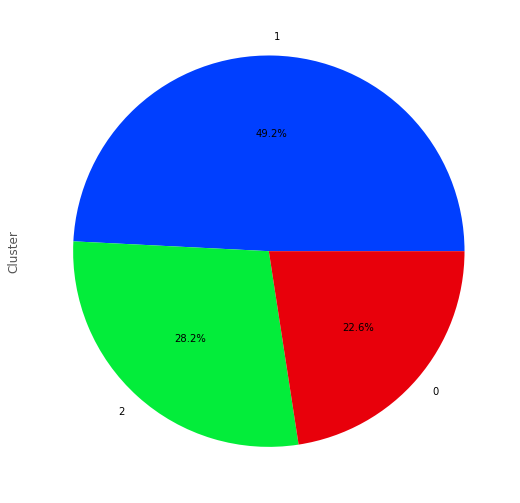

In [50]:
user_profile["Cluster"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%')

# Cluster analysis - Cluster 0

In [51]:
cluster_0 = user_profile[(user_profile["Cluster"]==0)]

In [52]:
cluster_0.describe()

ONNET_OUTGOING_Scaled  ONNET_INCOMING_Scaled  OFFNET_OUTGOING_Scaled  \
count             677.000000             672.000000              671.000000   
mean                0.148841               0.154458                0.142442   
std                 0.123431               0.122738                0.143780   
min                 0.001202               0.001202                0.001202   
25%                 0.047513               0.055160                0.040031   
50%                 0.126177               0.132469                0.100962   
75%                 0.221080               0.229739                0.187770   
max                 1.000000               0.961538                1.000000   

       OFFNET_INCOMING_Scaled  IDD_INCOMING_Scaled  IDD_OUTGOING_Scaled  \
count              674.000000           671.000000           310.000000   
mean                 0.148787             0.149686             0.108995   
std                  0.114013             0.194129             0.148035   
min                  0.001202             0.002500             0.004808   
25%                  0.065544             0.021667             0.016026   
50%                  0.130323             0.064333             0.051282   
75%                  0.197598             0.190833             0.142228   
max                  0.948718             0.882000             0.818910   

       IDD_outgoing_Cumulative_Revenue  PEO_TV_Scaled   BB_Scaled  \
count                     3.100000e+02     128.000000  207.000000   
mean                      8.465171e+05       0.369678    0.416356   
std                       1.912989e+06       0.355235    0.283364   
min                       3.500000e+02       0.000000    0.006944   
25%                       4.411950e+04       0.000000    0.164931   
50%                       1.937335e+05       0.321875    0.348958   
75%                       6.329025e+05       0.681250    0.625000   
max                       1.342376e+07       0.950000    1.000000   

        BIRTH_YEAR         AGE  BB_Extra_GB_Purchased_Times  \
count   485.000000  485.000000                   132.000000   
mean   1959.195876   61.804124                    12.007576   
std      15.565669   15.565669                    15.410166   
min    1911.000000   26.000000                     1.000000   
25%    1947.000000   50.000000                     2.000000   
50%    1958.000000   63.000000                     4.000000   
75%    1971.000000   74.000000                    16.250000   
max    1995.000000  110.000000                    58.000000   

       BB_Extra_GB_Purchased_Scaled  Having_Senior_Citizen_Scaled  \
count                    132.000000                    677.000000   
mean                       0.191452                      0.252585   
std                        0.264517                      0.229380   
min                        0.010000                      0.000000   
25%                        0.017241                      0.000000   
50%                        0.051724                      0.300000   
75%                        0.262931                      0.400000   
max                        0.982759                      1.000000   

       Having_Kids_at_Home_Scaled  Having_Teenagers_Students_Scaled  \
count                  677.000000                        677.000000   
mean                     0.193131                          0.111226   
std                      0.161083                          0.190975   
min                      0.000000                          0.000000   
25%                      0.100000                          0.000000   
50%                      0.200000                          0.000000   
75%                      0.200000                          0.100000   
max                      1.100000                          1.000000   

       Having_Working_Professionals_Scaled  \
count                           677.000000   
mean                              0.164476   
std                          

#### Exceptional (Outlier Usage)

<AxesSubplot:>

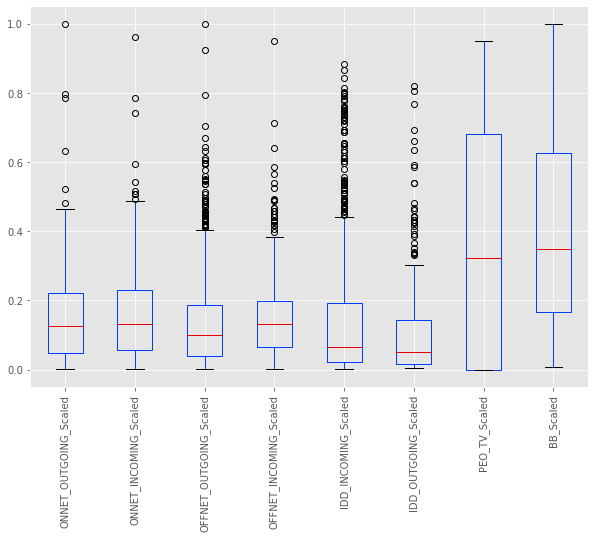

In [53]:
cluster_0.iloc[:,[4,7,10,13,16,20,26,28,62]].boxplot(figsize=(10,7),rot=90)

### Exceptional Users (Outliers) analysis

In [54]:
out_cols = ["ONNET_OUTGOING_Outlier","ONNET_INCOMING_Outlier","OFFNET_OUTGOING_Outlier","OFFNET_INCOMING_Outlier","IDD_INCOMING_Outlier","IDD_OUTGOING_Outlier"]
scaled_cols=["ONNET_OUTGOING_Scaled","ONNET_INCOMING_Scaled","OFFNET_OUTGOING_Scaled","OFFNET_INCOMING_Scaled","IDD_INCOMING_Scaled","IDD_OUTGOING_Scaled"]

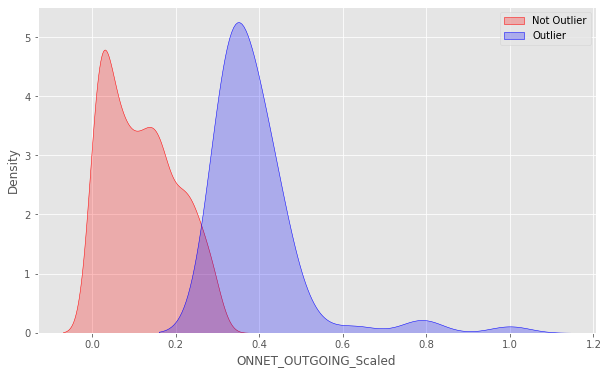

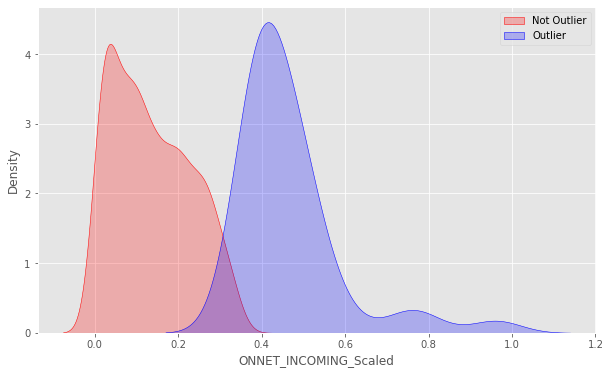

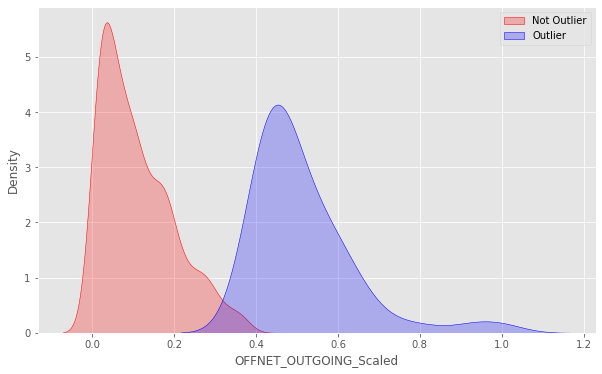

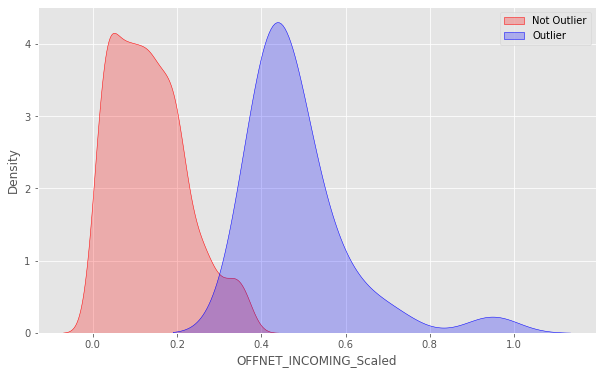

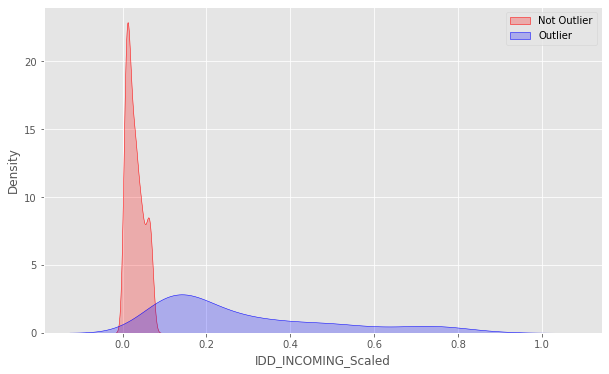

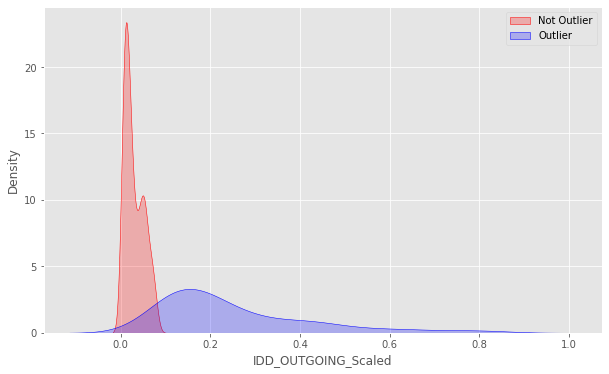

In [55]:
for i in range (0,6):
    plt.figure(figsize=(10,6))
    ax = sns.kdeplot(cluster_0[scaled_cols[i]][(cluster_0[out_cols[i]] == 'NO') ], color="Red", shade = True)
    ax = sns.kdeplot(cluster_0[scaled_cols[i]][(cluster_0[out_cols[i]] == 'YES') ], ax =ax, color="Blue", shade= True)
    ax.legend(["Not Outlier","Outlier"],loc='upper right')
    ax.set_ylabel('Density')

In [56]:
# Voice Outliers
cluster_0_out = cluster_0[(cluster_0["ONNET_OUTGOING_Outlier"]=="YES") | (cluster_0["ONNET_INCOMING_Outlier"]=="YES") | (cluster_0["OFFNET_OUTGOING_Outlier"]=="YES") | (cluster_0["OFFNET_INCOMING_Outlier"]=="YES") | (cluster_0["IDD_OUTGOING_Outlier"]=="YES") | (cluster_0["IDD_INCOMING_Outlier"]=="YES")]

#### Exceptional users -  correlation with other features

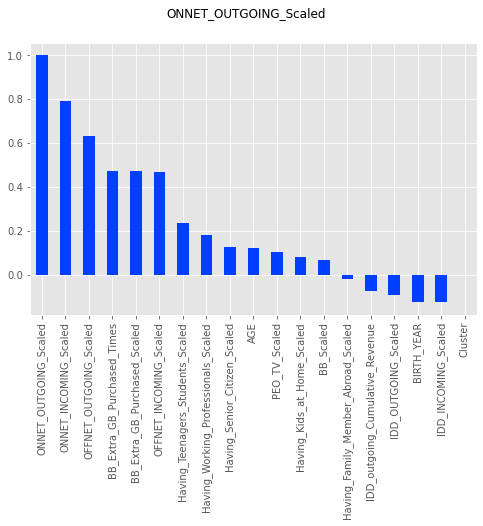

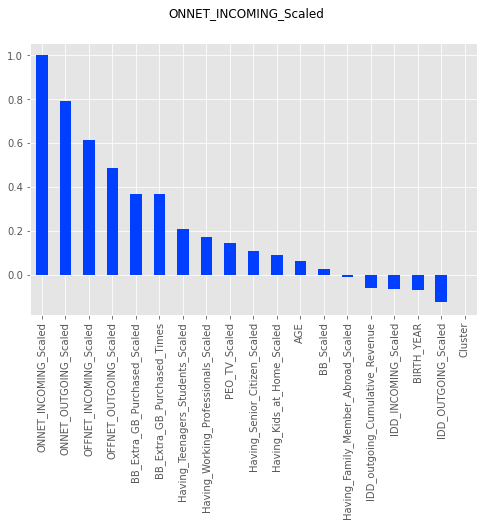

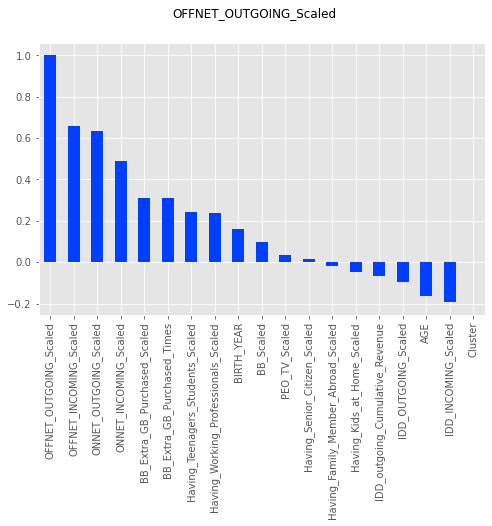

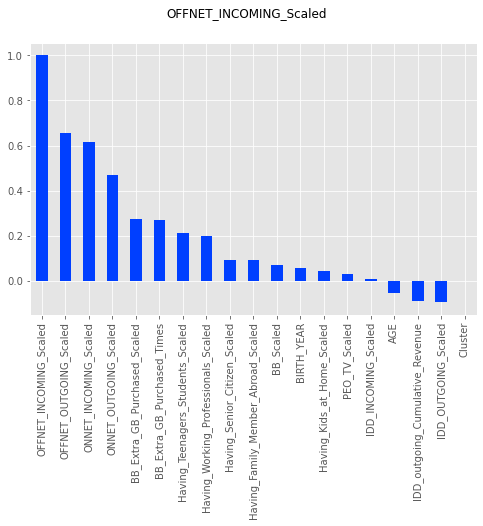

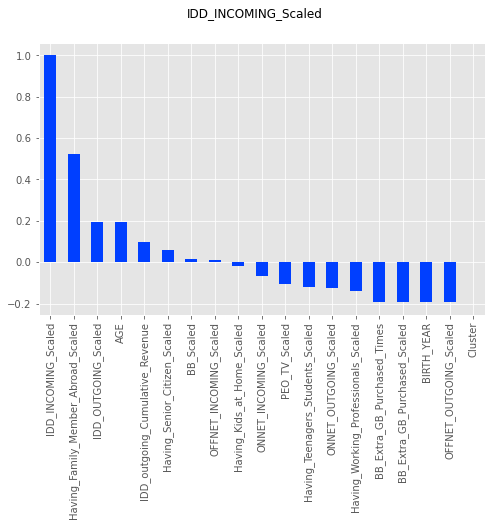

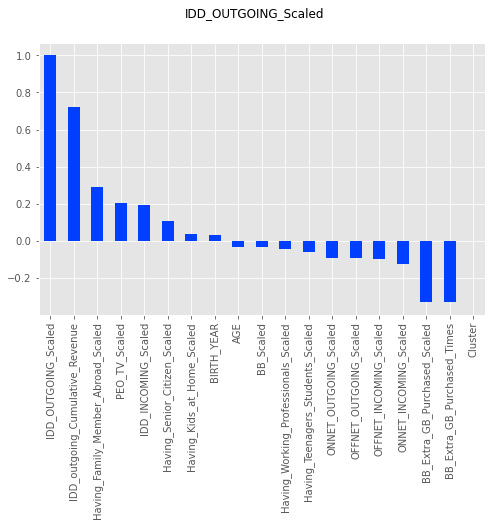

In [57]:
for col in scaled_cols:
    plt.figure(figsize=(8,5))
    plt.suptitle(col)
    cluster_0_out.corr()[col].sort_values(ascending = False).plot(kind='bar')

#### Subscriptions of Exceptional users

In [58]:
cluster_0_out_sub_df = pd.DataFrame([dict(cluster_0["Sub_Type"].value_counts()),dict(cluster_0_out["Sub_Type"].value_counts())])

In [59]:
cluster_0_out_sub_df

TRIPLE_PLAY  DOUBLE_PLAY_BV  SINGLE_PLAY  DOUBLE_PLAY_PV
0          540              75           46              16
1          309              52           23              10

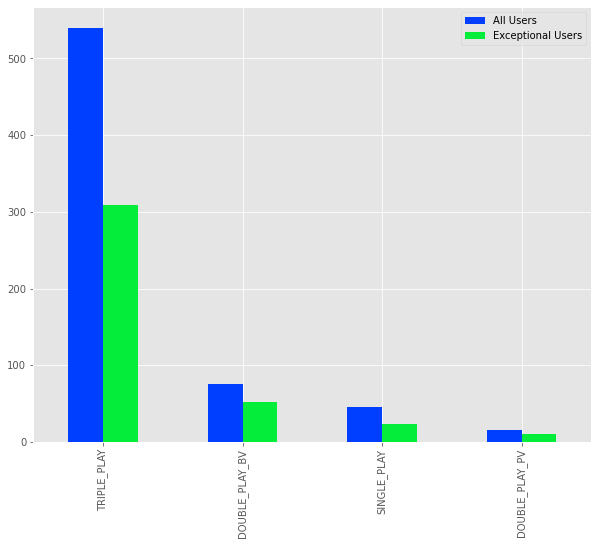

In [60]:
fig, ax = plt.subplots()
cluster_0_out_sub_df.T.plot(kind="bar", figsize=(10,8), ax=ax)
ax.legend(["All Users", "Exceptional Users"])

#### Exceptional Users by Location

<AxesSubplot:xlabel='Location_Identifier'>

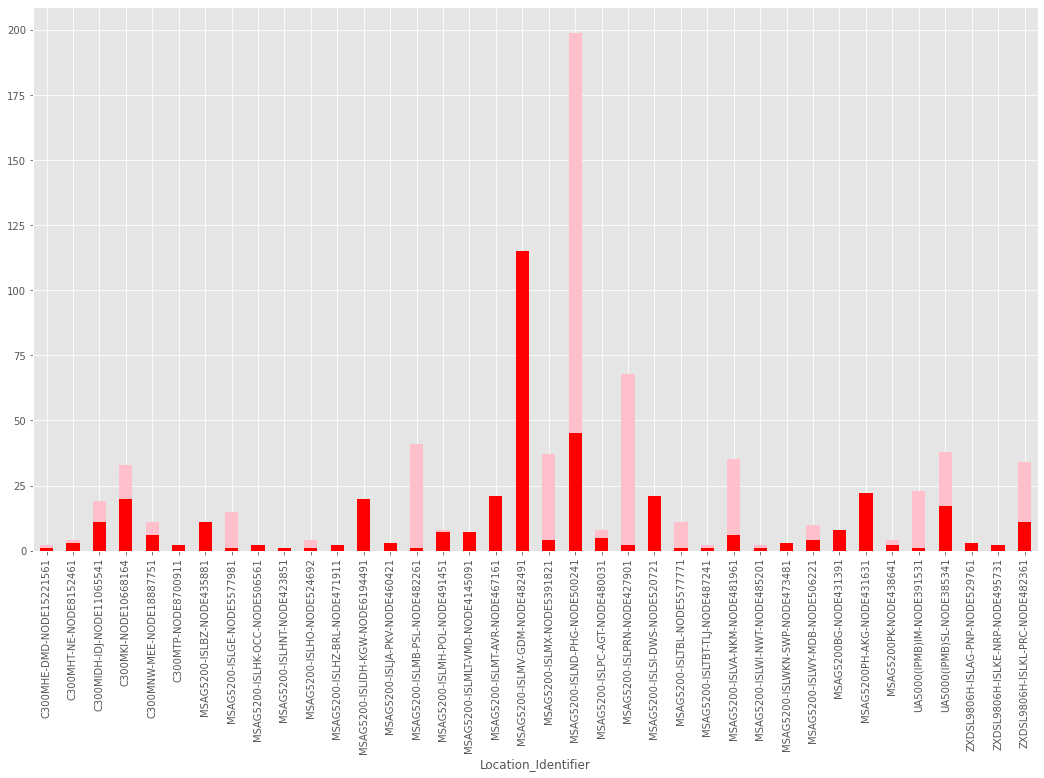

In [61]:
cluster_0_loc = cluster_0.groupby('Location_Identifier').count()["event_source.hash"]
cluster_0_out_loc = cluster_0_out.groupby('Location_Identifier').count()["event_source.hash"]
ax = cluster_0_loc.plot(stacked=True, kind="bar", figsize=(18,10), color="pink")
cluster_0_out_loc.plot(stacked=True, kind="bar",ax=ax, figsize=(18,10), color="red")

#### Skewness and Distribution

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
      dtype=object)

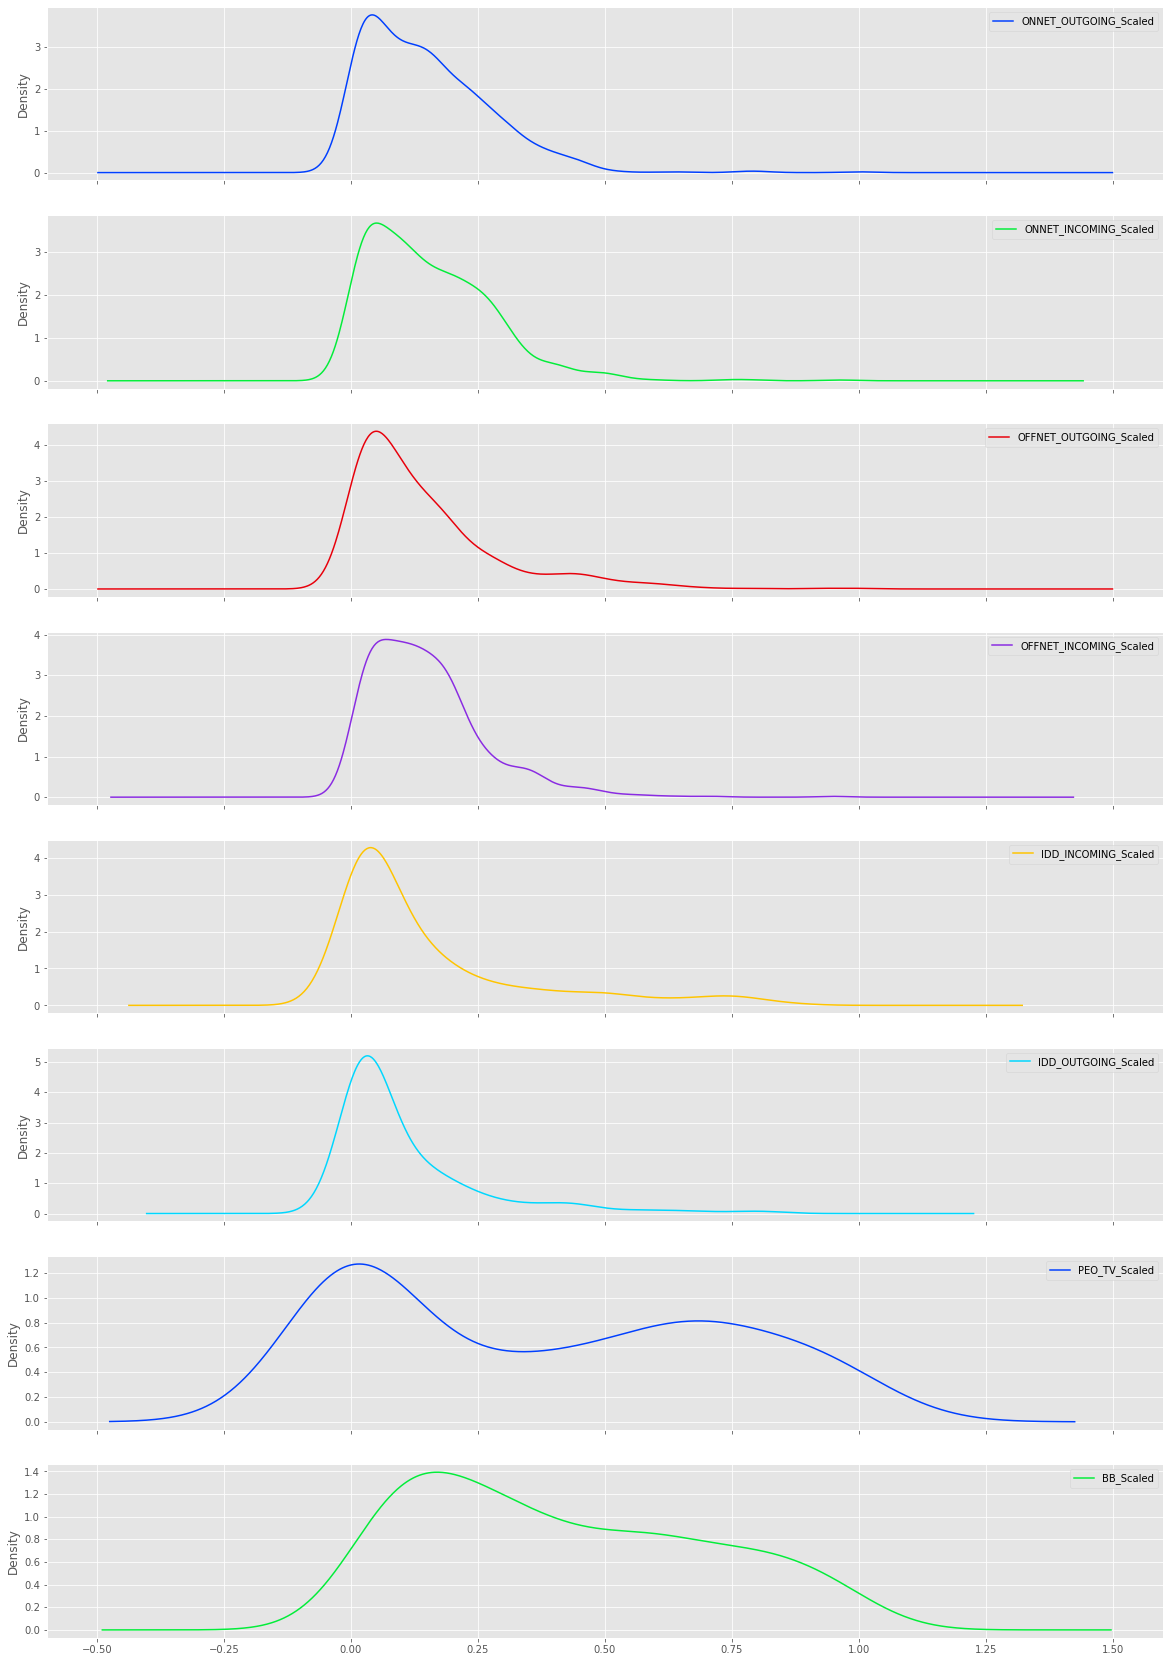

In [62]:
cluster_0.iloc[:,[4,7,10,13,16,20,26,28,62]].plot.kde(figsize=(20,30),subplots=True)

array([[<AxesSubplot:title={'center':'ONNET_OUTGOING_Scaled'}>,
        <AxesSubplot:title={'center':'ONNET_INCOMING_Scaled'}>,
        <AxesSubplot:title={'center':'OFFNET_OUTGOING_Scaled'}>,
        <AxesSubplot:title={'center':'OFFNET_INCOMING_Scaled'}>],
       [<AxesSubplot:title={'center':'IDD_INCOMING_Scaled'}>,
        <AxesSubplot:title={'center':'IDD_OUTGOING_Scaled'}>,
        <AxesSubplot:title={'center':'IDD_outgoing_Cumulative_Revenue'}>,
        <AxesSubplot:title={'center':'PEO_TV_Scaled'}>],
       [<AxesSubplot:title={'center':'BB_Scaled'}>,
        <AxesSubplot:title={'center':'BIRTH_YEAR'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'BB_Extra_GB_Purchased_Times'}>],
       [<AxesSubplot:title={'center':'BB_Extra_GB_Purchased_Scaled'}>,
        <AxesSubplot:title={'center':'Having_Senior_Citizen_Scaled'}>,
        <AxesSubplot:title={'center':'Having_Kids_at_Home_Scaled'}>,
        <AxesSubplot:title={'center':'Having_Teenager

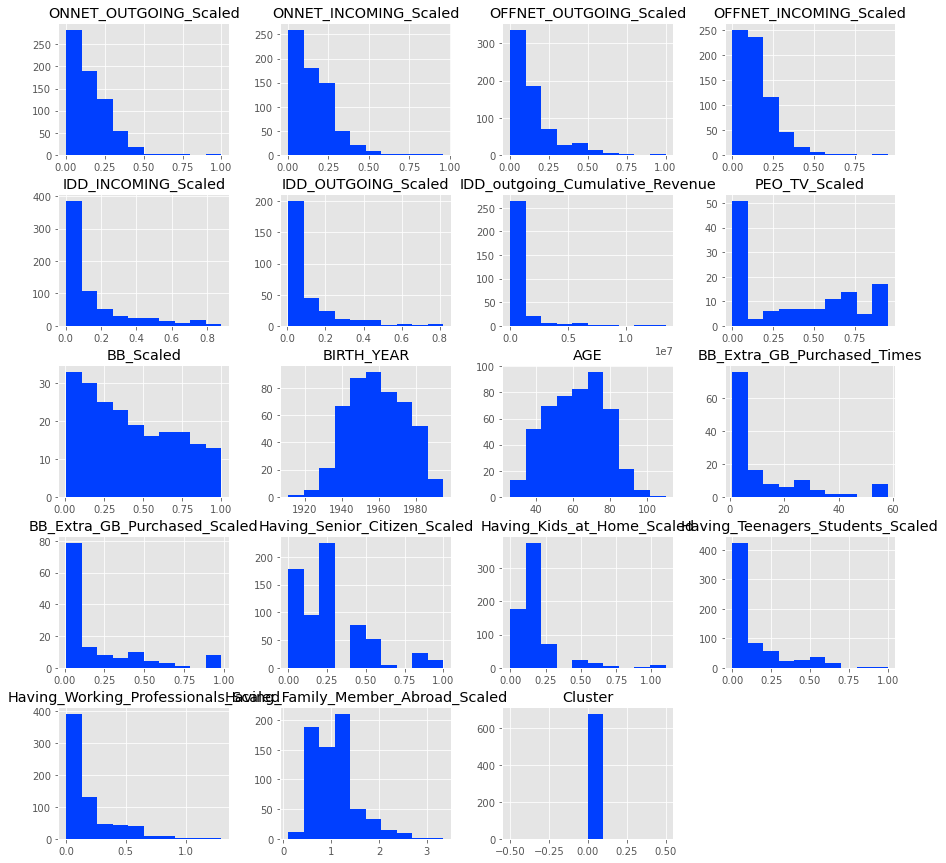

In [63]:
cluster_0.hist(figsize=(15,15))

### Subscription Type and Usage

In [64]:
cluster_0["Sub_Type"].value_counts()

TRIPLE_PLAY       540
DOUBLE_PLAY_BV     75
SINGLE_PLAY        46
DOUBLE_PLAY_PV     16
Name: Sub_Type, dtype: int64

<AxesSubplot:ylabel='Sub_Type'>

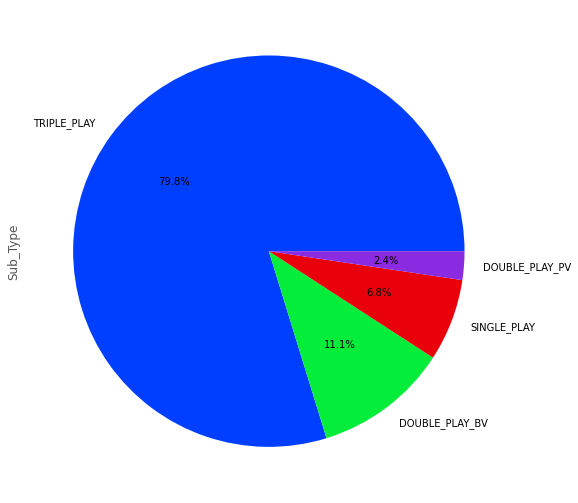

In [65]:
cluster_0["Sub_Type"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%')

In [67]:
len(cluster_0[(cluster_0["Sub_Usage"] != "['VOICE_NO_INFO', 'BB_NO_INFO', 'TV_NO_INFO']")]["Sub_Usage"])

677

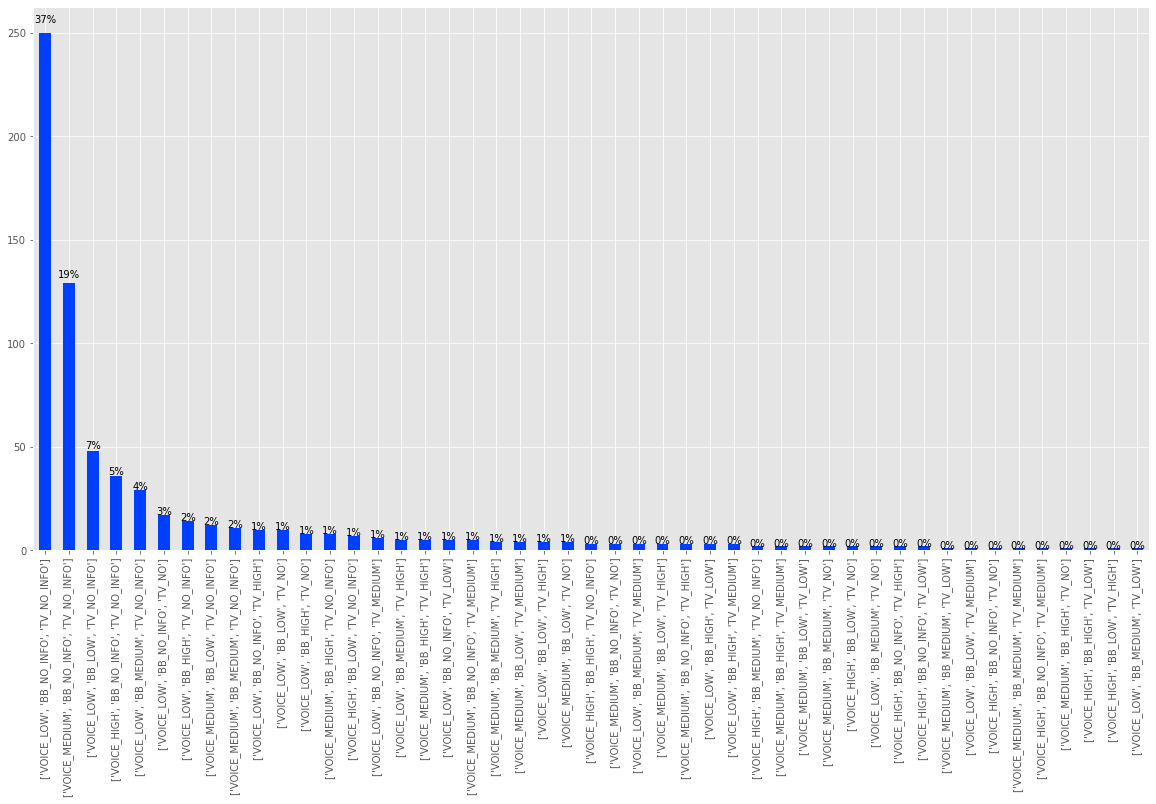

In [68]:
ax =cluster_0[(cluster_0["Sub_Usage"] != "['VOICE_NO_INFO', 'BB_NO_INFO', 'TV_NO_INFO']")]["Sub_Usage"].value_counts().plot(kind='bar', figsize=(20,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

### Voice Calls Usage

In [69]:
cluster_0["VOICE_Categorical"].value_counts()

LOW       419
MEDIUM    200
HIGH       58
Name: VOICE_Categorical, dtype: int64

<AxesSubplot:ylabel='VOICE_Categorical'>

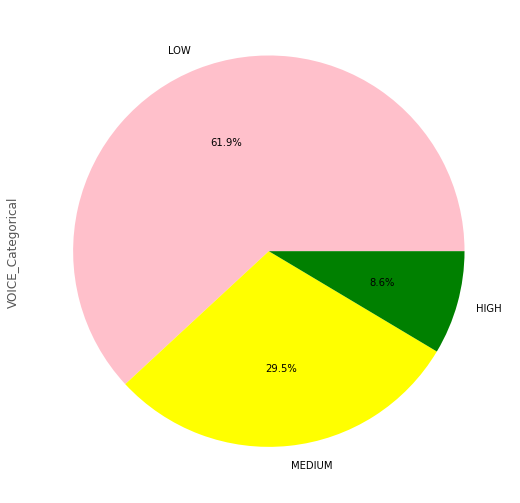

In [70]:
cluster_0["VOICE_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['pink', 'yellow','green'] )

### VOICE VAS Packages

In [71]:
count_dict = dict(cluster_0["Voice_VAS_Package"].value_counts())
all_products = []
for x,y in count_dict.items():
    if x != "NO_INFO":
        for item in literal_eval(x):
            for i in range(y):
                all_products.append(item)
all_voice_products_dict = Counter(all_products)

In [72]:
all_voice_products_dict.pop('V_SLT Voice Service')

642

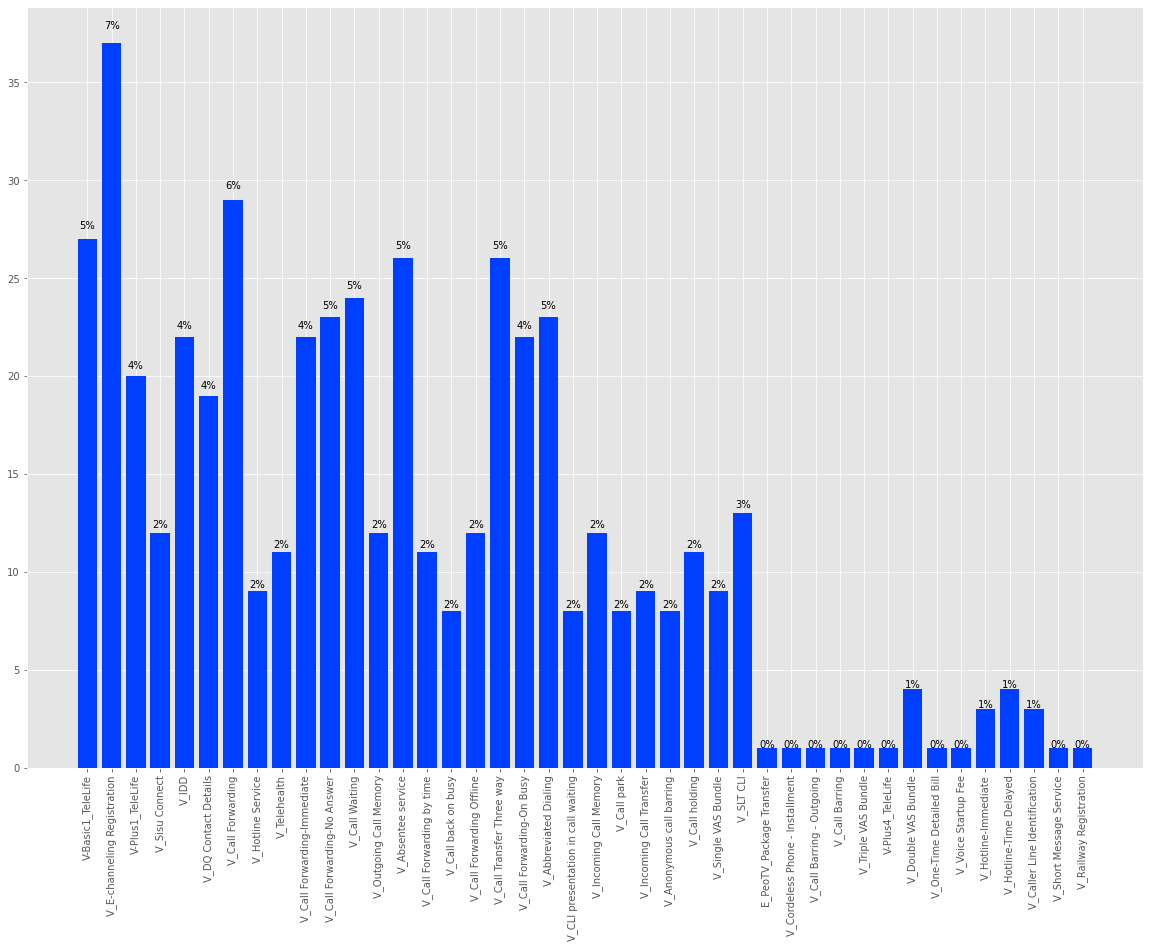

In [73]:
avp_without_no = all_voice_products_dict
#avp_without_no.pop("NO")
fig,ax = plt.subplots(figsize=(20,14))
ax.bar(*zip(*avp_without_no.items()))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.xticks(rotation=90)
plt.show()

### IDD Usage

In [74]:
cluster_0["IDD_Overall_Categorical"].value_counts()

LOW       643
MEDIUM     24
HIGH       10
Name: IDD_Overall_Categorical, dtype: int64

<AxesSubplot:ylabel='IDD_Overall_Categorical'>

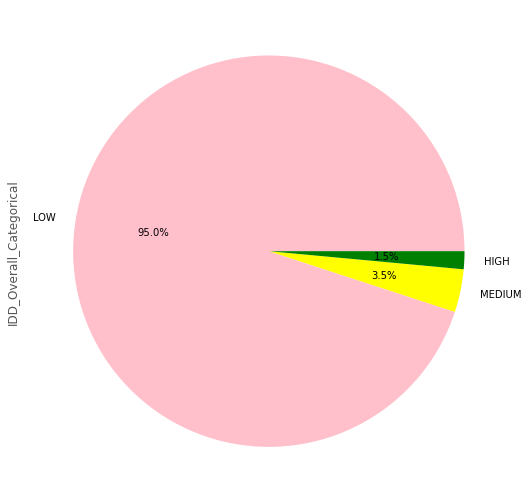

In [75]:
cluster_0["IDD_Overall_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['pink','yellow','green'] )

#### IDD Calling country analysis

In [194]:
def eval_country(idd_country):
    if not isinstance(idd_country, float):
        if idd_country != "NO_INFO":
            return literal_eval(idd_country)
    else:
        return []

In [195]:
cluster_0_idd_country_df = cluster_0[["event_source.hash","IDD_incoming_country"]]

In [196]:
cluster_0_idd_country_df["IDD_incoming_country"] = cluster_0_idd_country_df["IDD_incoming_country"].apply(lambda x: eval_country(x))

<ipython-input-196-27ef6e54b7d6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [197]:
cluster_0_idd_country_df = cluster_0_idd_country_df.explode("IDD_incoming_country")

<AxesSubplot:>

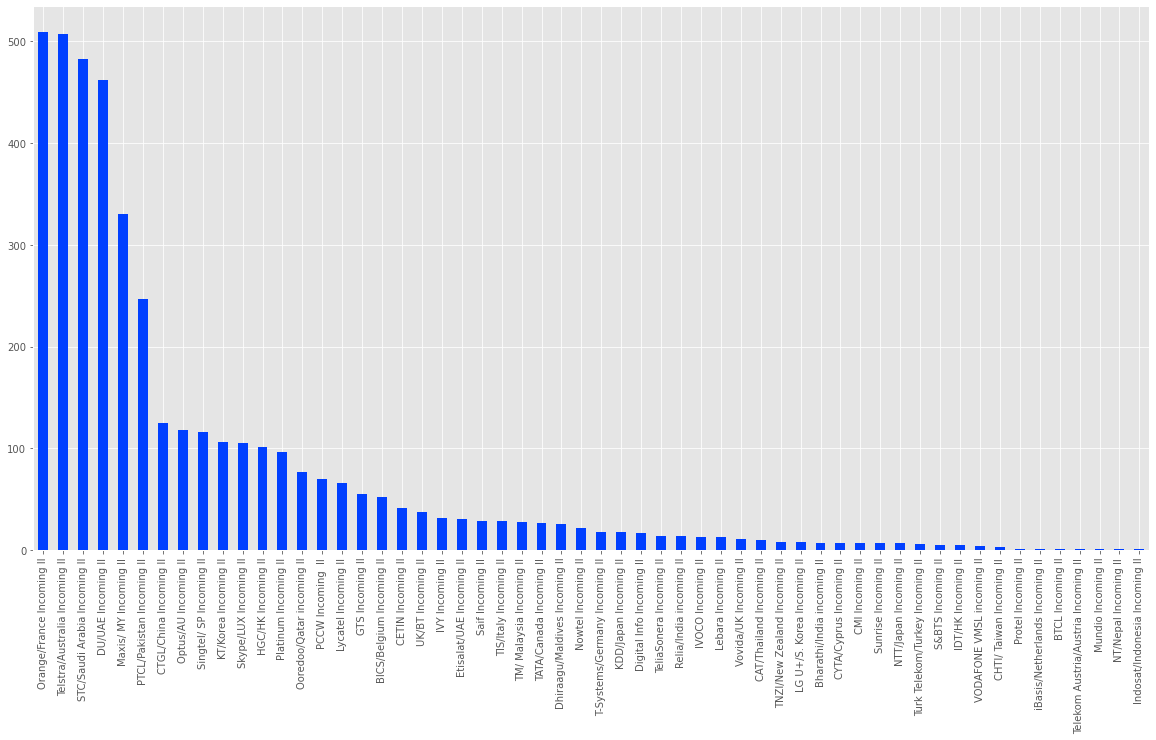

In [199]:
cluster_0_idd_country_df["IDD_incoming_country"].value_counts().plot(kind="bar", figsize=(20,10))

#### IDD Outgoing Countries

In [201]:
cluster_0_idd_out_country_df = cluster_0[["event_source.hash","IDD_outgoing_country"]]

In [202]:
cluster_0_idd_out_country_df["IDD_outgoing_country"] = cluster_0_idd_out_country_df["IDD_outgoing_country"].apply(lambda x: eval_country(x))

<ipython-input-202-2f7f361cb0ce>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [205]:
cluster_0_idd_out_country_df = cluster_0_idd_out_country_df.explode("IDD_outgoing_country")

In [215]:
def drop_mobile(idd_country):
    if idd_country is not None:
        if idd_country != "NO_INFO":
            return idd_country.replace(" - Mobile", "")
    else:
        return idd_country

In [216]:
cluster_0_idd_out_country_df["IDD_outgoing_country"] = cluster_0_idd_out_country_df["IDD_outgoing_country"].apply(lambda x: drop_mobile(x))

<AxesSubplot:>

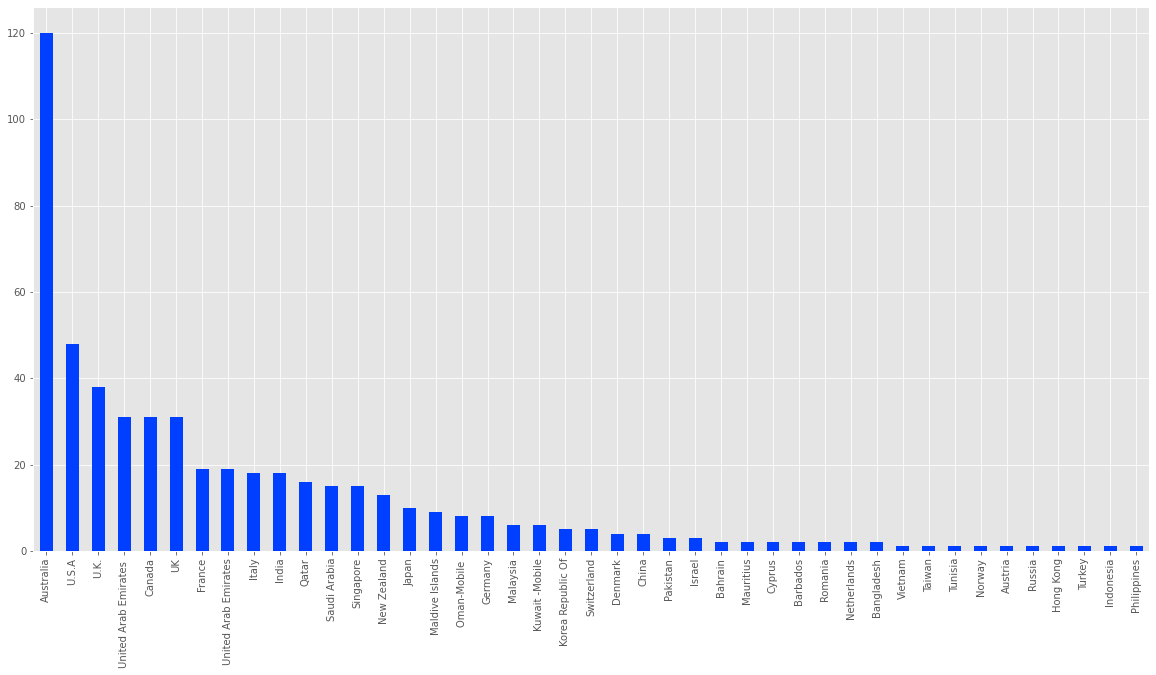

In [217]:
cluster_0_idd_out_country_df["IDD_outgoing_country"].value_counts().plot(kind="bar", figsize=(20,10))

#### IDD Rental anlysis

In [219]:
cluster_0["IDD_outgoing_Cumulative_Revenue"].value_counts()

16500.0       2
5700.0        2
5100.0        2
10200.0       2
10943335.0    1
             ..
85800.0       1
1395925.0     1
67333.0       1
39167.0       1
2100.0        1
Name: IDD_outgoing_Cumulative_Revenue, Length: 306, dtype: int64

## ToDo
- Voice VAS Monthly rental/ One time charge/ subscribed timeframes analysis

### PeoTV Usage

In [76]:
cluster_0["PEO_TV_Categorical"].value_counts()

NO_INFO    549
NO          50
HIGH        37
MEDIUM      26
LOW         15
Name: PEO_TV_Categorical, dtype: int64

#### PeoTV Usage among Triple Play users in Cluster 0

<AxesSubplot:ylabel='PEO_TV_Categorical'>

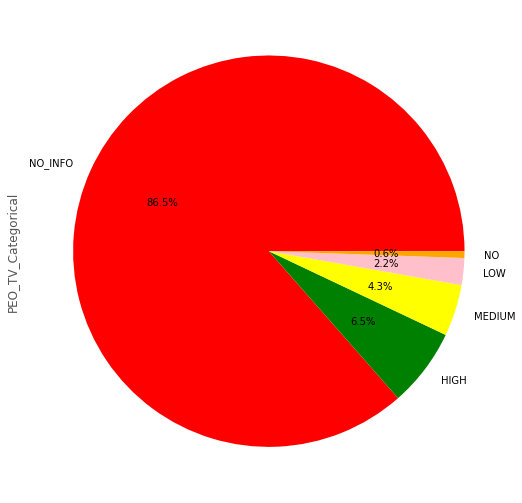

In [77]:
cluster_0_peo = cluster_0[(cluster_0["Sub_Type"] == "TRIPLE_PLAY")]
cluster_0_peo["PEO_TV_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['red','green','yellow','pink','orange'])

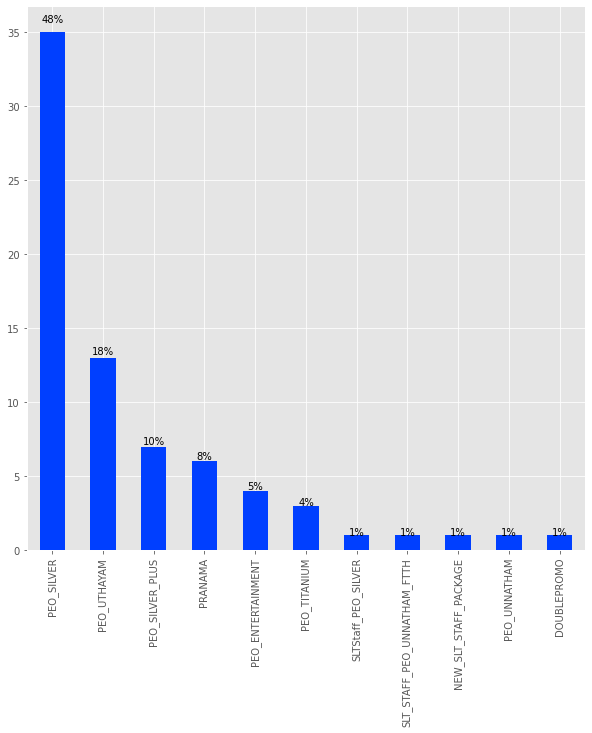

In [78]:
ax =cluster_0_peo[(cluster_0_peo["Peo_TV_Package"] != "NO_INFO")]["Peo_TV_Package"].value_counts().plot(kind='bar', figsize=(10,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### PeoTV Usage among Double Play PV users in Cluster 0

<AxesSubplot:ylabel='PEO_TV_Categorical'>

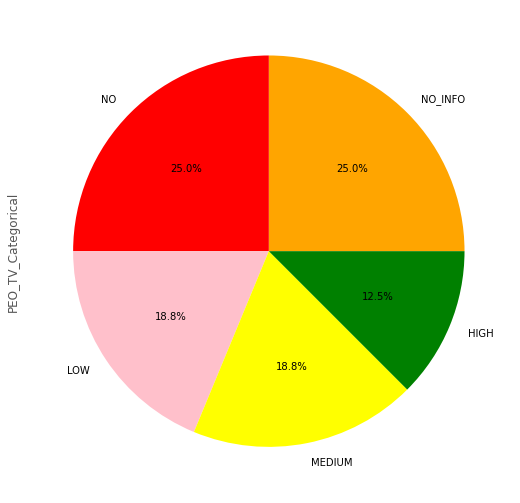

In [79]:
cluster_0_peo_pv = cluster_0[(cluster_0["Sub_Type"] == "DOUBLE_PLAY_PV")]
cluster_0_peo_pv["PEO_TV_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['orange','red','pink','yellow','green'])

In [80]:
cluster_0_peo_pv["PEO_TV_Categorical"].value_counts()

NO_INFO    4
NO         4
LOW        3
MEDIUM     3
HIGH       2
Name: PEO_TV_Categorical, dtype: int64

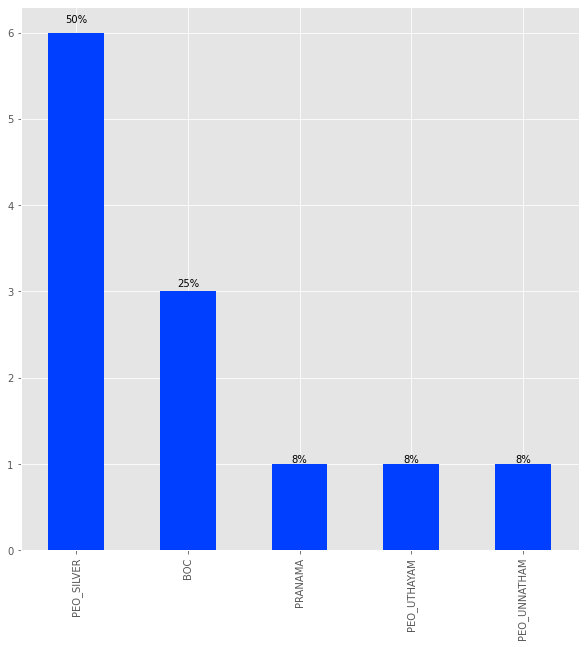

In [81]:
ax =cluster_0_peo_pv[(cluster_0_peo_pv["Peo_TV_Package"] != "NO_INFO")]["Peo_TV_Package"].value_counts().plot(kind='bar', figsize=(10,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

### PEO TV VAS Packages

In [82]:
count_dict = dict(cluster_0["Peo_VAS_Package"].value_counts())
all_products = []
for x,y in count_dict.items():
    if x != "NO_INFO":
        for item in literal_eval(x):
            for i in range(y):
                all_products.append(item)
all_peo_products_dict = Counter(all_products)

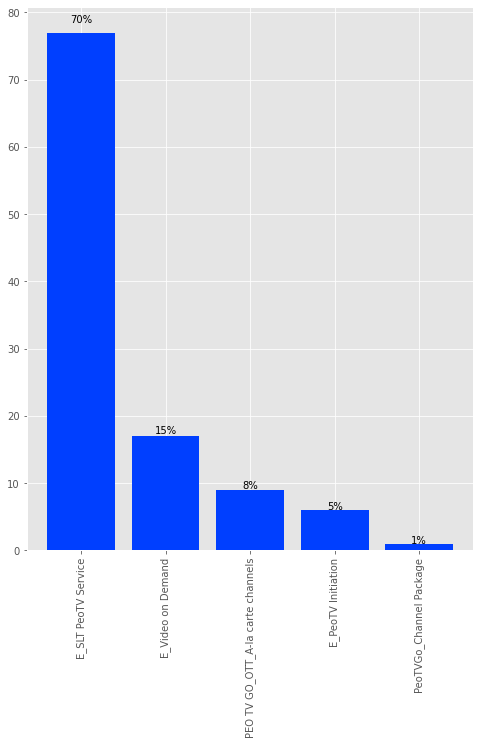

In [83]:
avp_without_no = all_peo_products_dict
#avp_without_no.pop("NO")
fig,ax = plt.subplots(figsize=(8,10))
ax.bar(*zip(*avp_without_no.items()))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.xticks(rotation=90)
plt.show()

## ToDo
- Peo VAS Monthly rental/ One time charge/ subscribed timeframes analysis

### BroadBand Internet Usage

In [84]:
cluster_0["BB_Categorical"].value_counts()

NO_INFO    470
LOW         98
MEDIUM      61
HIGH        48
Name: BB_Categorical, dtype: int64

#### BB Usage for triple Play users in Cluster 0

<AxesSubplot:ylabel='BB_Categorical'>

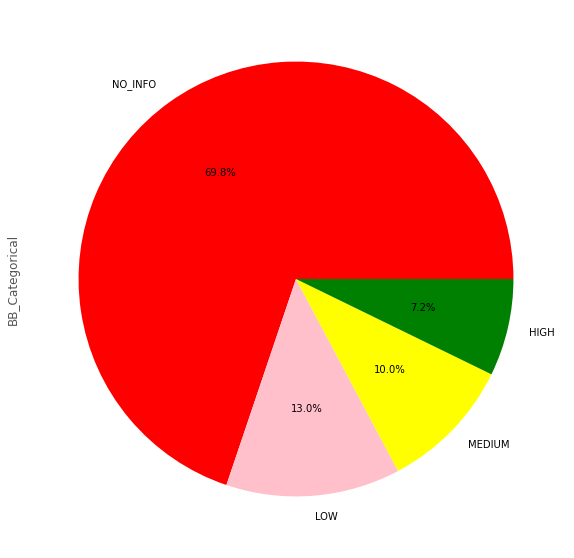

In [85]:
cluster_0_bb = cluster_0[(cluster_0["Sub_Type"] == "TRIPLE_PLAY")]
cluster_0_bb["BB_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%',colors = ['red','pink','yellow','green'])

#### BB Usage for Double Play BV Customers in Cluster 0

<AxesSubplot:ylabel='BB_Categorical'>

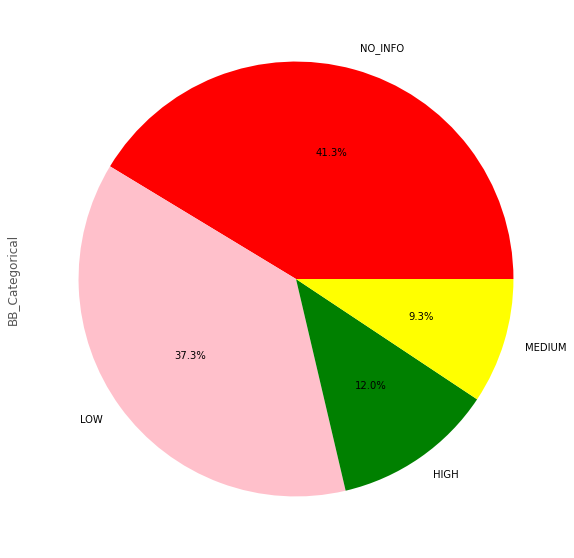

In [86]:
cluster_0_bb_dp = cluster_0[(cluster_0["Sub_Type"] == "DOUBLE_PLAY_BV")]
cluster_0_bb_dp["BB_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%',colors = ['red','pink','green','yellow'])

### BB VAS Package

In [87]:
count_dict = dict(cluster_0["BB_VAS_Package"].value_counts())
all_products = []
for x,y in count_dict.items():
    if x != "NO_INFO":
        for item in literal_eval(x):
            for i in range(y):
                all_products.append(item)
all_bb_products_dict = Counter(all_products)

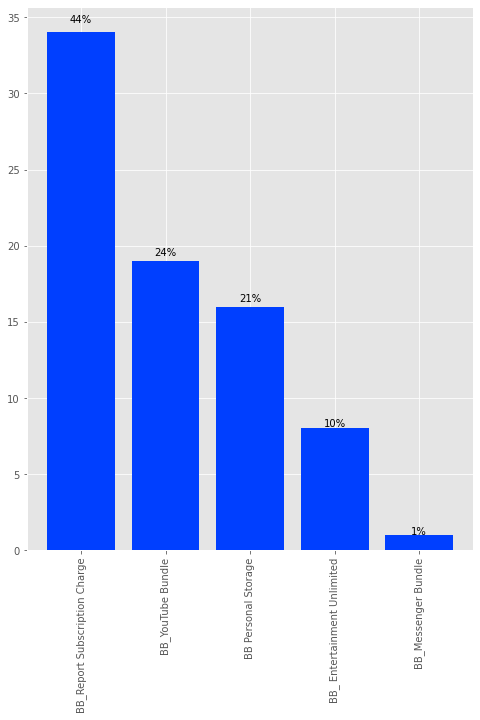

In [88]:
avp_without_no = all_bb_products_dict
#avp_without_no.pop("NO")
fig,ax = plt.subplots(figsize=(8,10))
ax.bar(*zip(*avp_without_no.items()))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.xticks(rotation=90)
plt.show()

## ToDo
- BB VAS Monthly rental/ One time charge/ subscribed timeframes analysis

### Extra Gb Usage Analysis

#### Most Extra GB Purchased users - by frequency

In [89]:
extra_gb_freq_users = cluster_0[(cluster_0["BB_Extra_GB_Purchased_Times"]>10.0)]

In [90]:
extra_gb_mostly_used_users = extra_gb_freq_users["event_source.hash"]

<AxesSubplot:ylabel='BB_Extra_GB_Purchase_Categorical'>

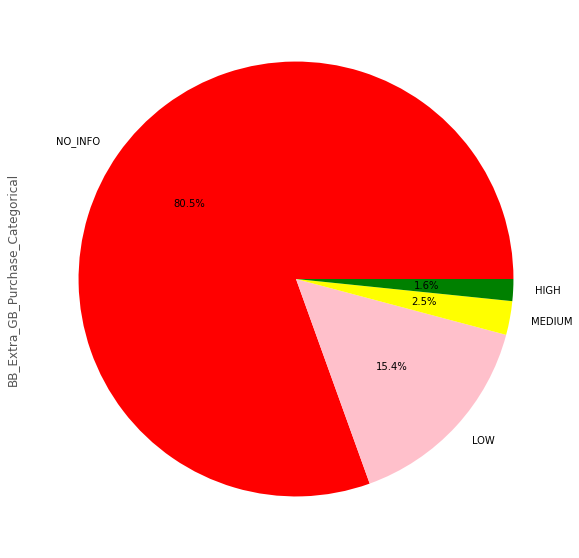

In [91]:
cluster_0["BB_Extra_GB_Purchase_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%',colors = ['red','pink','yellow','green'])

[Text(0, 0, '314e8d4cf1a5de291a540d70eefffaae'),
 Text(1, 0, 'b36a0857b23d1369fadd24c5893aa129'),
 Text(2, 0, '7b9367da168ff3bce8c3ab07bcc69081'),
 Text(3, 0, '009f305bf85a71012c0e343233e611ba'),
 Text(4, 0, '7eec59f66976cb418a8b84fbb3274e50'),
 Text(5, 0, '06b93cc32b6bfdbc24ab9c6df1da3d0b'),
 Text(6, 0, '94206a953b1c19cfbed97ab4ca5861cc'),
 Text(7, 0, 'e72fdc3f9d890d5551dd5081d53dcf8b'),
 Text(8, 0, 'd1a76a57b9ef13fb00bbd468017c0b96'),
 Text(9, 0, '22f91f68d787f423eb5d7f9eb7ee76f0'),
 Text(10, 0, '64906ac25467e1f6745fb3bd3fab4b8a'),
 Text(11, 0, '71206ecab5abd1b62ba61616197f8129'),
 Text(12, 0, 'c60c4245240a6e2dc8bd5dcd0d4cb0f0'),
 Text(13, 0, '53861460b35268b87b7161aec487dfc6'),
 Text(14, 0, '552d18e8515f81cf52f85d1cb995de16'),
 Text(15, 0, '995ae34cf08d08eaca3d7d0249578546'),
 Text(16, 0, '167671a939e03e258ca9cd94a3349a25'),
 Text(17, 0, '88cd726fd19de40b97238fd2f25e21b8'),
 Text(18, 0, 'fe20b17a9573e4b7e765cc3098728f3d'),
 Text(19, 0, 'ee4fe76990876ffba649fb71b683e91c'),
 Text(20, 

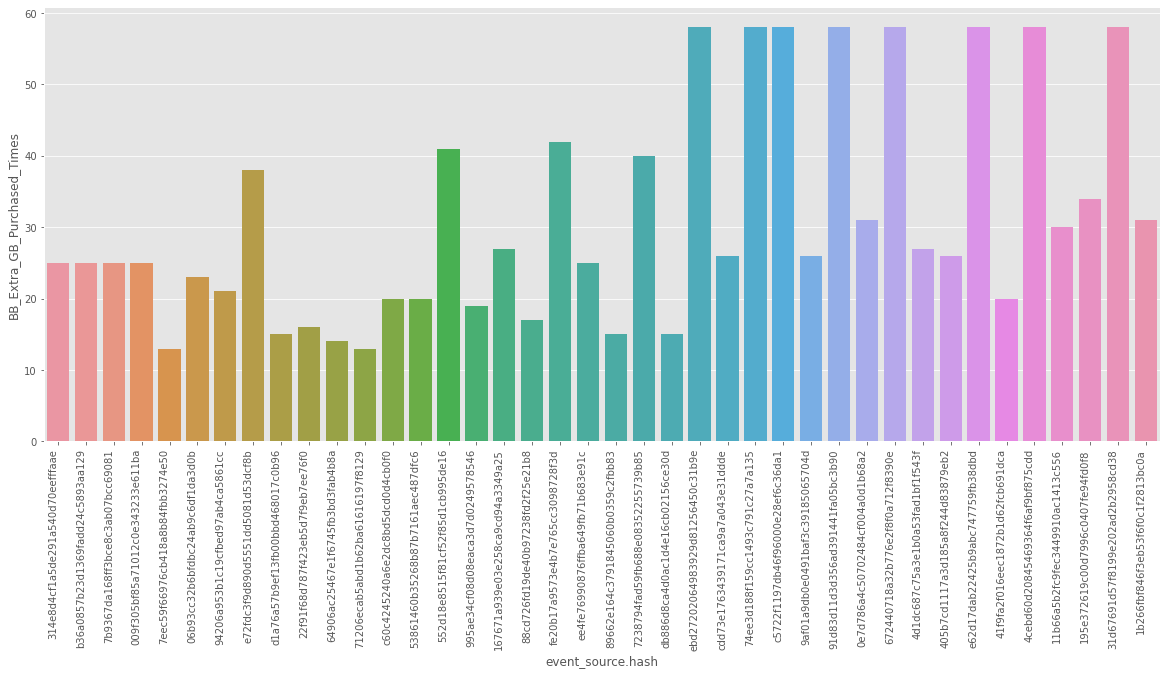

In [92]:
plt.figure(figsize=(20,8))
extra_gb_bar_plot = sns.barplot(data=extra_gb_freq_users,x='event_source.hash', y='BB_Extra_GB_Purchased_Times')

extra_gb_bar_plot.set_xticklabels(extra_gb_bar_plot.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')

#### Most Extra GB Useed users - By spent amount with Time

<ipython-input-93-fb2918c10f64>:7: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



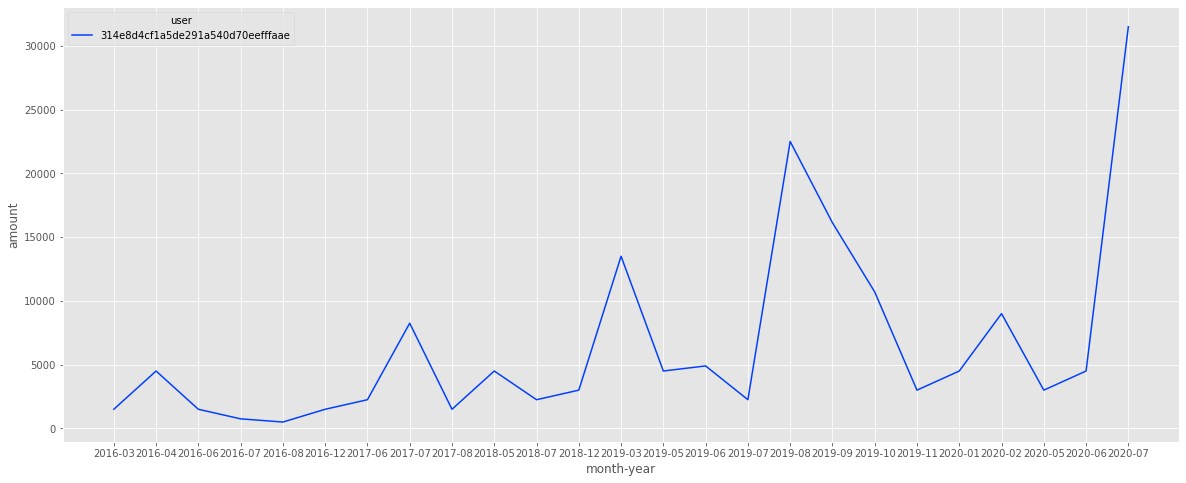

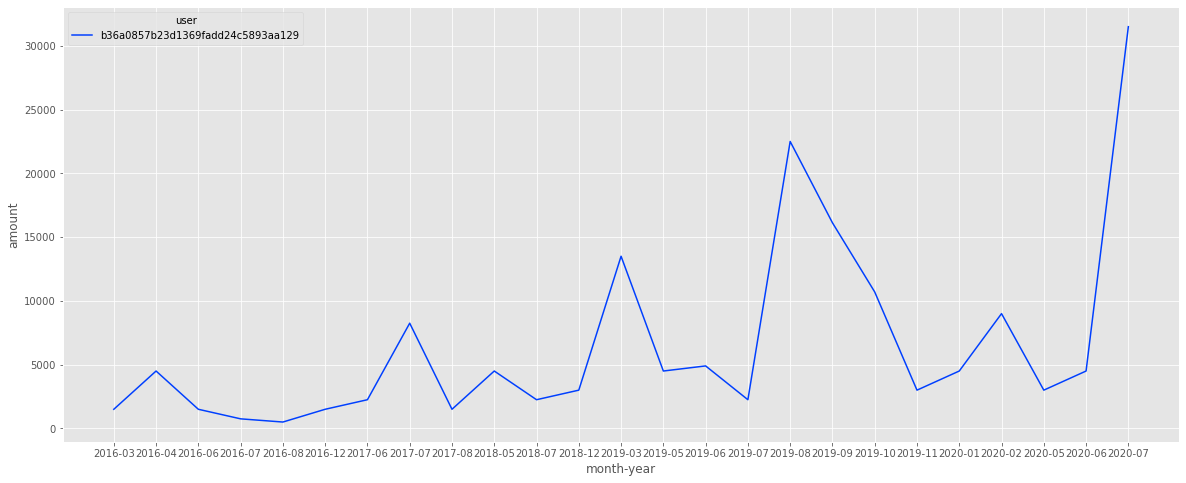

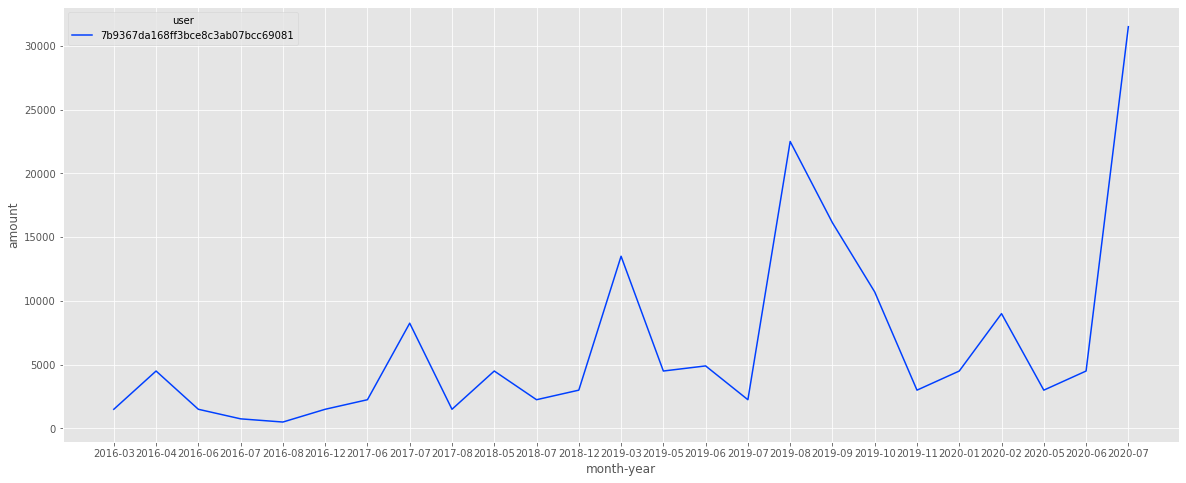

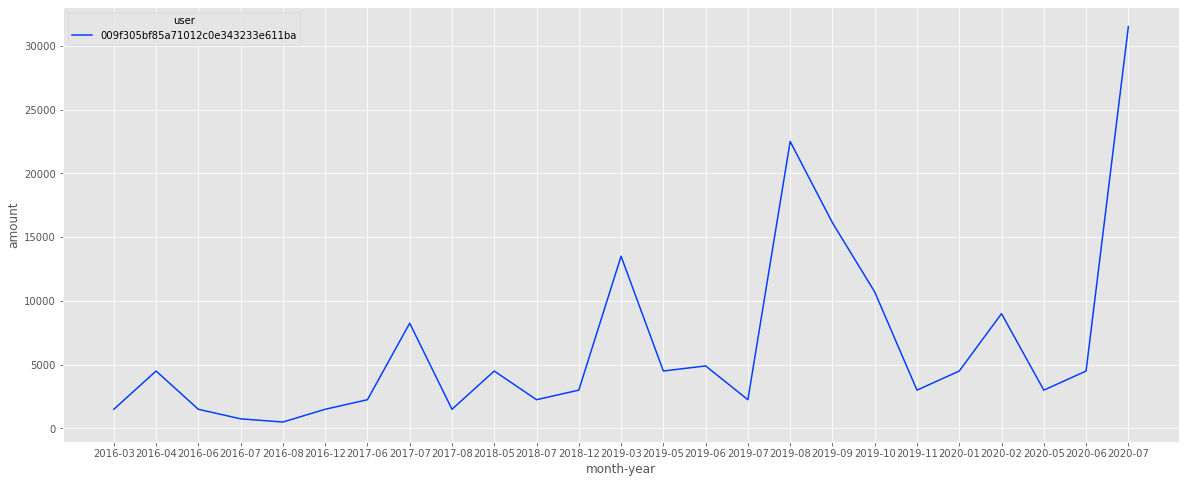

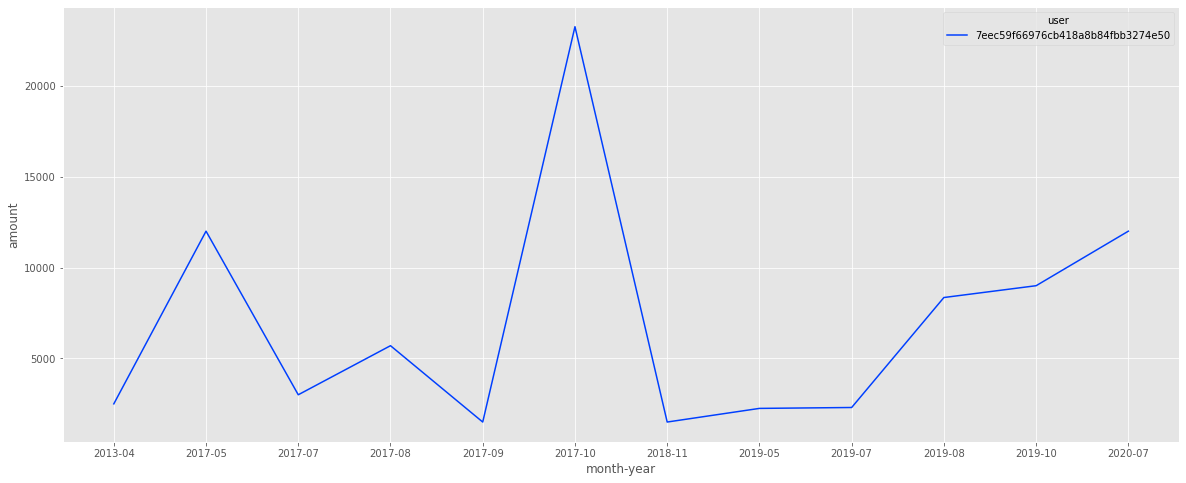

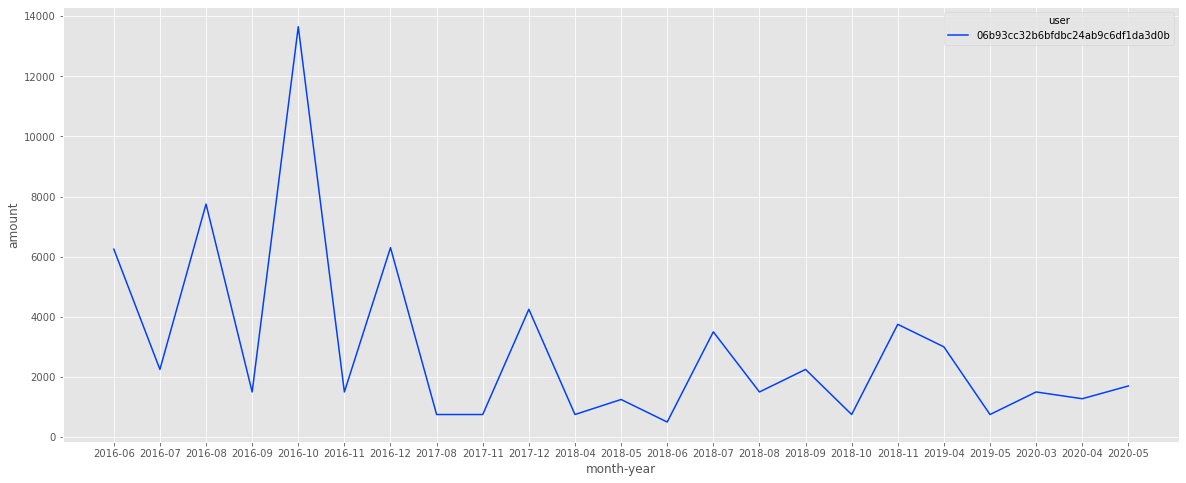

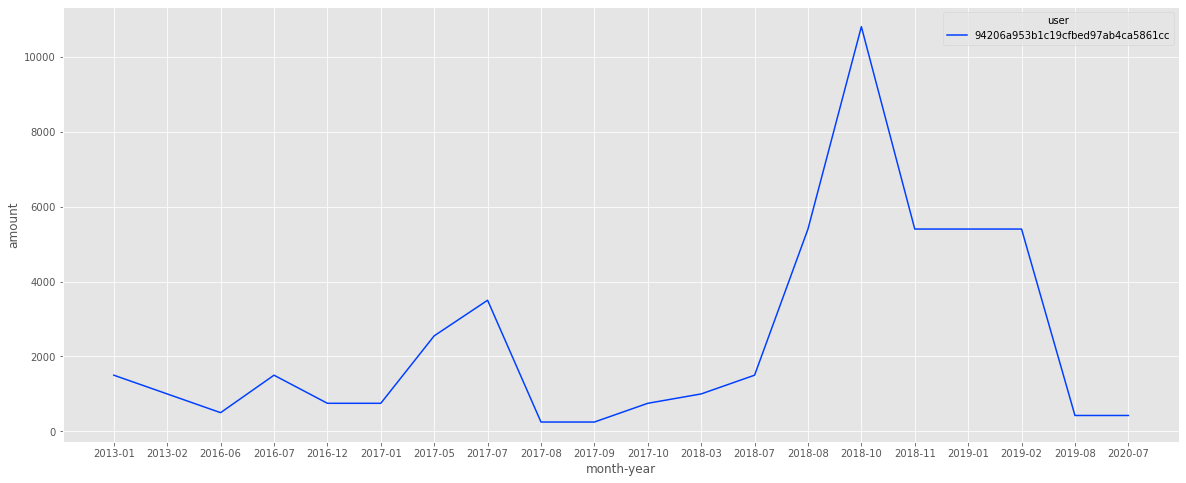

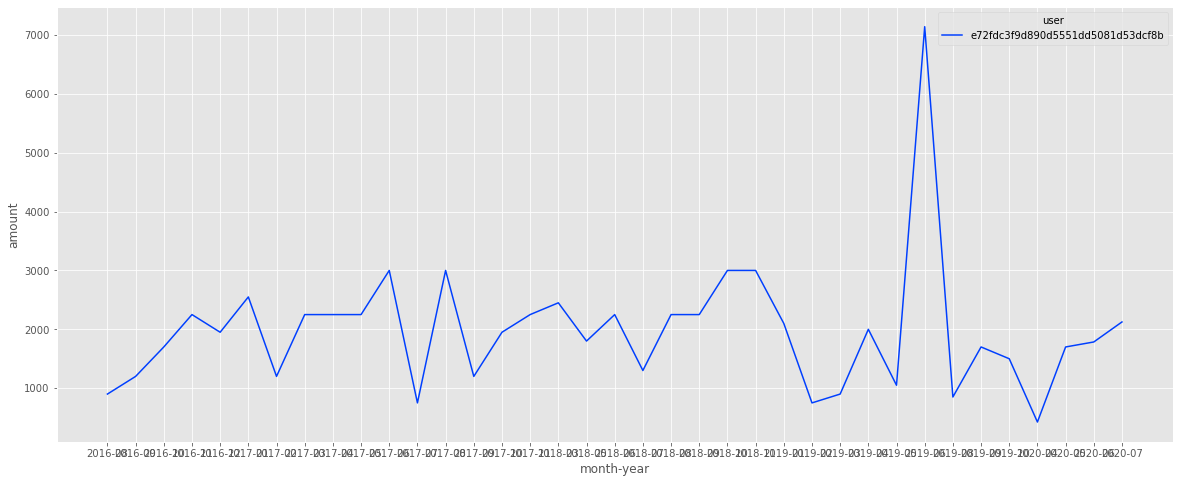

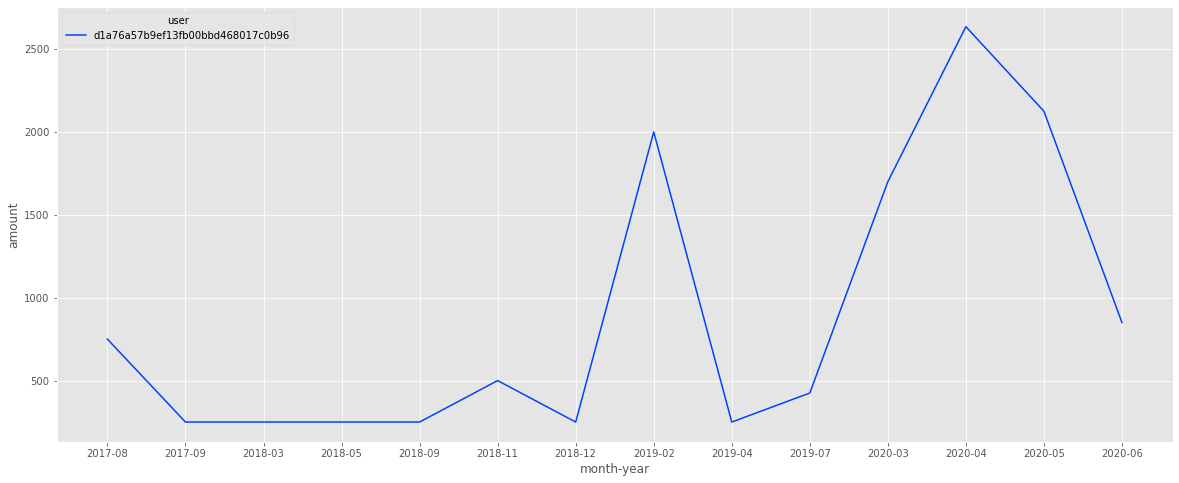

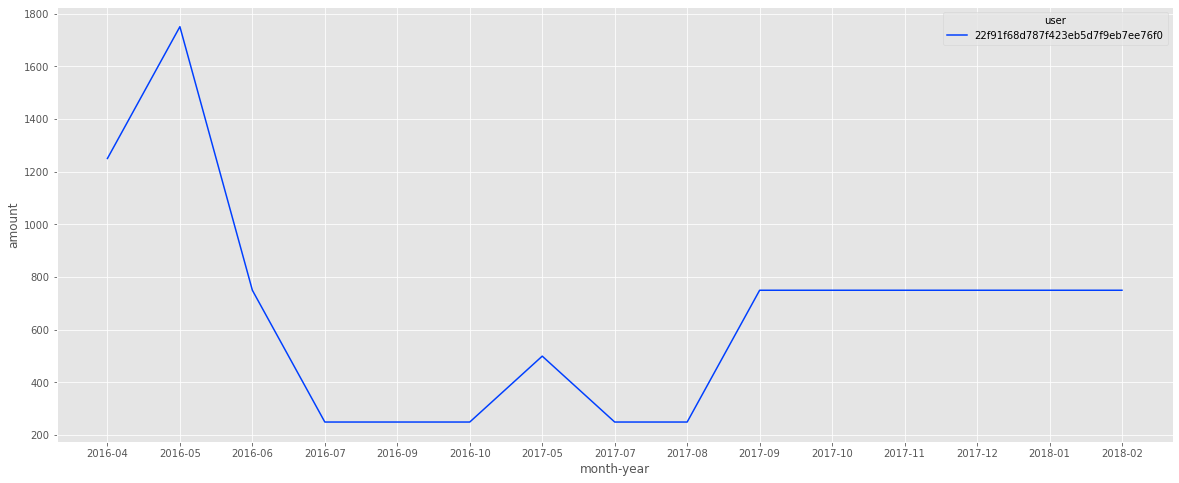

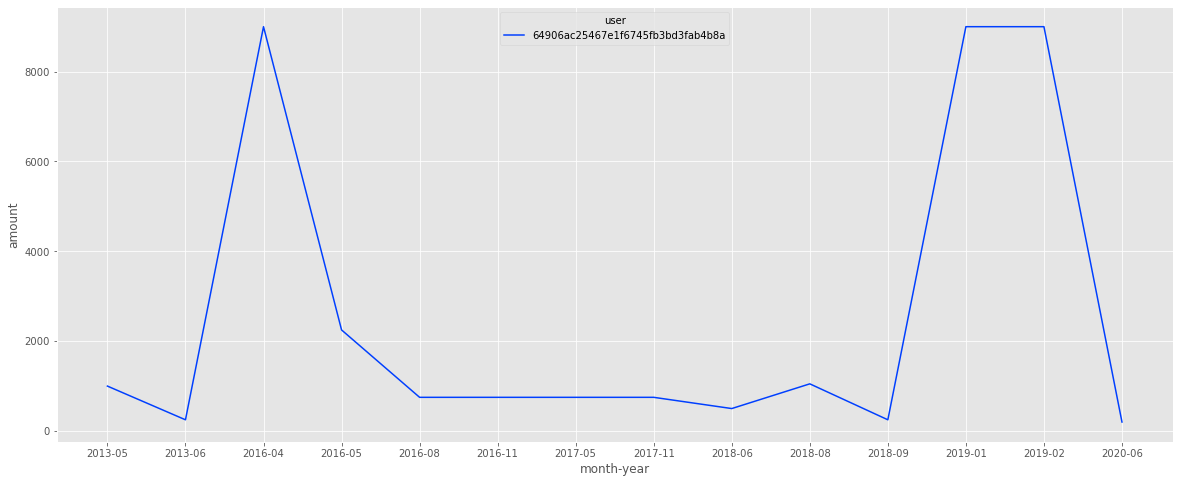

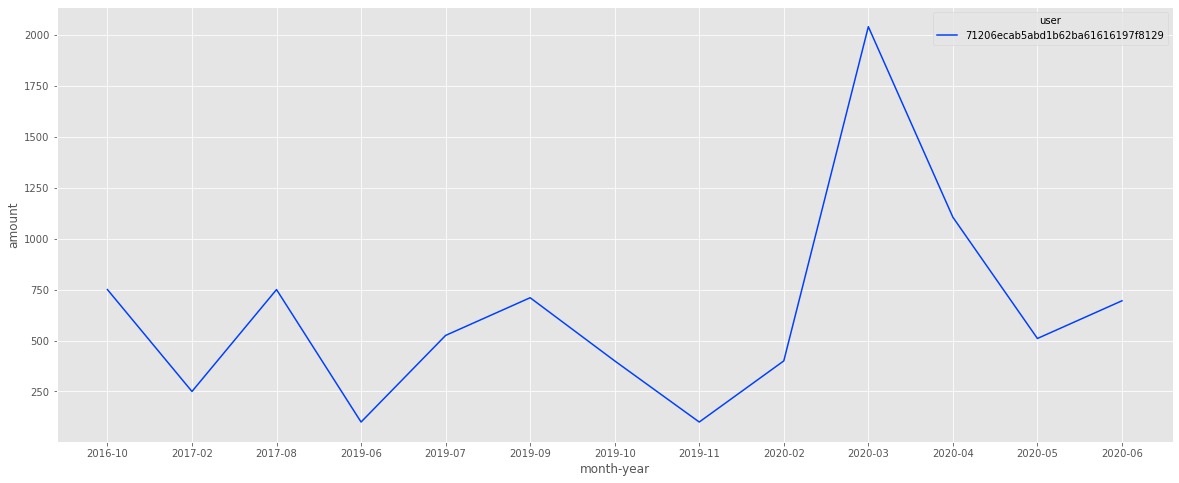

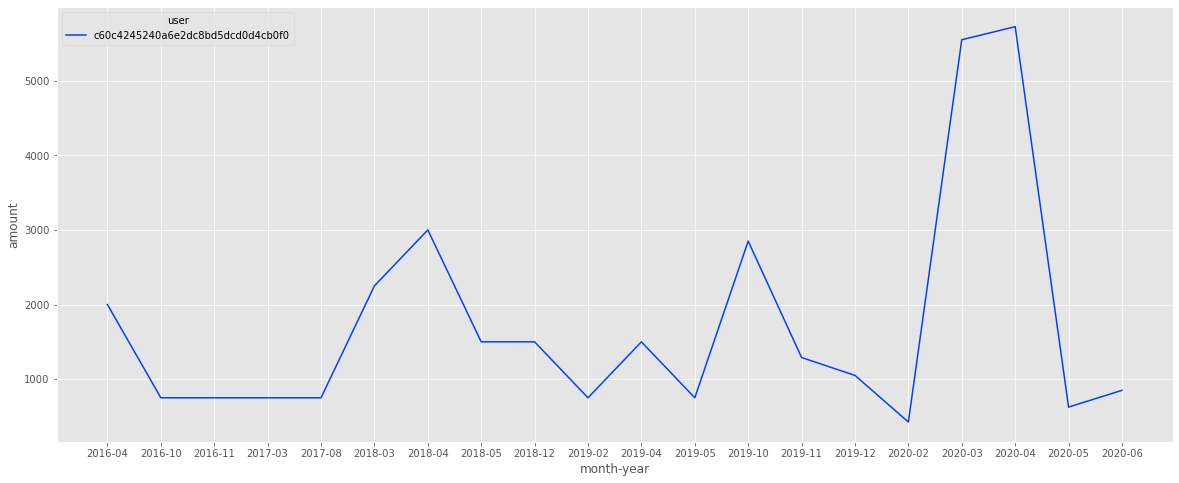

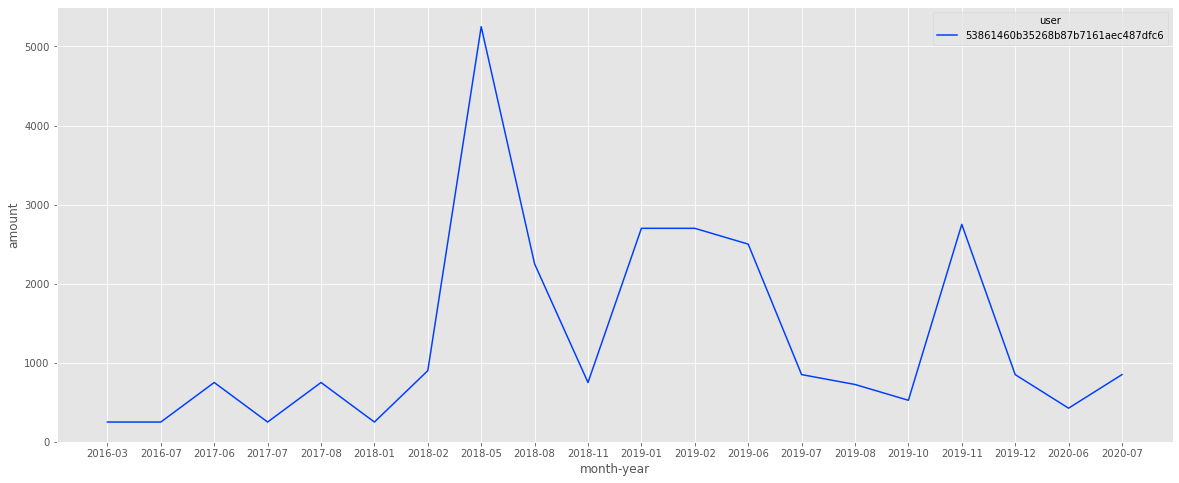

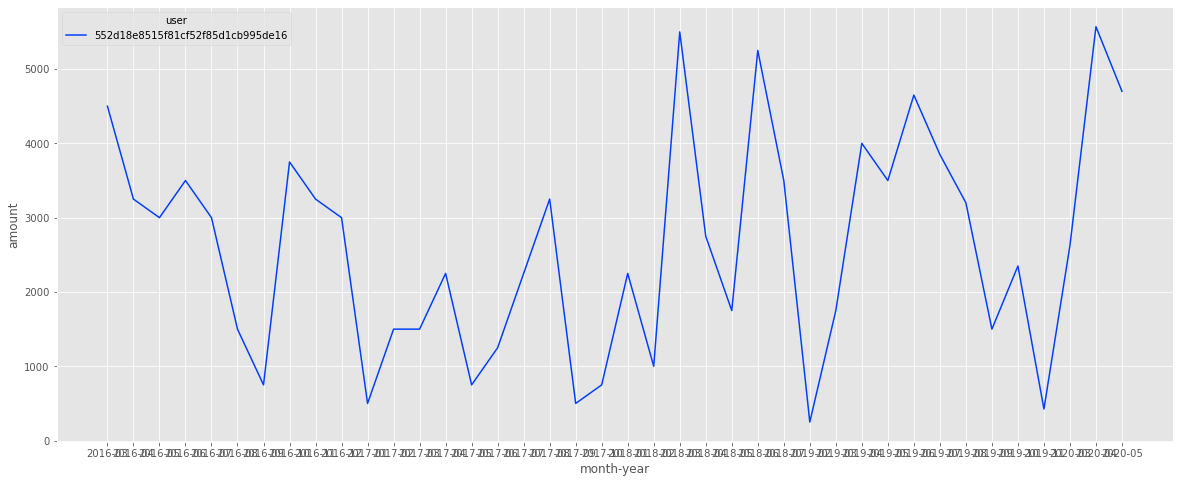

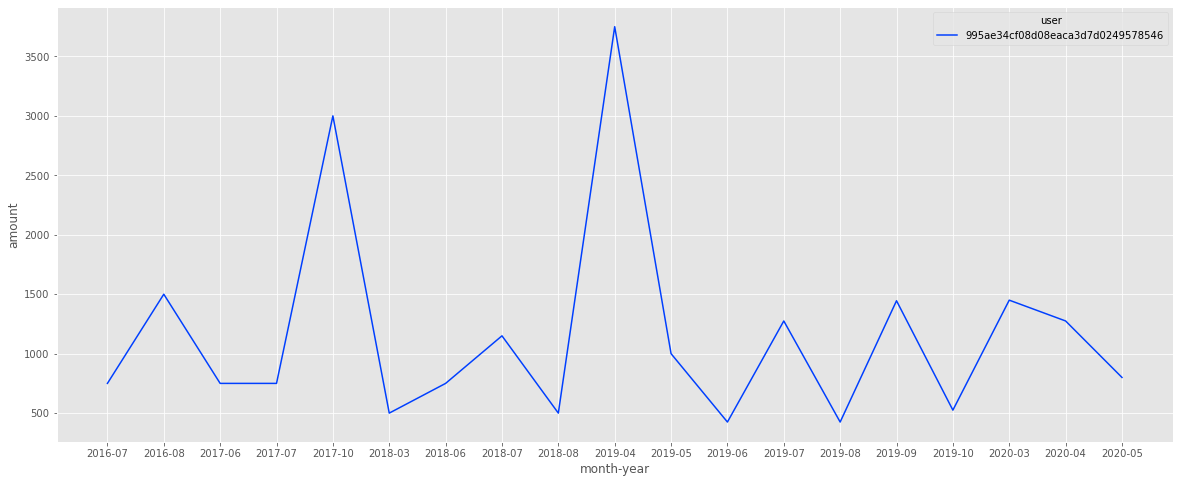

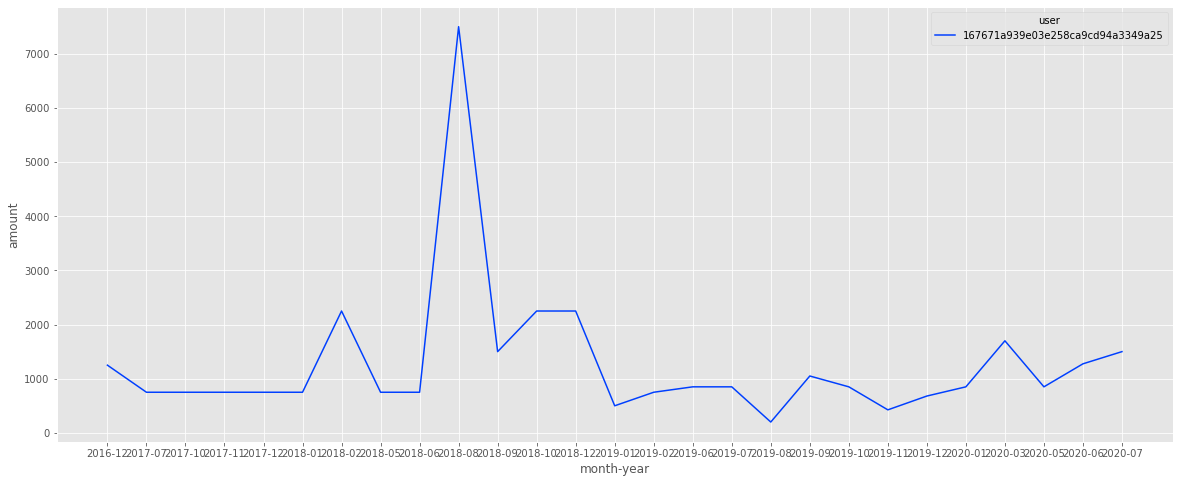

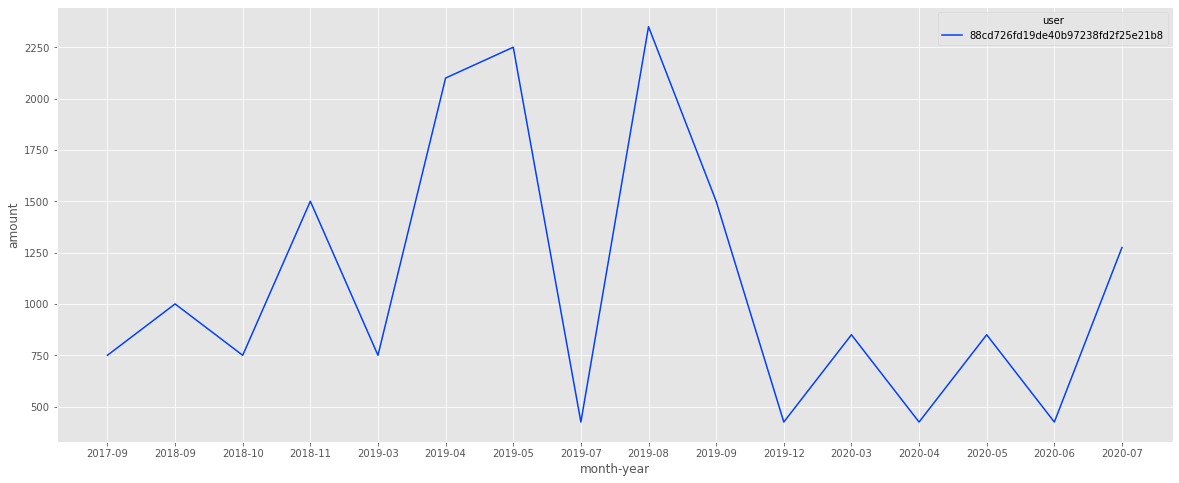

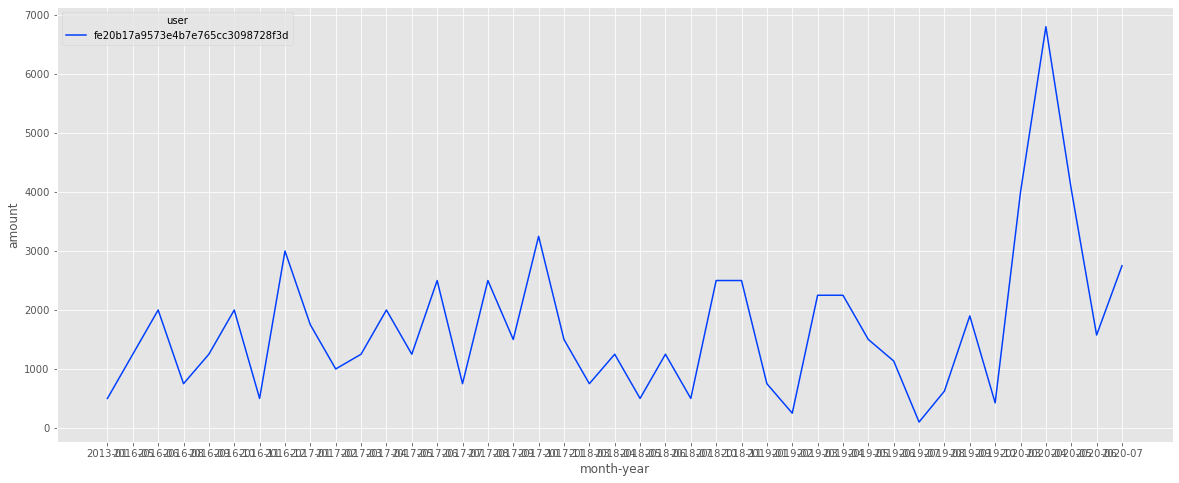

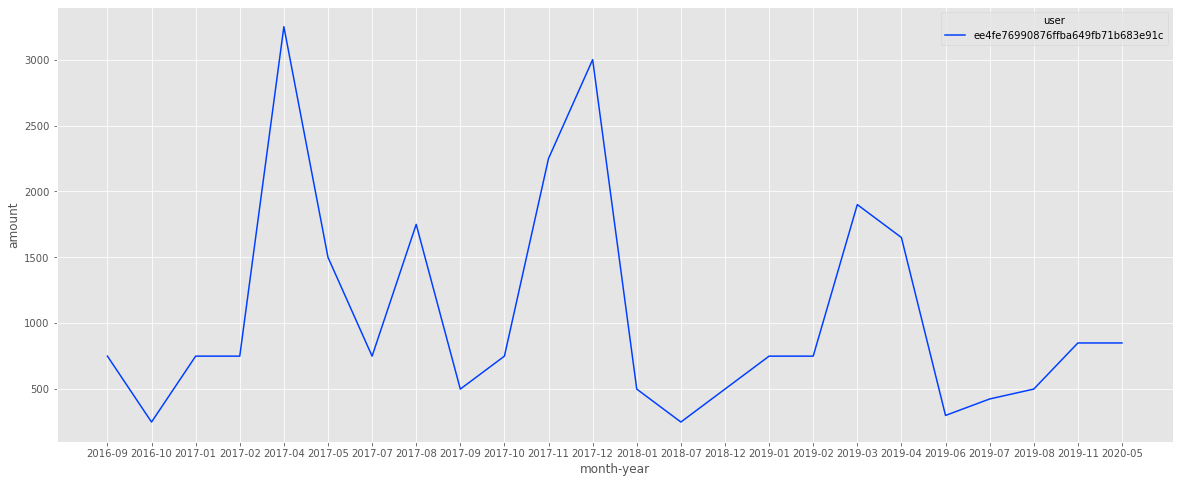

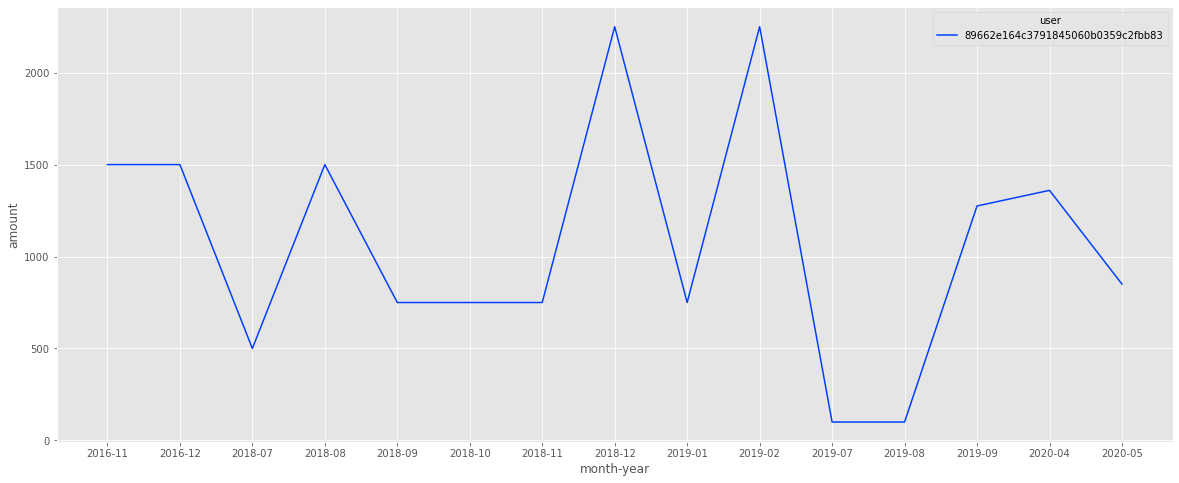

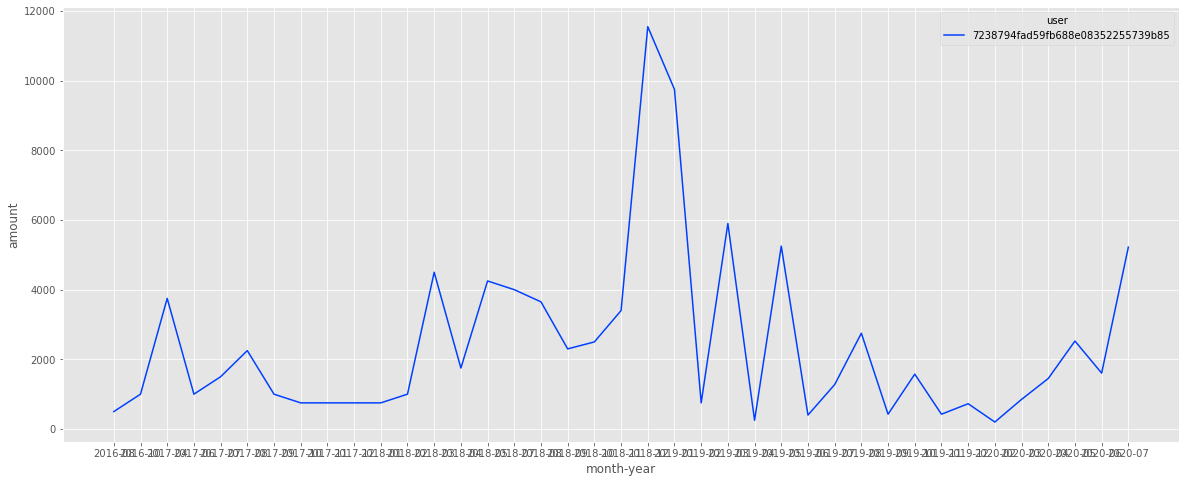

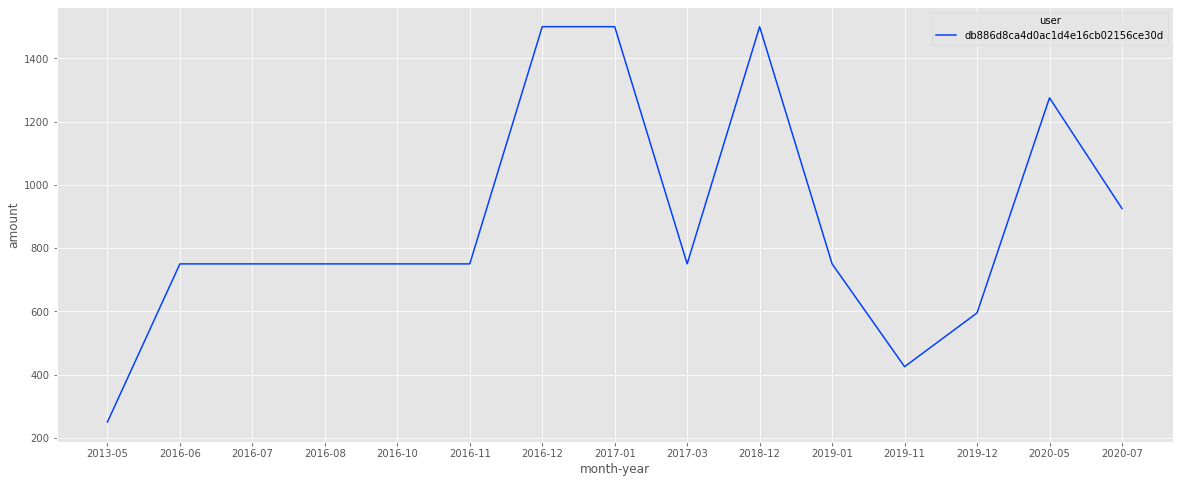

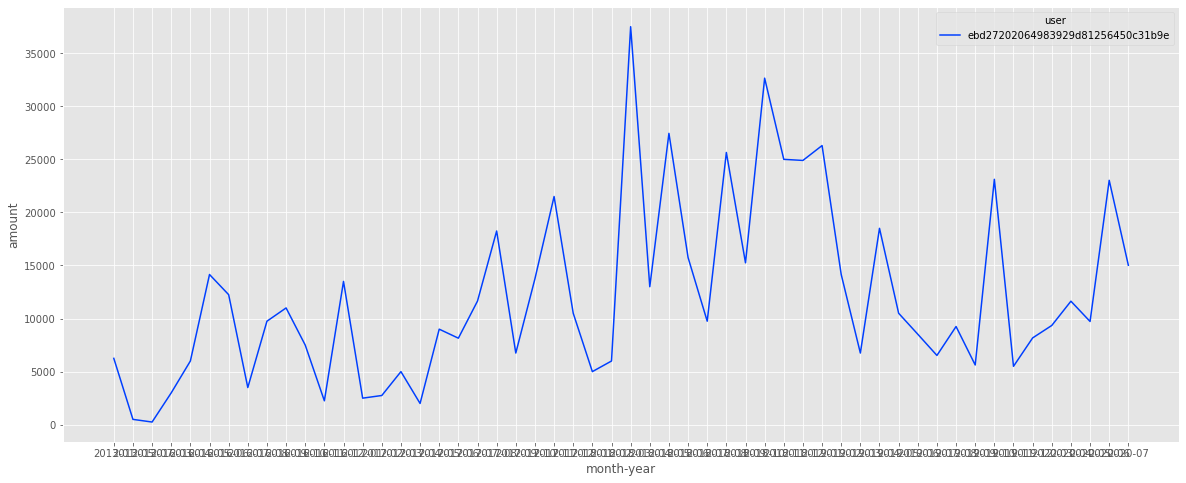

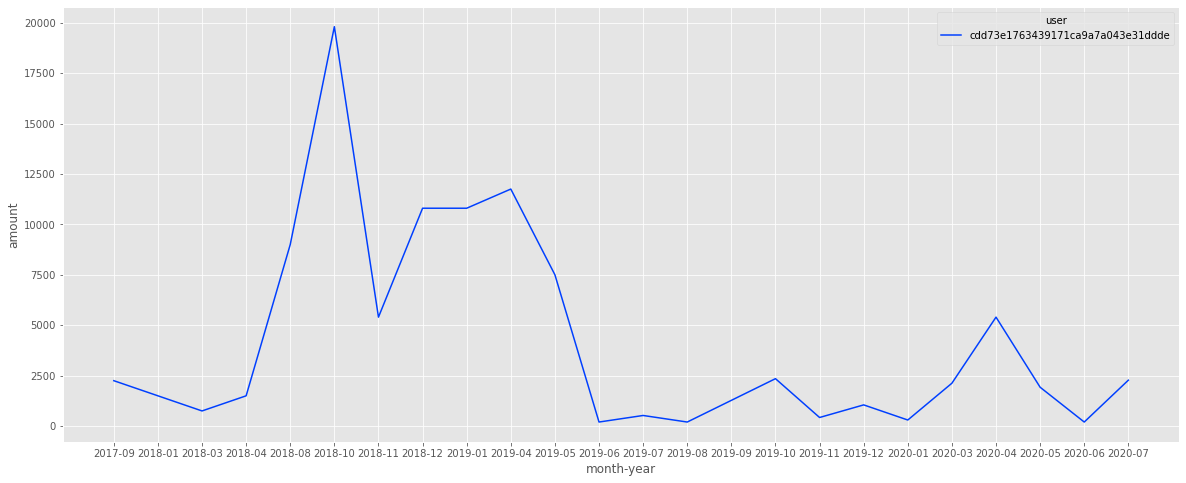

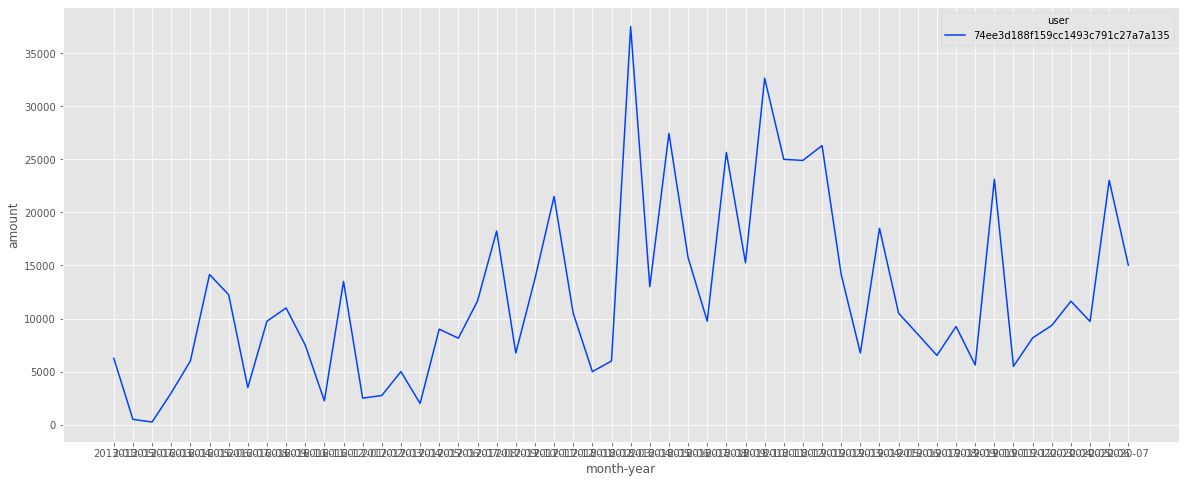

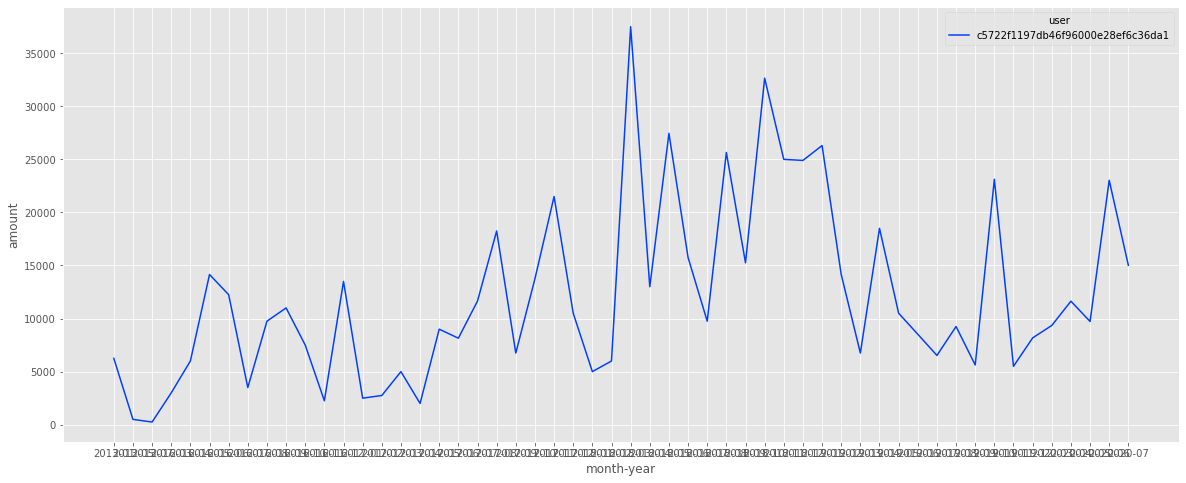

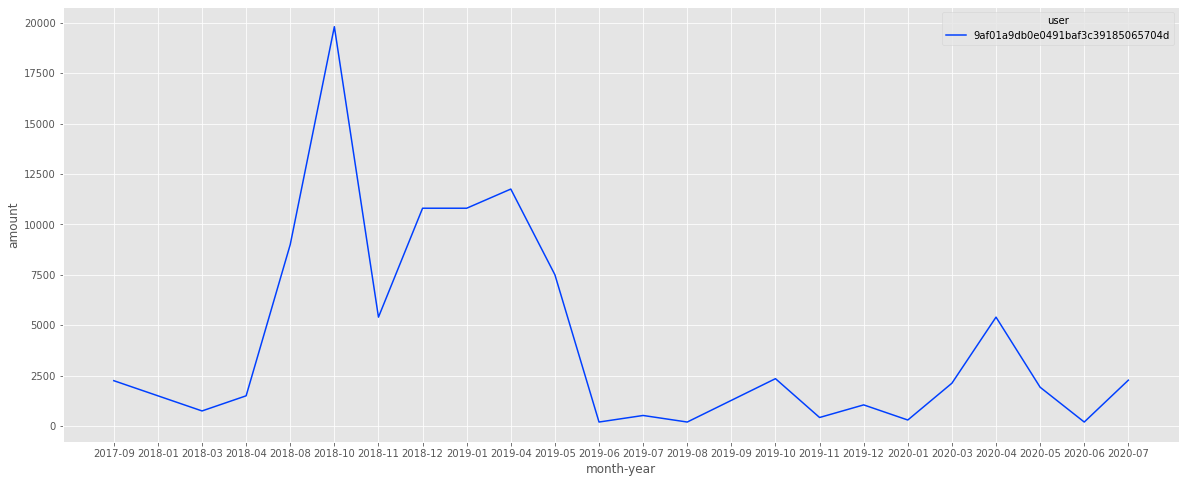

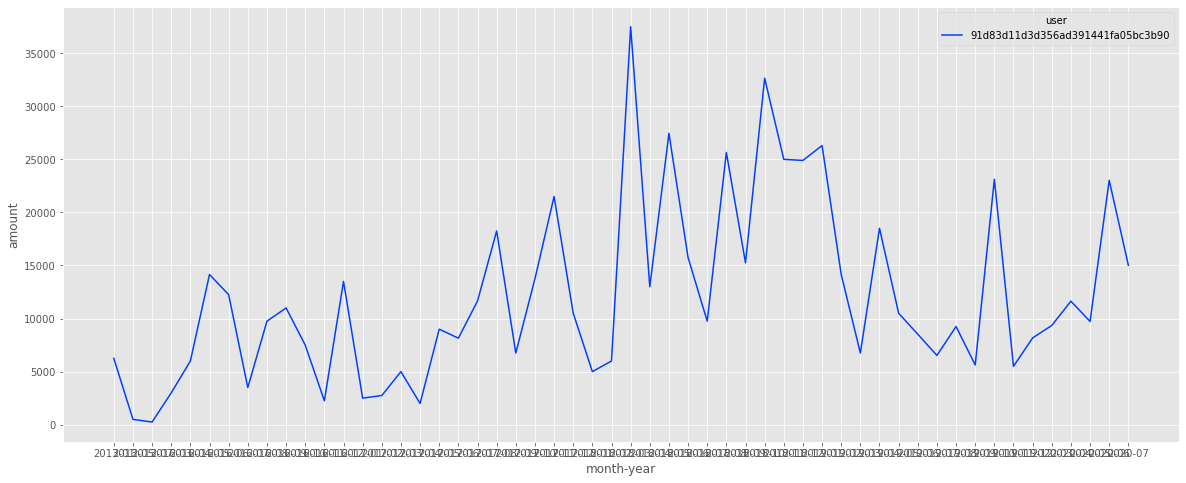

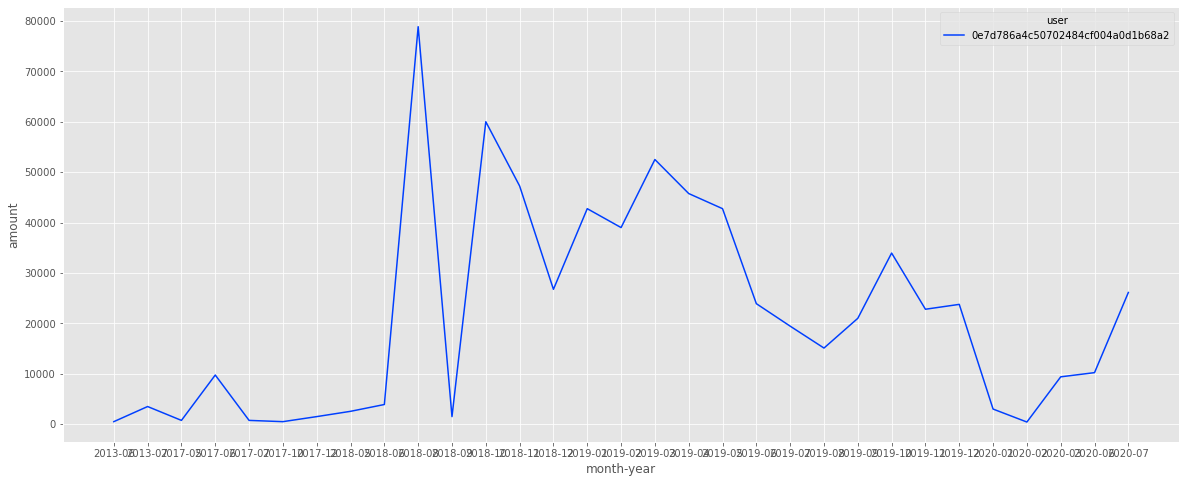

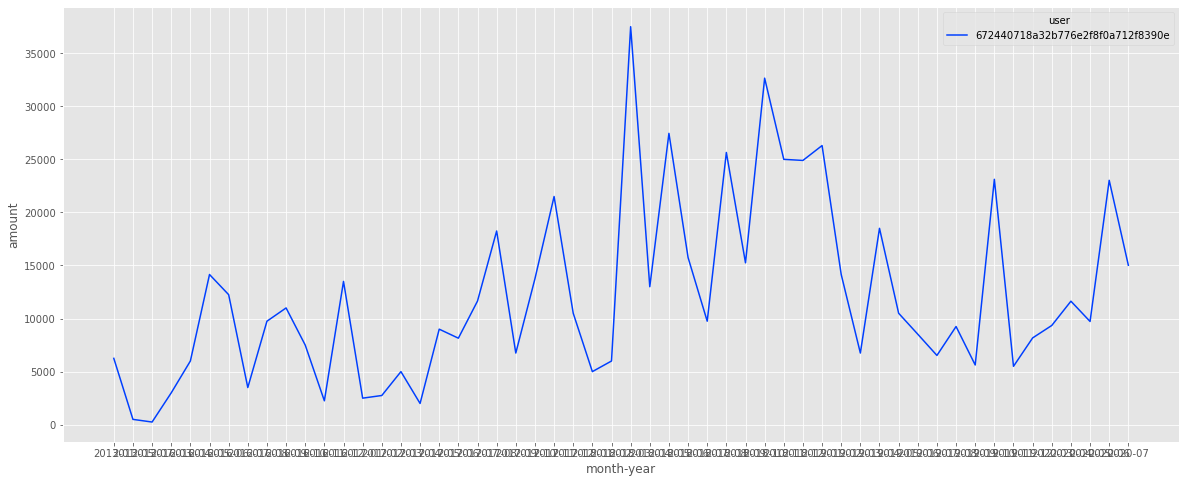

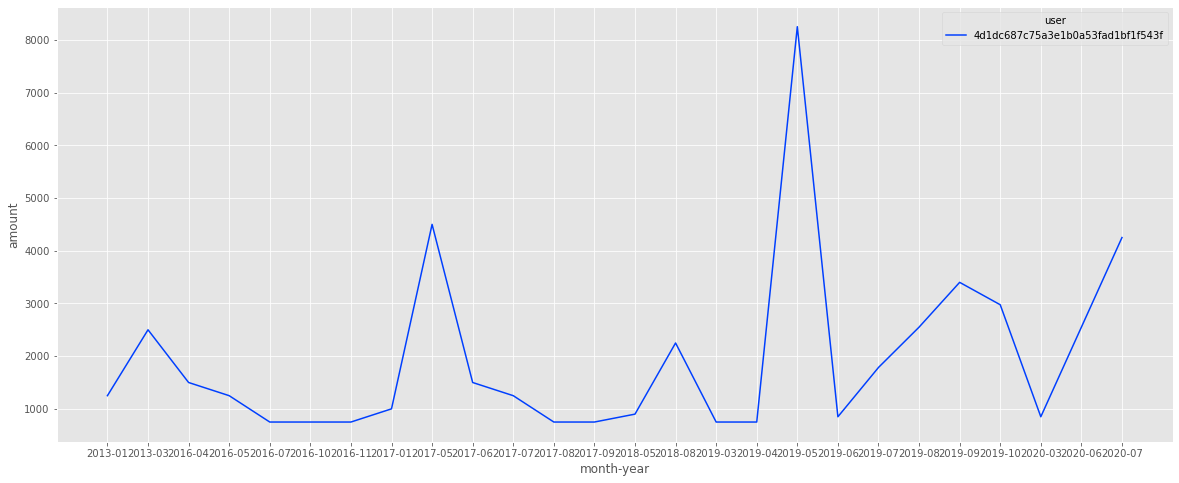

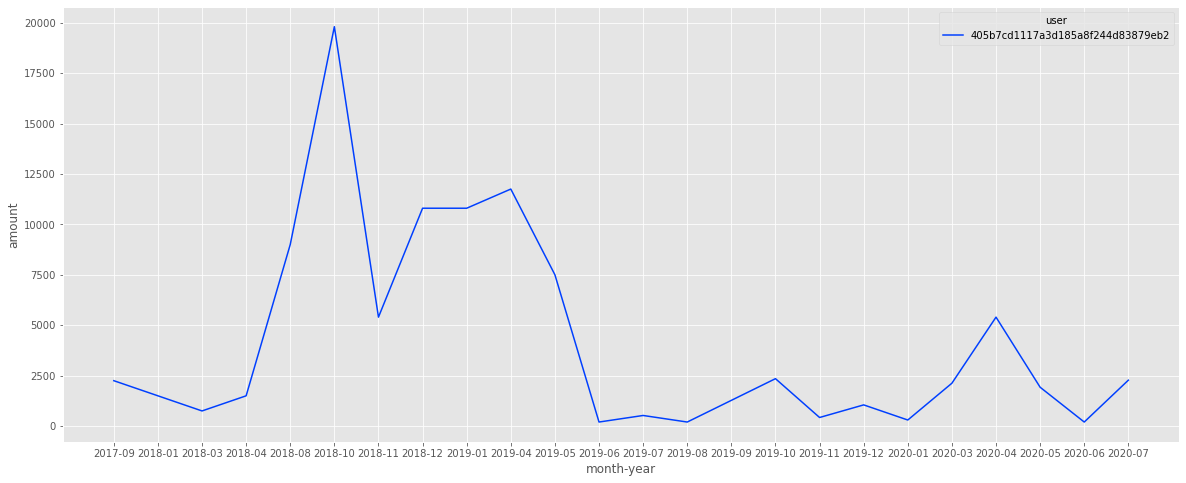

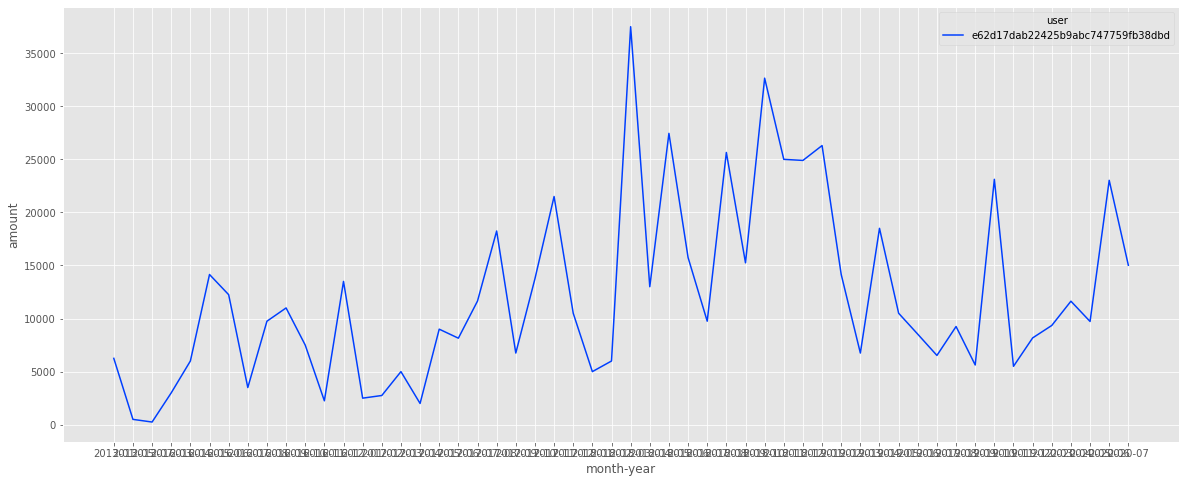

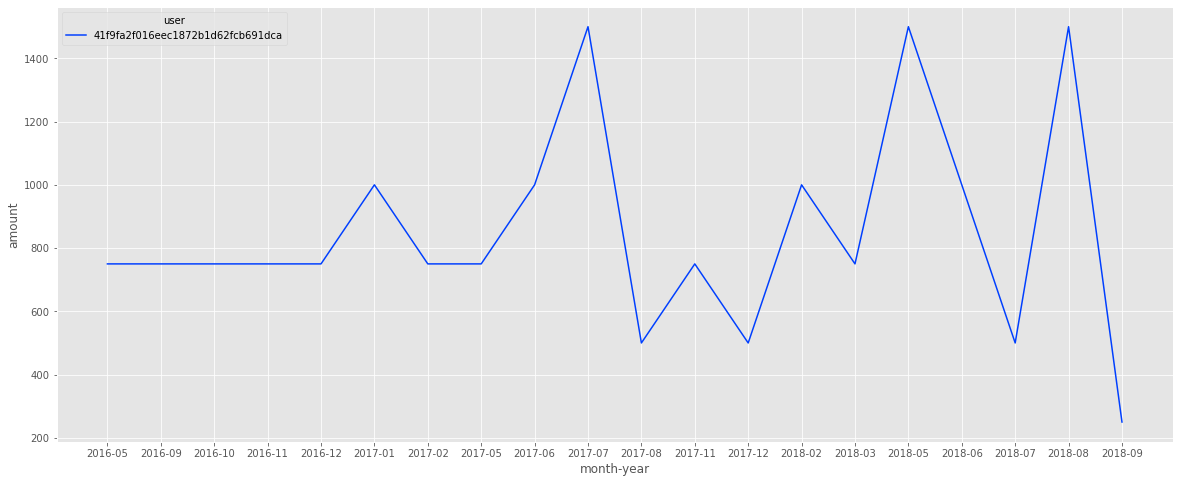

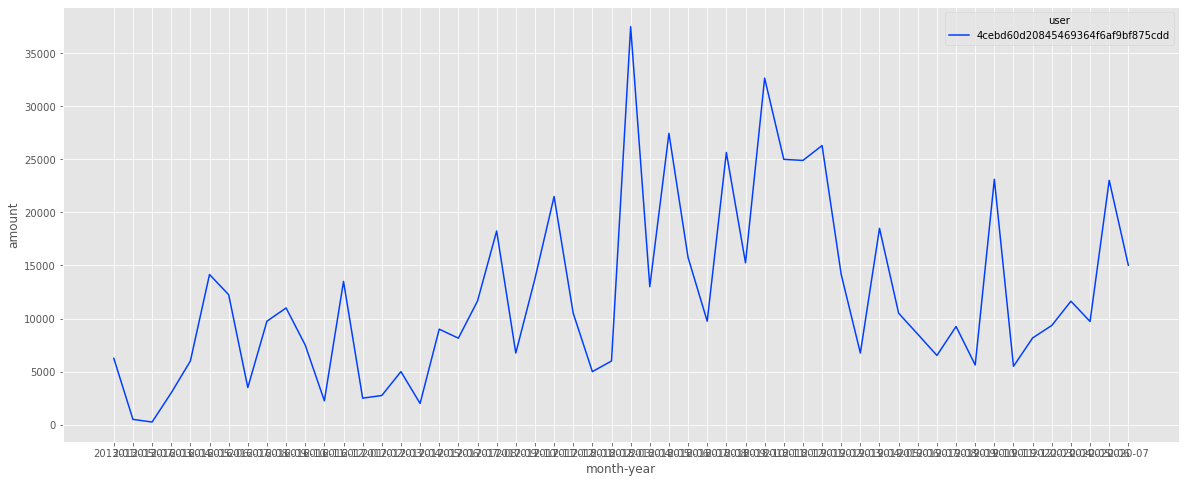

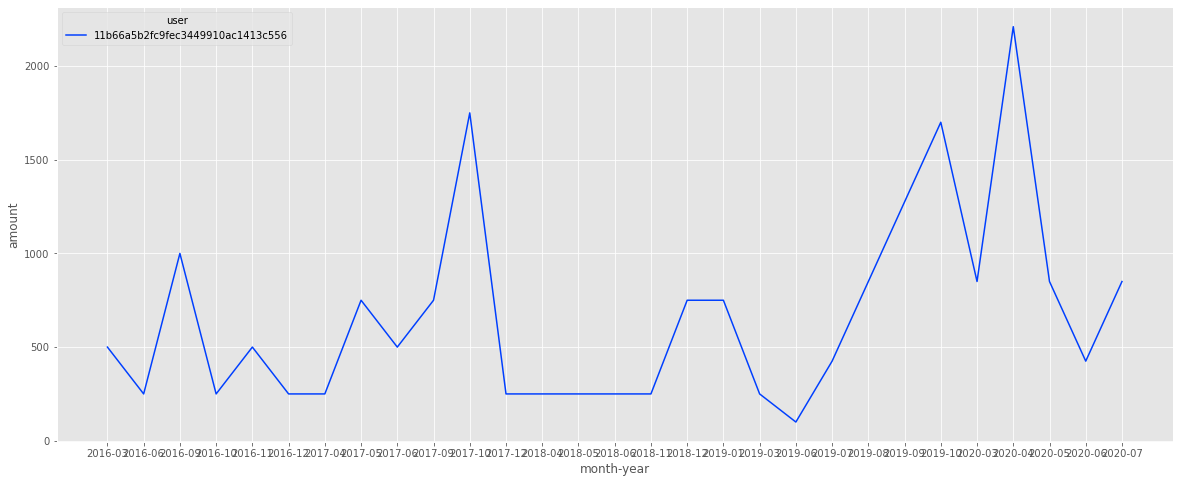

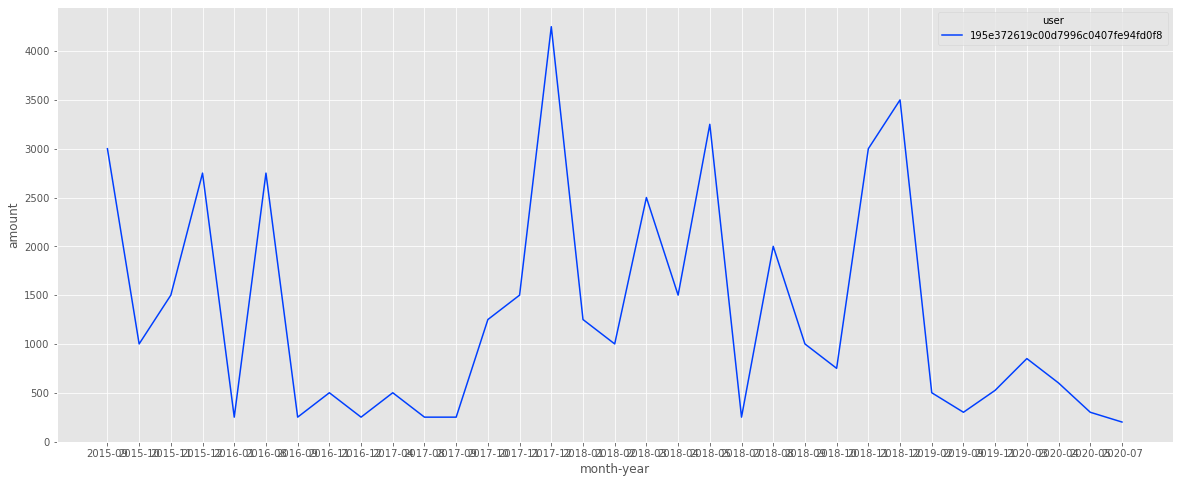

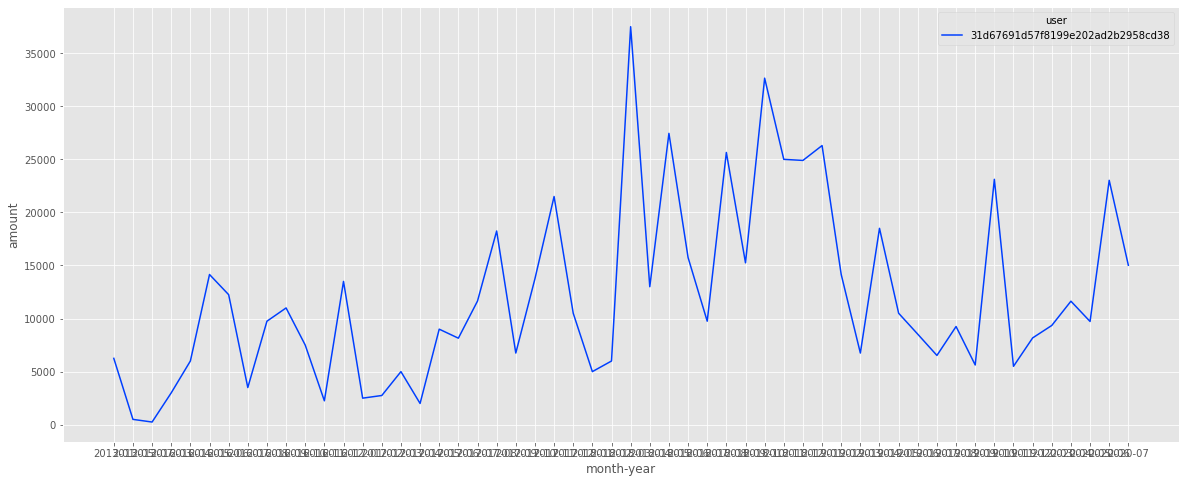

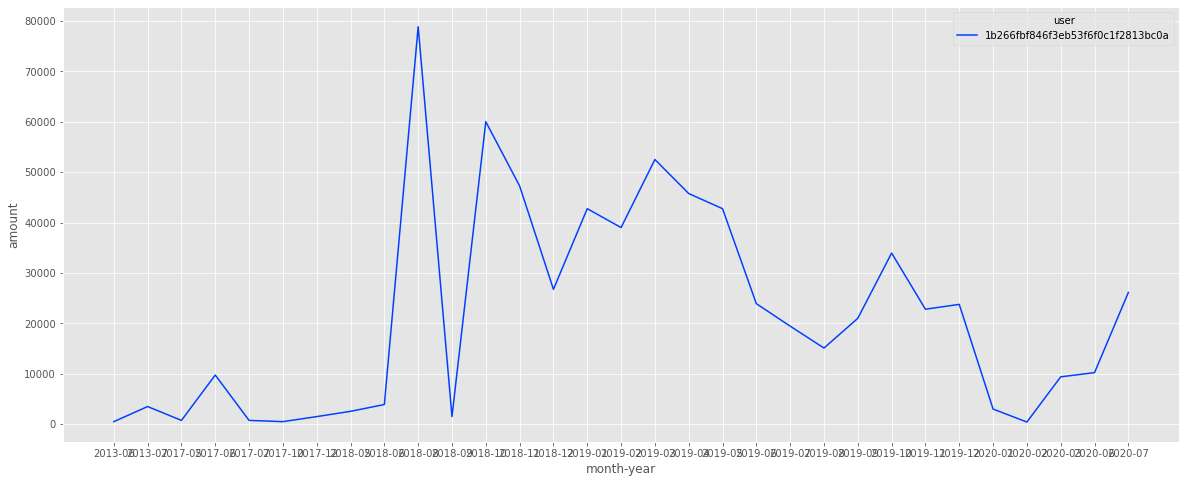

In [93]:

for user in extra_gb_mostly_used_users:
    user_usage_dict = extra_gb_freq_users[(extra_gb_freq_users["event_source.hash"]==user)]["BB_Extra_GB_Month_vs_Rental"].tolist()[0]
    if not isinstance (user_usage_dict, float) or user_usage_dict != "NO_INFO":
        user_usage_df =  pd.DataFrame(literal_eval(user_usage_dict).items(), columns=["month-year","amount"])
        user_usage_df["user"] = user
        user_usage_df.sort_values('month-year', inplace=True)
        plt.figure(figsize=(20,8))
        sns.lineplot(data=user_usage_df,hue='user',x='month-year', y='amount')
        

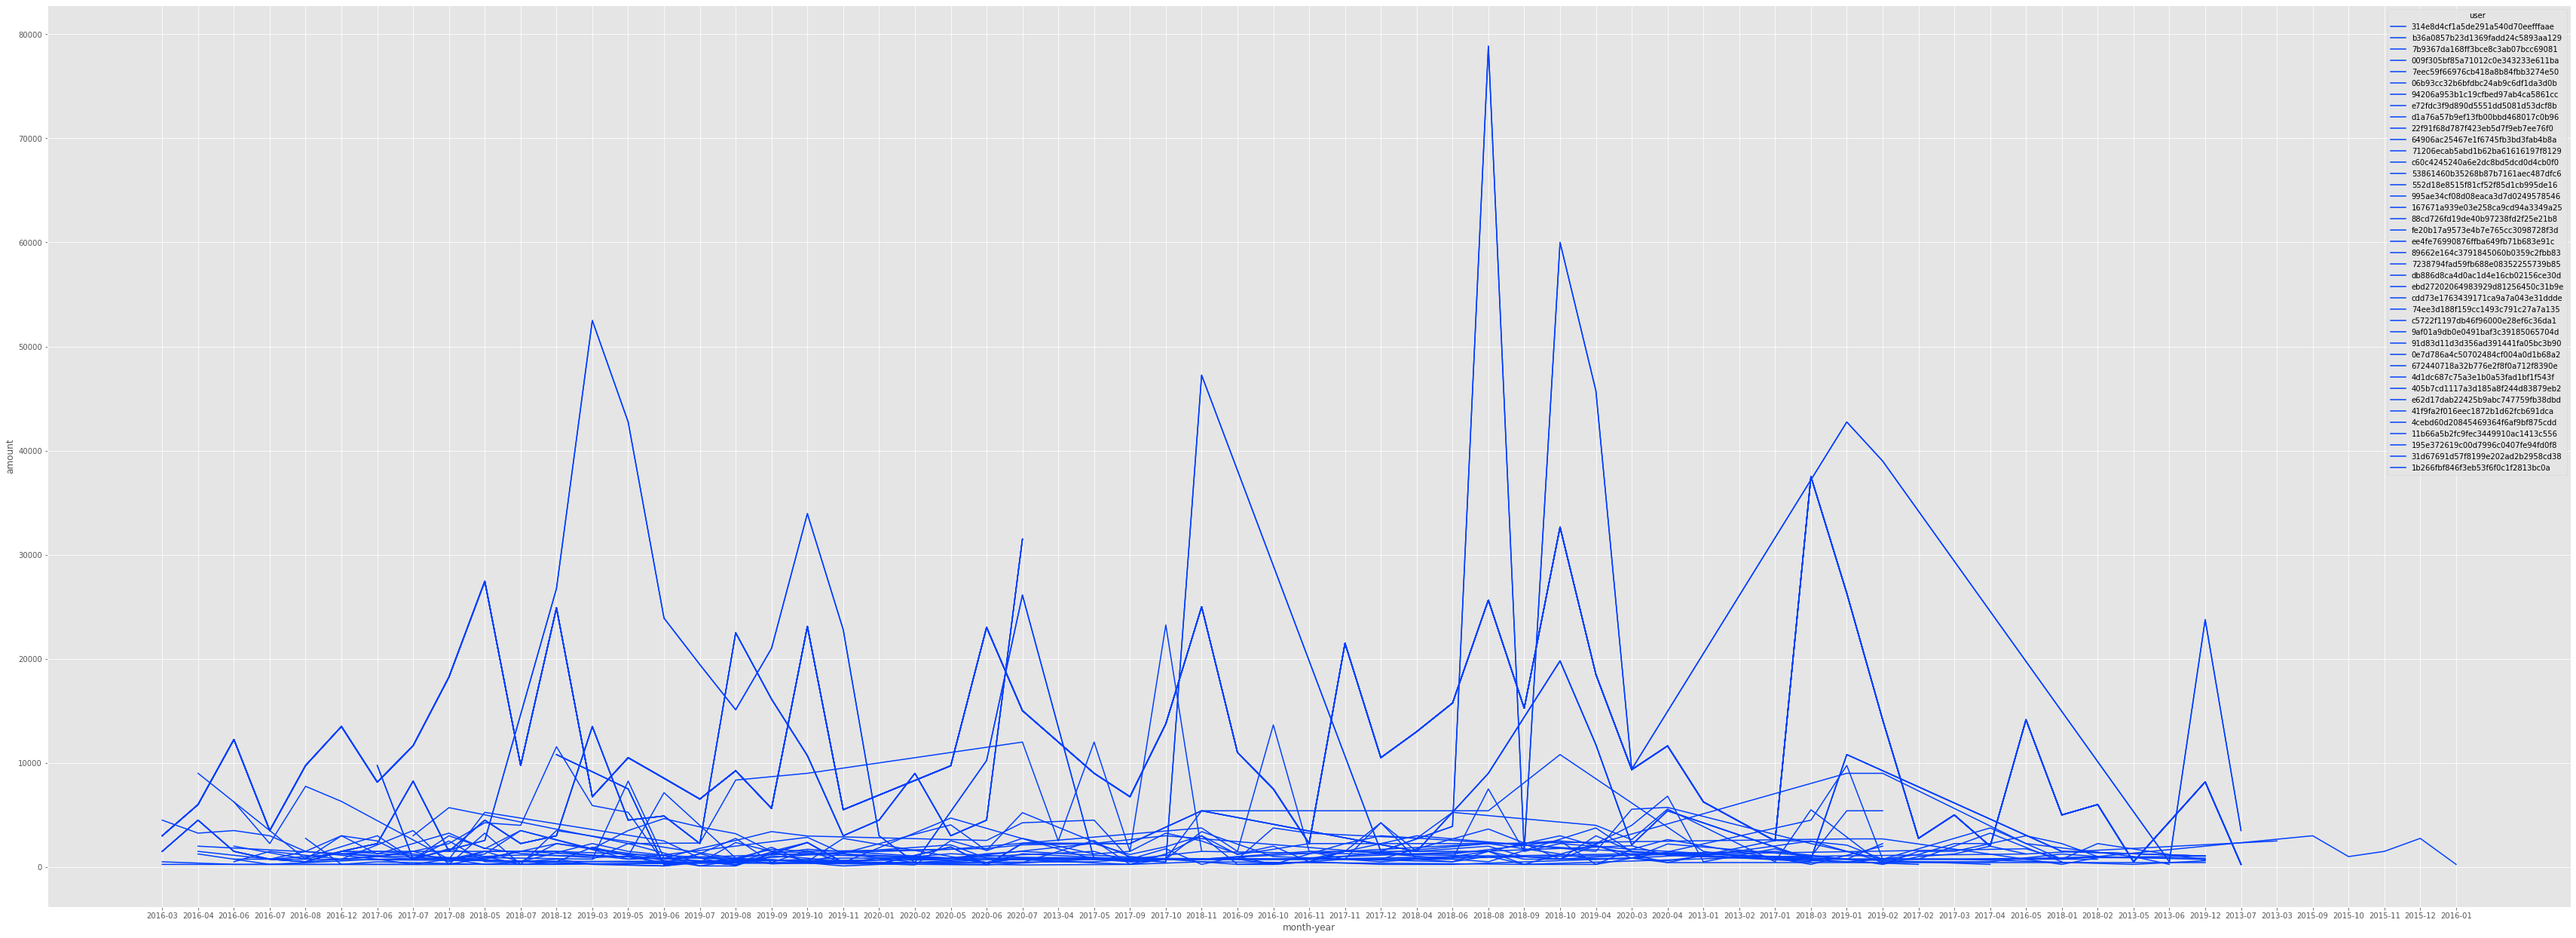

In [94]:
plt.figure(figsize=(60,22))
for user in extra_gb_mostly_used_users:
    user_usage_dict = extra_gb_freq_users[(extra_gb_freq_users["event_source.hash"]==user)]["BB_Extra_GB_Month_vs_Rental"].tolist()[0]
    if not isinstance (user_usage_dict, float) or user_usage_dict != "NO_INFO":
        user_usage_df =  pd.DataFrame(literal_eval(user_usage_dict).items(), columns=["month-year","amount"])
        user_usage_df["user"] = user
        user_usage_df.sort_values('month-year',inplace=True)
        sns.lineplot(data=user_usage_df,hue='user',x='month-year', y='amount')

## User Location

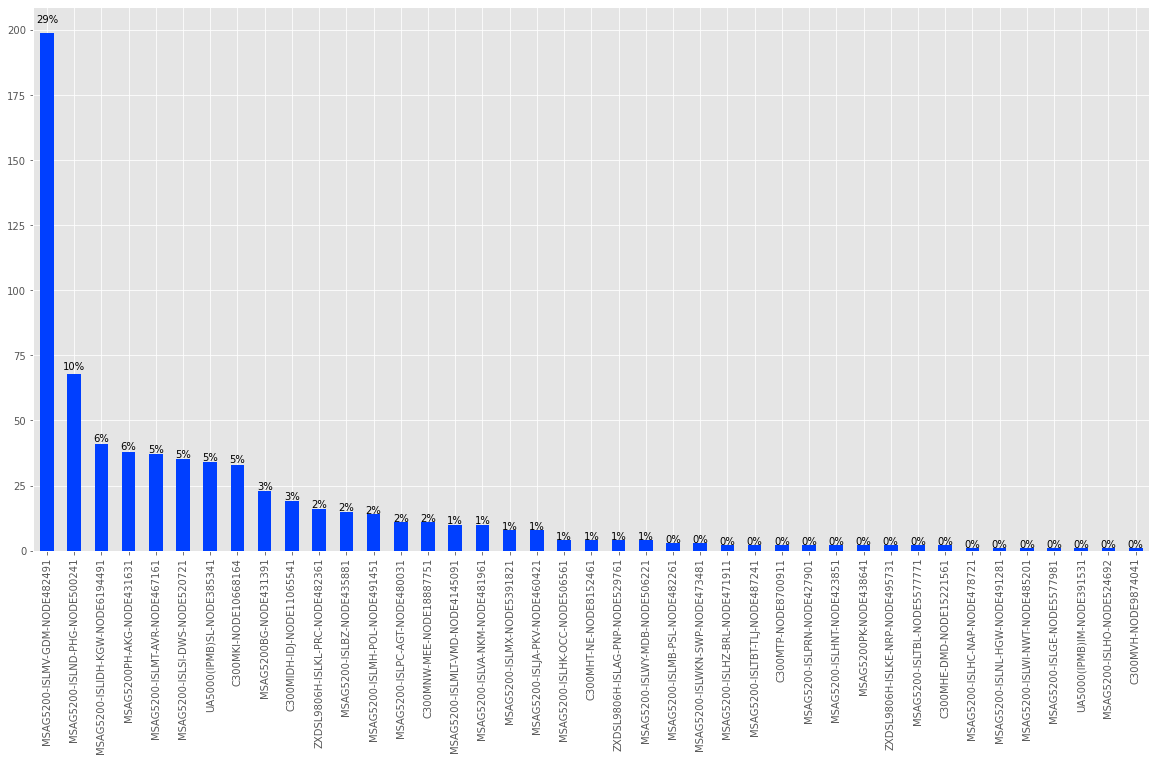

In [95]:
ax =cluster_0["Location_Identifier"].value_counts().plot(kind='bar', figsize=(20,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### User locations of Triply play customers

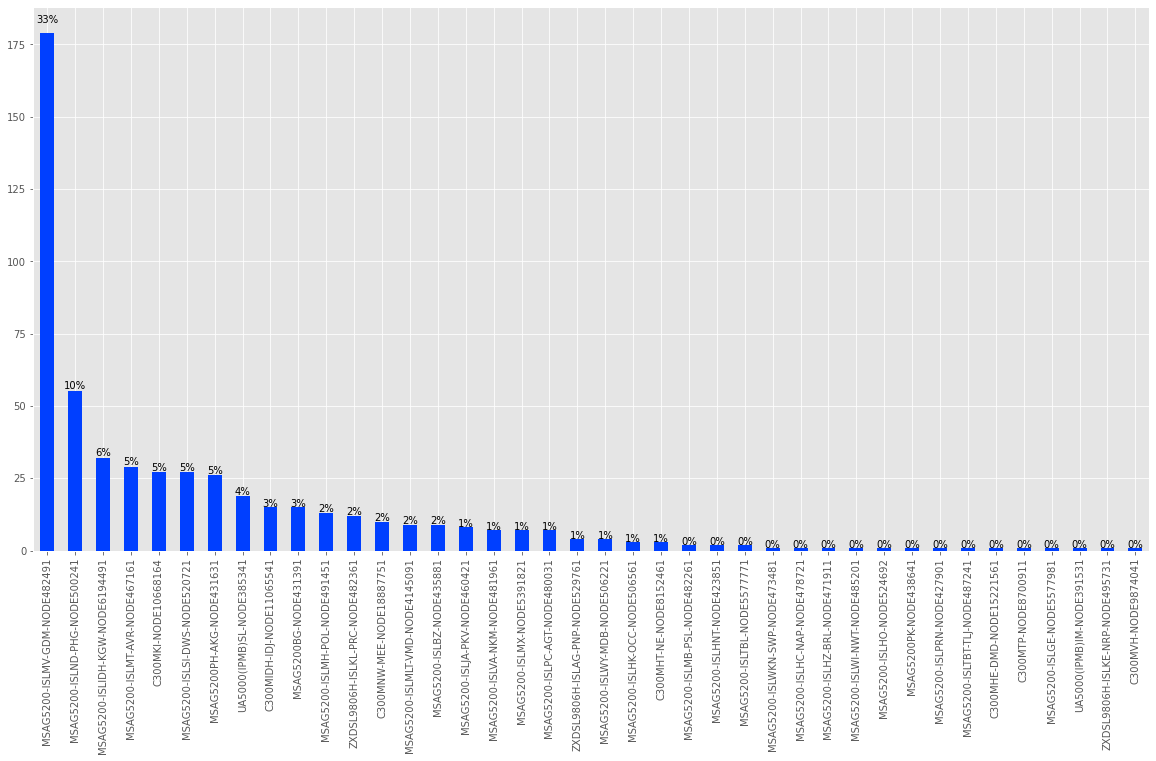

In [96]:
ax =cluster_0_peo["Location_Identifier"].value_counts().plot(kind='bar', figsize=(20,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### User locations of double play PV customers

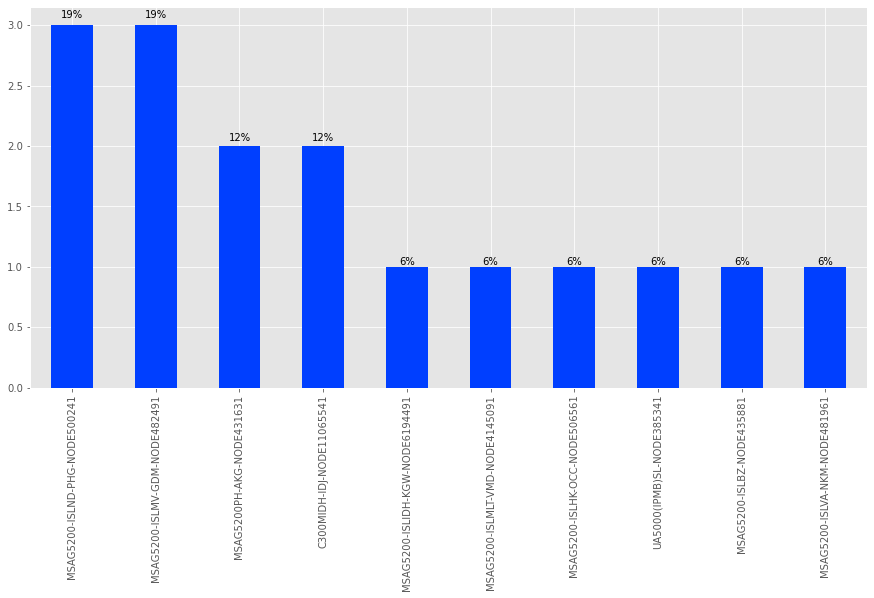

In [97]:
ax =cluster_0_peo_pv["Location_Identifier"].value_counts().plot(kind='bar', figsize=(15,7))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### User locations of double play BV customers

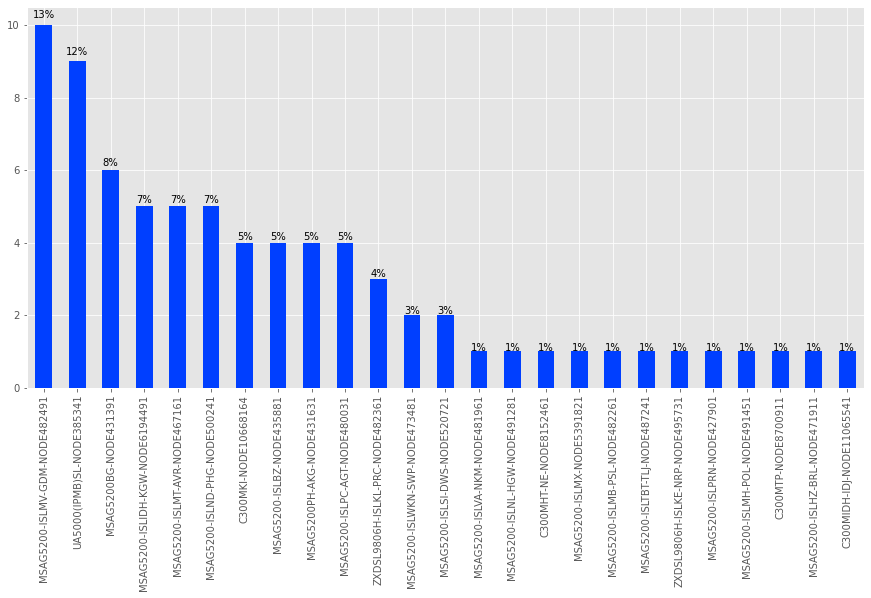

In [98]:
ax =cluster_0_bb_dp["Location_Identifier"].value_counts().plot(kind='bar', figsize=(15,7))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### IDD Usage among locations

<AxesSubplot:xlabel='Location_Identifier'>

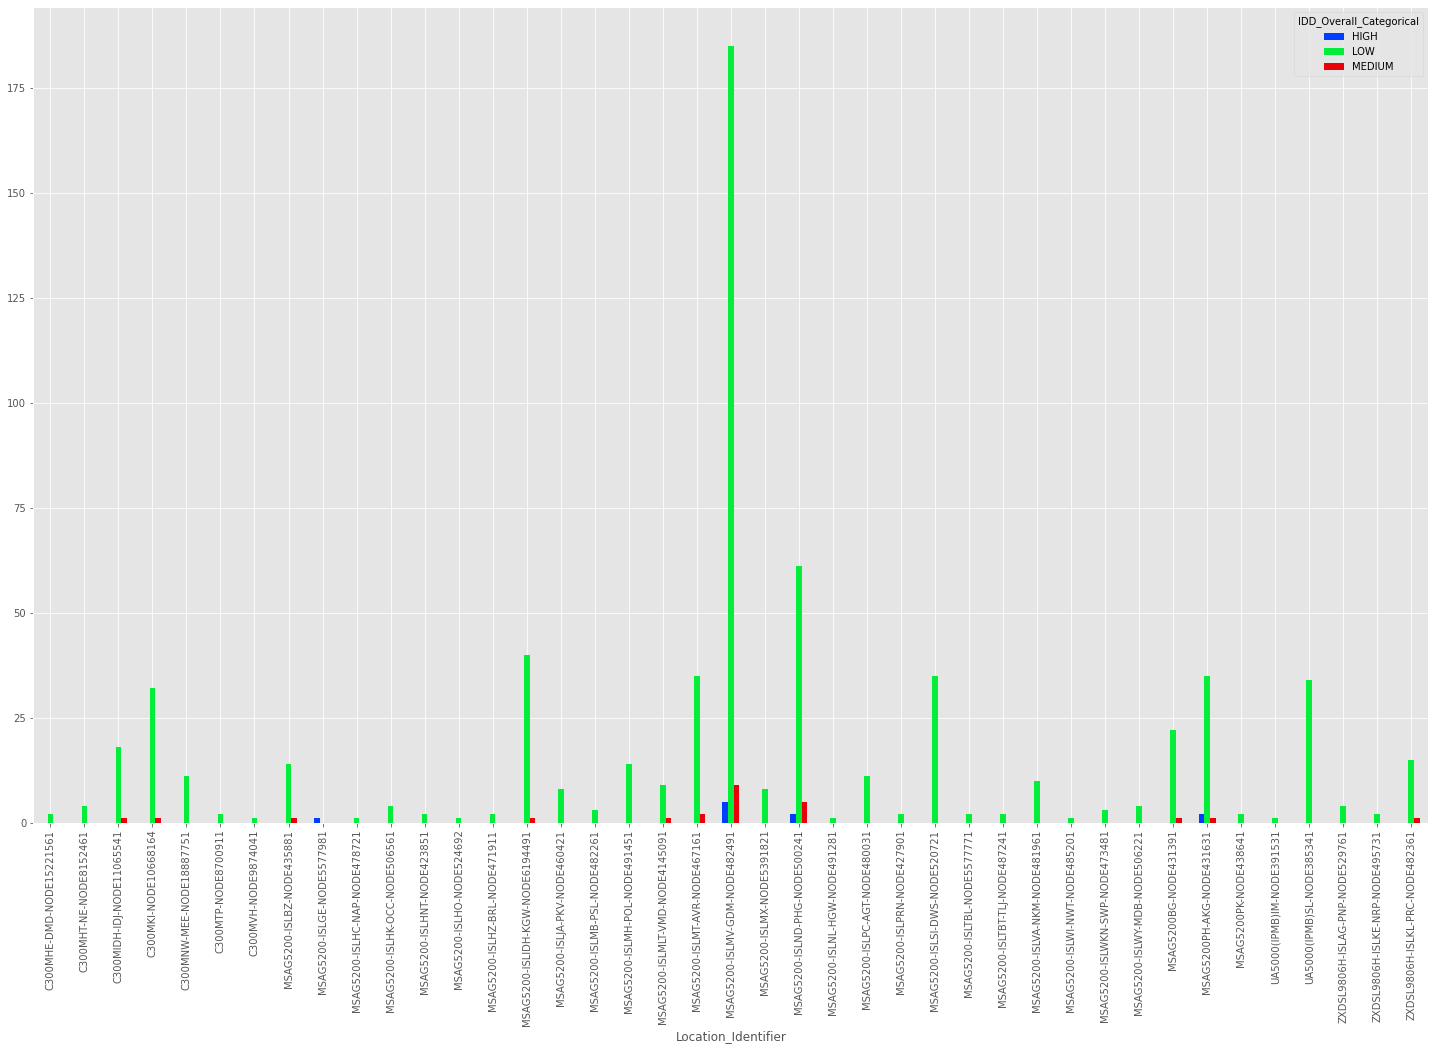

In [227]:
#ax =cluster_0[["IDD_Overall_Categorical","Location_Identifier"]].value_counts().plot(kind='bar', figsize=(15,7))

cluster_0[(cluster_0["Location_Identifier"] != "NO_INFO")].groupby(["Location_Identifier","IDD_Overall_Categorical"]).size().unstack().plot.bar(figsize=(25,15))

#### Peo TV Usage among locations

<ipython-input-99-fc08a43123d8>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[Text(0, 0, 'MSAG5200-ISLHK-OCC-NODE506561'),
 Text(1, 0, 'MSAG5200-ISLIDH-KGW-NODE6194491'),
 Text(2, 0, 'C300MIDH-IDJ-NODE11065541'),
 Text(3, 0, 'MSAG5200PK-NODE438641'),
 Text(4, 0, 'MSAG5200-ISLND-PHG-NODE500241'),
 Text(5, 0, 'MSAG5200-ISLSI-DWS-NODE520721'),
 Text(6, 0, 'C300MKI-NODE10668164'),
 Text(7, 0, 'MSAG5200-ISLHC-NAP-NODE478721'),
 Text(8, 0, 'MSAG5200-ISLWI-NWT-NODE485201'),
 Text(9, 0, 'MSAG5200-ISLMV-GDM-NODE482491'),
 Text(10, 0, 'MSAG5200-ISLHO-NODE524692'),
 Text(11, 0, 'MSAG5200-ISLMLT-VMD-NODE4145091'),
 Text(12, 0, 'MSAG5200-ISLJA-PKV-NODE460421'),
 Text(13, 0, 'MSAG5200-ISLPRN-NODE427901'),
 Text(14, 0, 'MSAG5200-ISLMB-PSL-NODE482261'),
 Text(15, 0, 'MSAG5200-ISLVA-NKM-NODE481961'),
 Text(16, 0, 'MSAG5200-ISLTBT-TLJ-NODE487241'),
 Text(17, 0, 'MSAG5200-ISLWKN-SWP-NODE473481'),
 Text(18, 0, 'UA5000(IPMB)SL-NODE385341'),
 Text(19, 0, 'MSAG5200-ISLMX-NODE5391821'),
 Text(20, 0, 'MSAG5200-ISLGE-NODE5577981'),
 Text(21, 0, 'MSAG5200-ISLPC-AGT-NODE480031'),
 Text(22

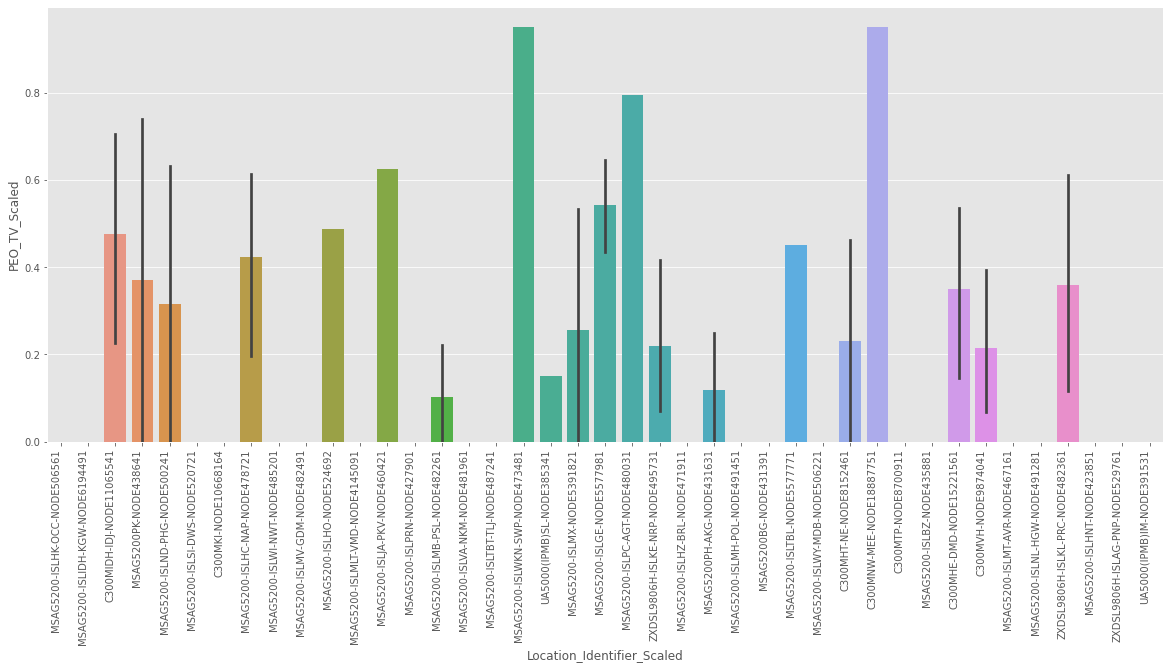

In [99]:
plt.figure(figsize=(20,8))
location_peo_df = cluster_0[["event_source.hash","Location_Identifier","PEO_TV_Scaled"]]
location_peo_df["Location_Identifier_Scaled"] = location_peo_df["Location_Identifier"].astype("category").cat.codes
loc_peo_bar_plot = sns.barplot(data=location_peo_df,x='Location_Identifier_Scaled', y='PEO_TV_Scaled')

loc_peo_bar_plot.set_xticklabels(location_peo_df["Location_Identifier"].unique(), 
                          rotation=90, 
                          horizontalalignment='right')

#### Popularity of PeoTV Packages among Locations

In [100]:
location_arr = cluster_0["Location_Identifier"].unique()

<ipython-input-101-5bf5f974f3db>:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



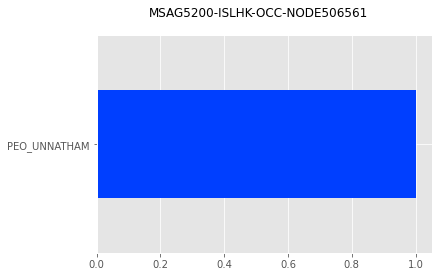

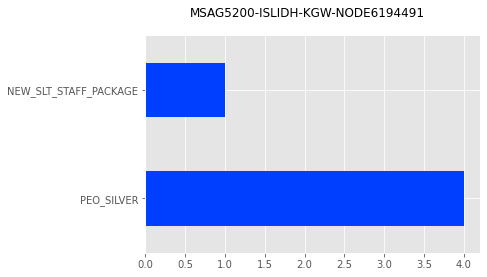

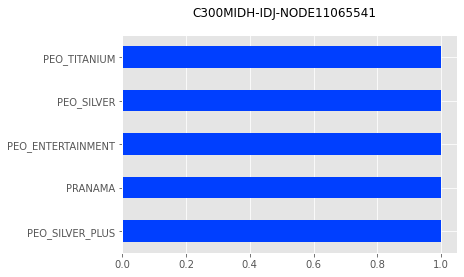

<Figure size 432x288 with 0 Axes>

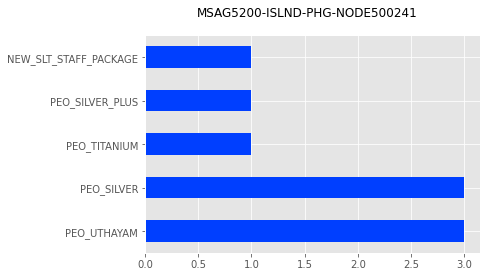

<Figure size 432x288 with 0 Axes>

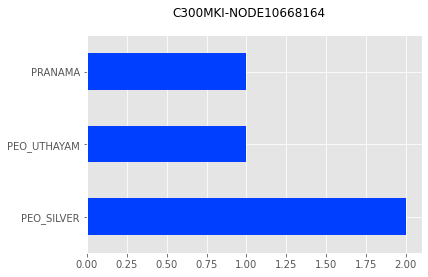

<Figure size 432x288 with 0 Axes>

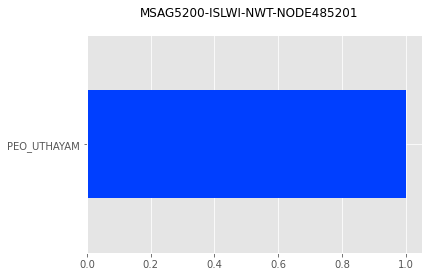

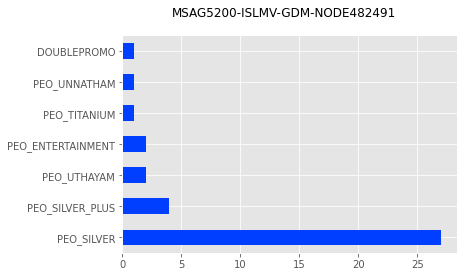

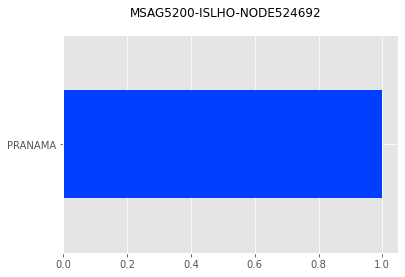

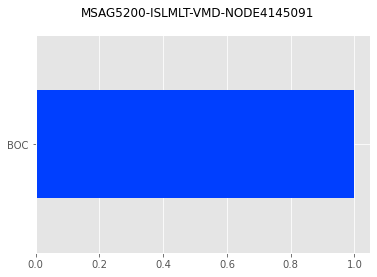

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

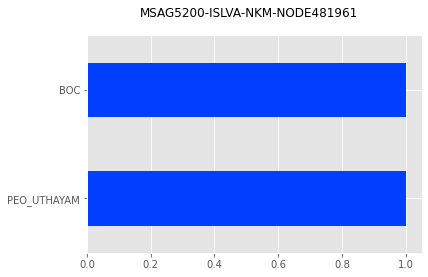

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

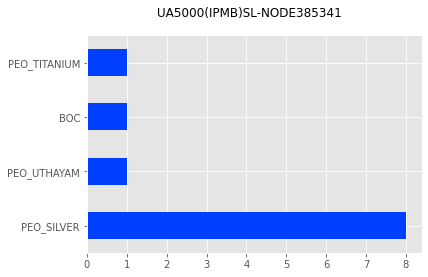

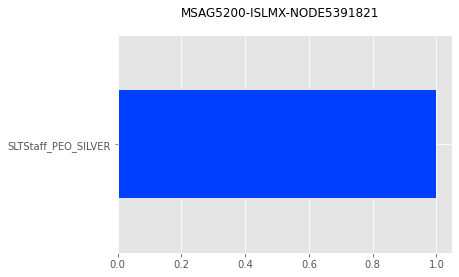

<Figure size 432x288 with 0 Axes>

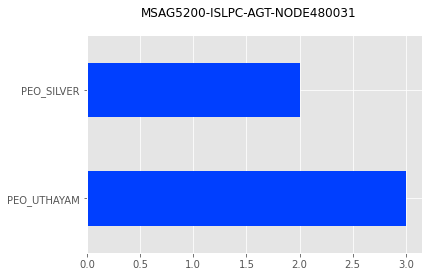

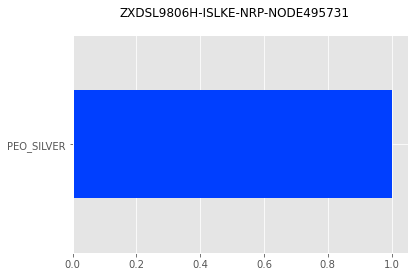

<Figure size 432x288 with 0 Axes>

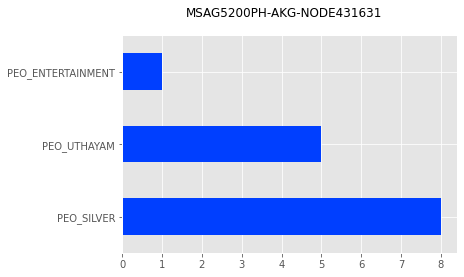

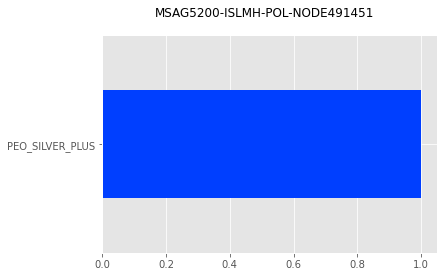

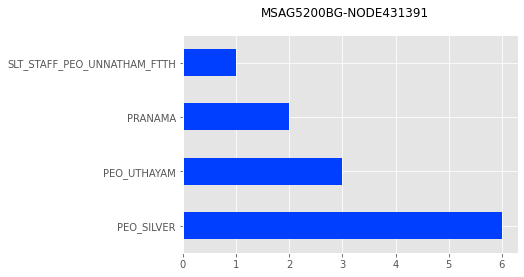

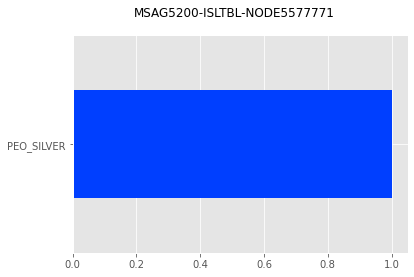

<Figure size 432x288 with 0 Axes>

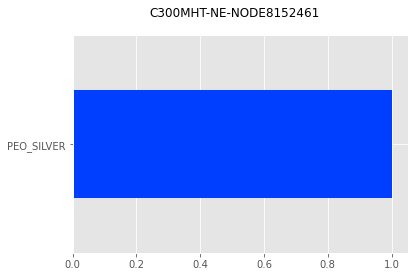

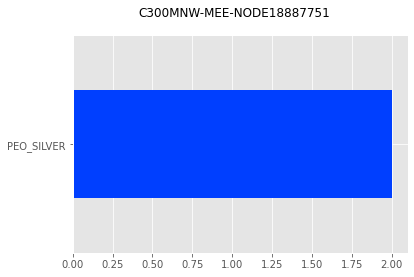

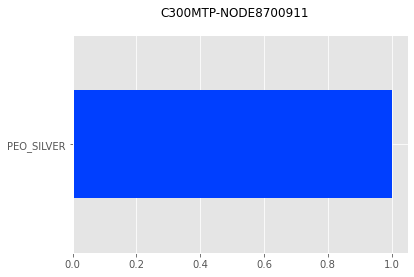

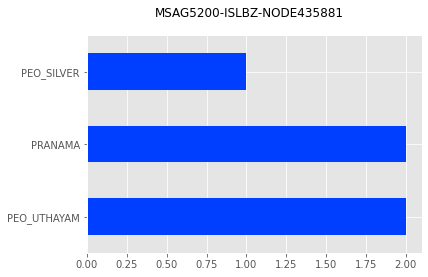

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

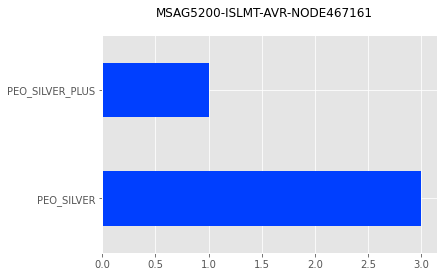

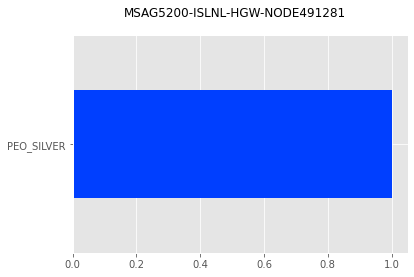

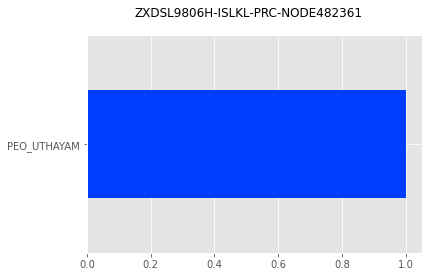

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [101]:
for loc in location_arr:
    user_loc_df = cluster_0[((cluster_0["Location_Identifier"]==loc) & (cluster_0["Peo_TV_Package"] != "NO_INFO"))]
    plt.figure(figsize=(6,4))
    plt.suptitle(loc)
    if (len(user_loc_df["Peo_TV_Package"].value_counts()) > 0):
        user_loc_df["Peo_TV_Package"].value_counts().plot(kind='barh', label=loc)

#### Popularity of PeoTV VAS Packages among Locations

<ipython-input-102-89e206bfdebb>:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<Figure size 432x288 with 0 Axes>

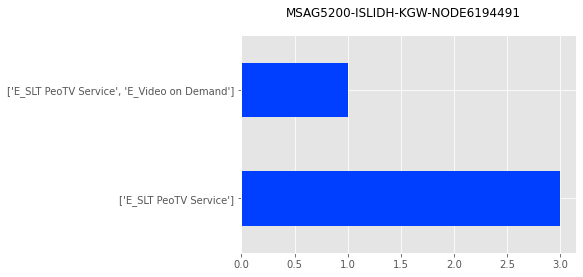

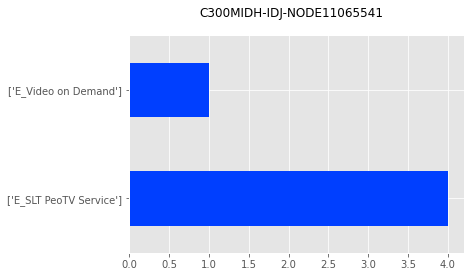

<Figure size 432x288 with 0 Axes>

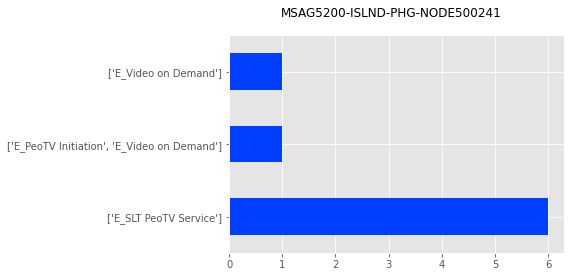

<Figure size 432x288 with 0 Axes>

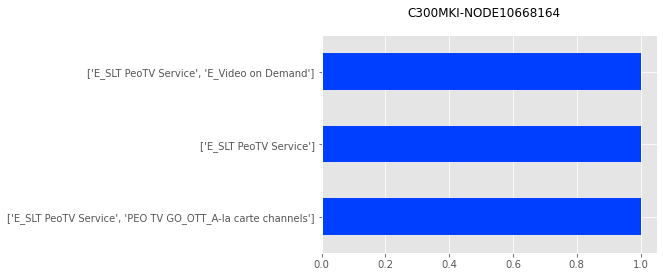

<Figure size 432x288 with 0 Axes>

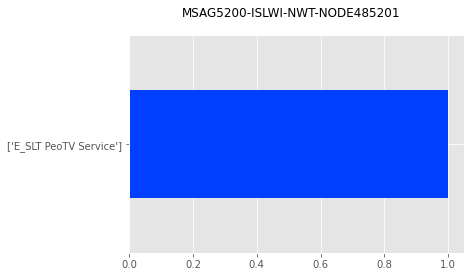

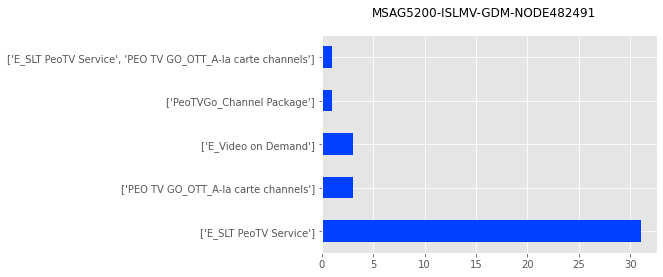

<Figure size 432x288 with 0 Axes>

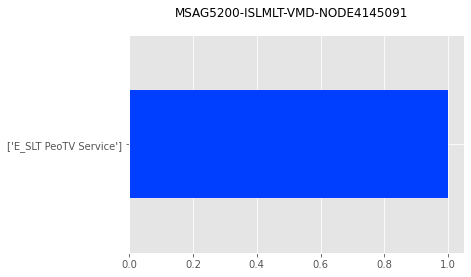

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

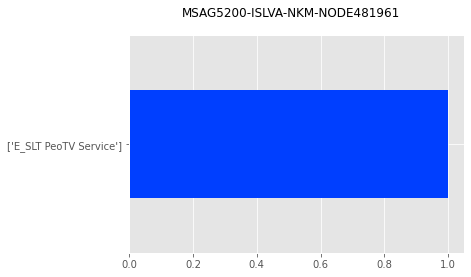

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

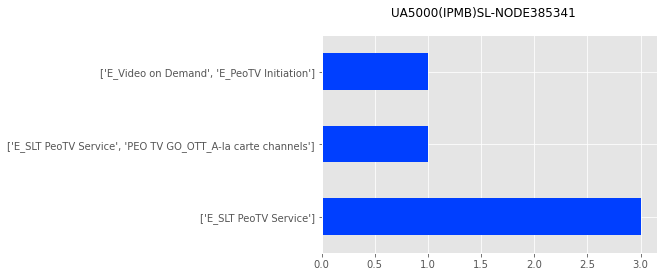

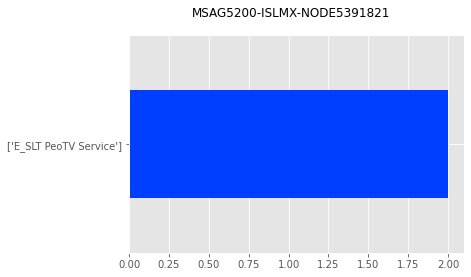

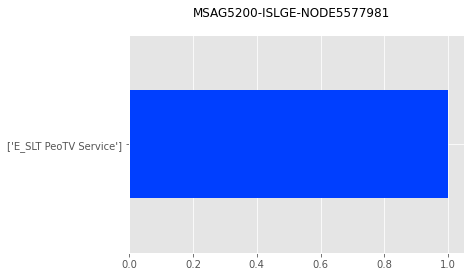

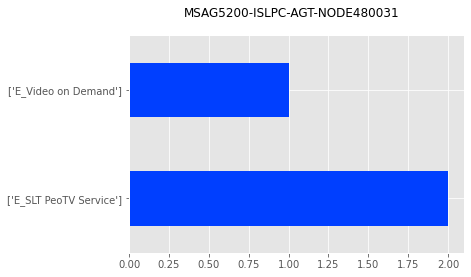

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

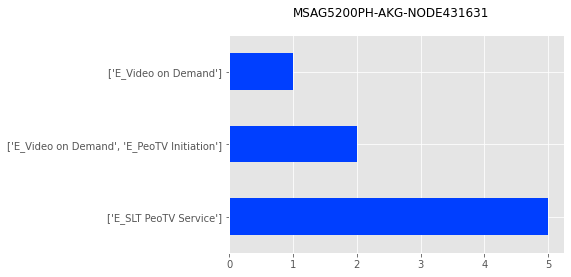

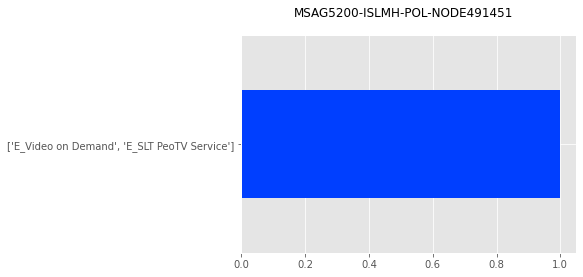

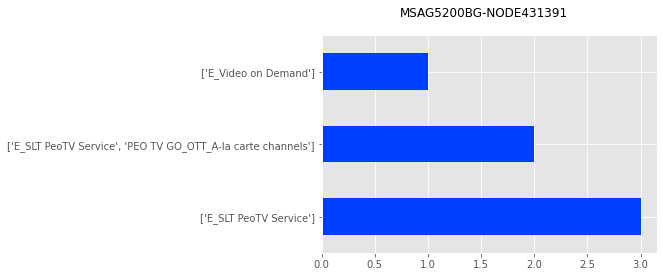

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

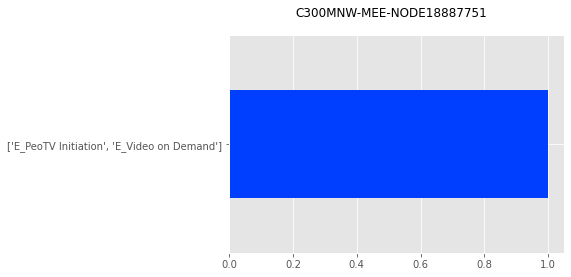

<Figure size 432x288 with 0 Axes>

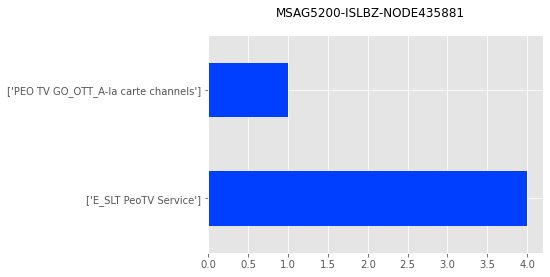

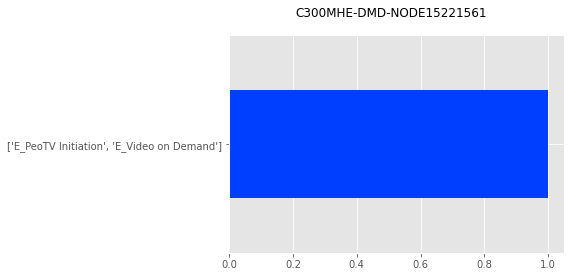

<Figure size 432x288 with 0 Axes>

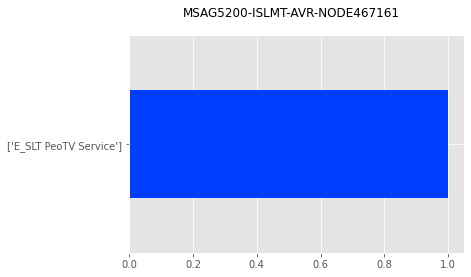

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [102]:
for loc in location_arr:
    user_loc_df = cluster_0[((cluster_0["Location_Identifier"]==loc) & (cluster_0["Peo_VAS_Package"] != "NO_INFO"))]
    plt.figure(figsize=(6,4))
    plt.suptitle(loc)
    if (len(user_loc_df["Peo_VAS_Package"].value_counts()) > 0):
        user_loc_df["Peo_VAS_Package"].value_counts().plot(kind='barh', label=loc)

#### Popularity of BB VAS Packages among Locations

<ipython-input-103-d0c3ce37ea15>:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<Figure size 432x288 with 0 Axes>

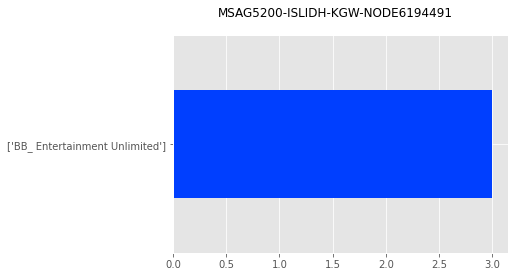

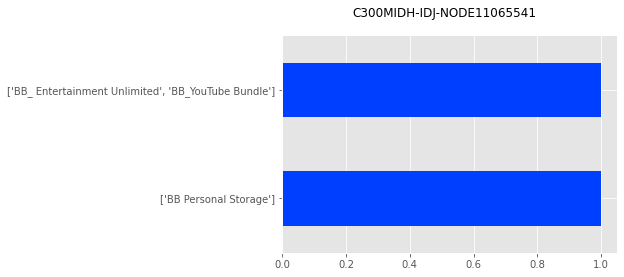

<Figure size 432x288 with 0 Axes>

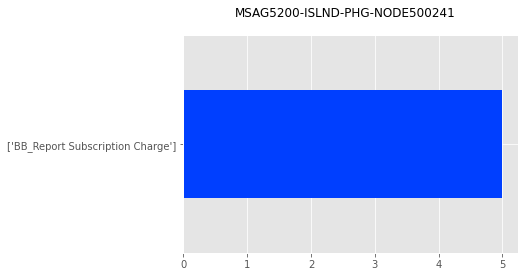

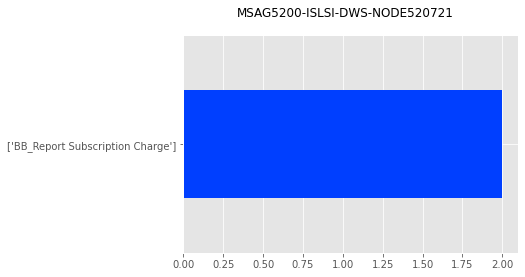

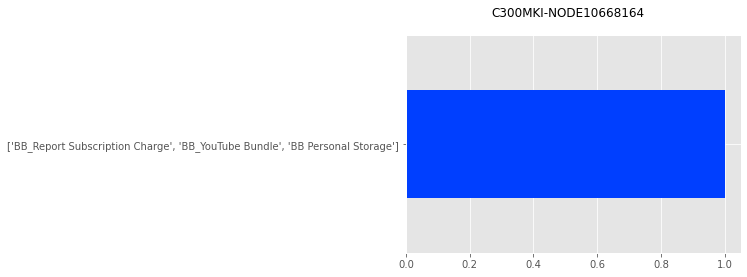

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

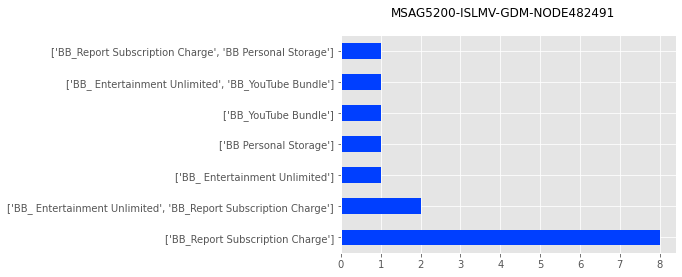

<Figure size 432x288 with 0 Axes>

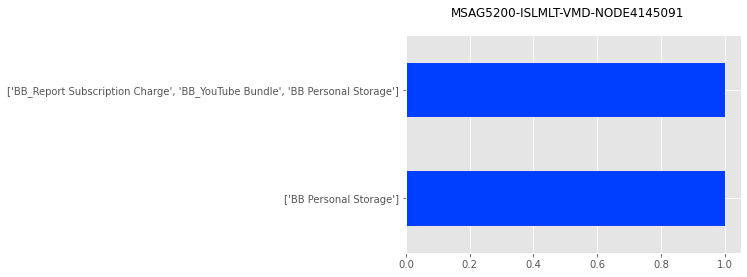

<Figure size 432x288 with 0 Axes>

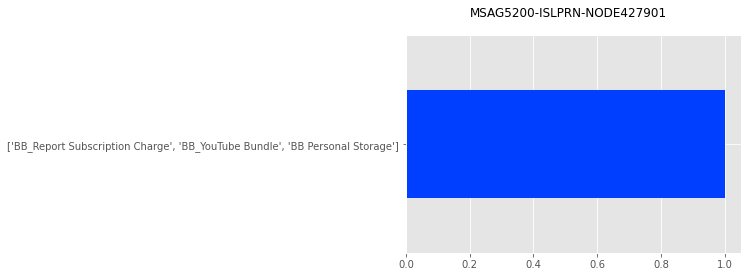

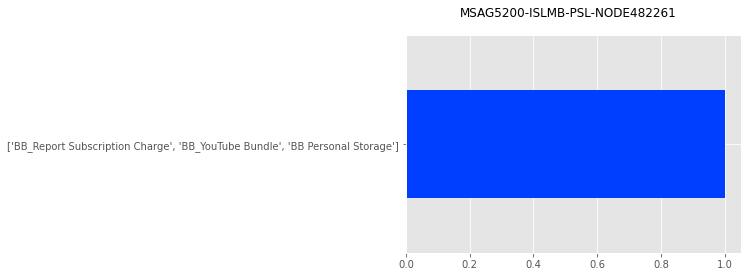

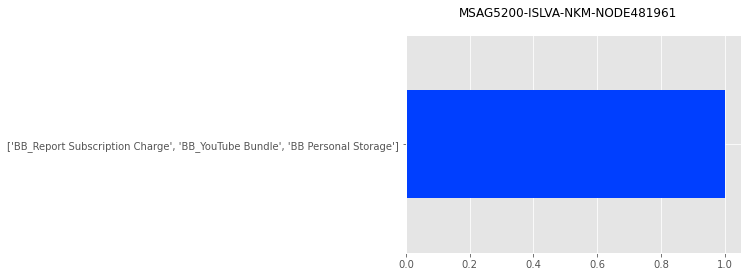

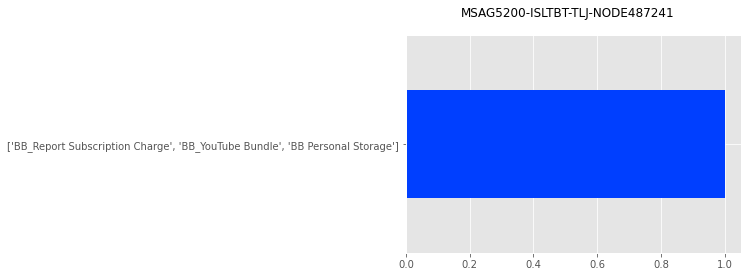

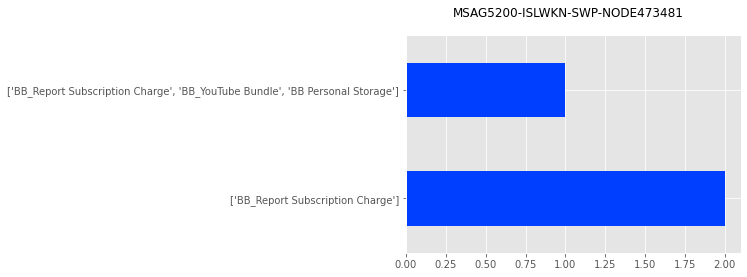

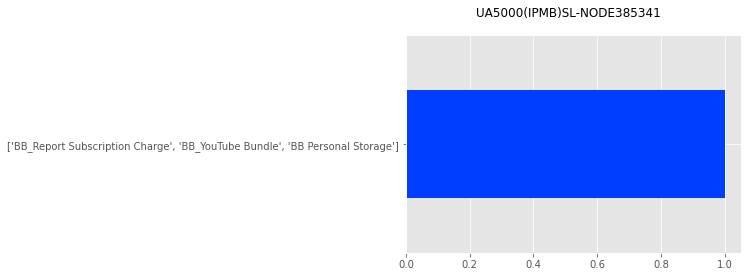

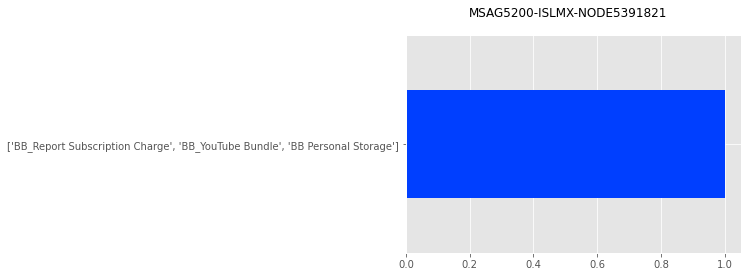

<Figure size 432x288 with 0 Axes>

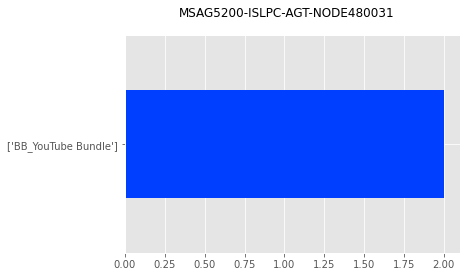

<Figure size 432x288 with 0 Axes>

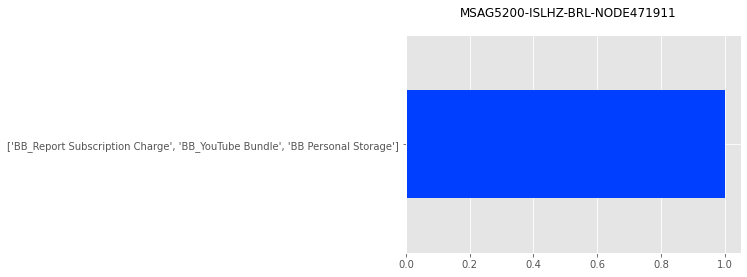

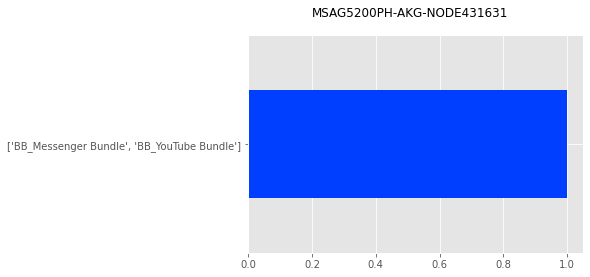

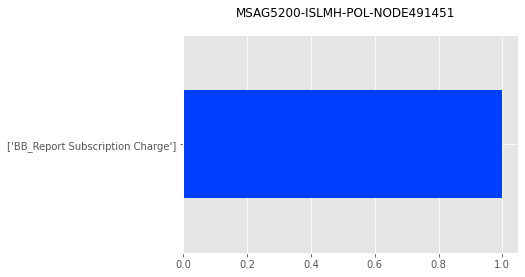

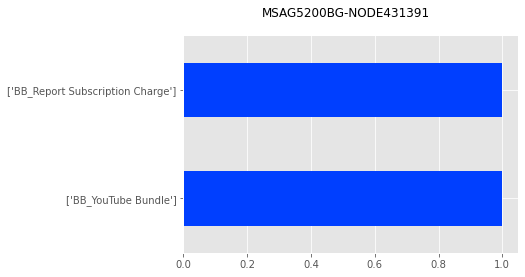

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

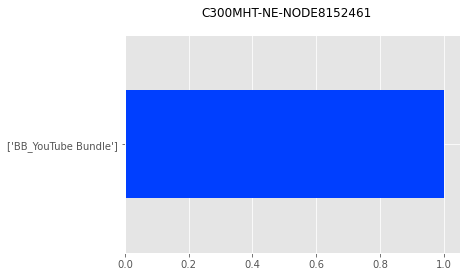

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

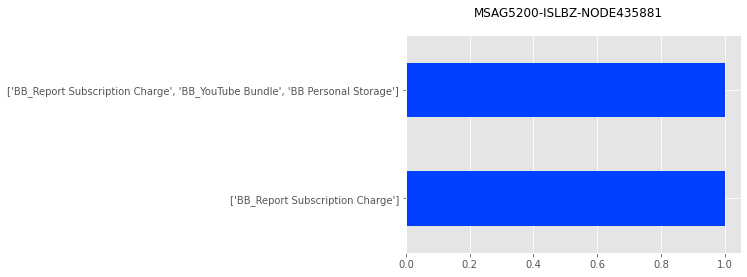

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

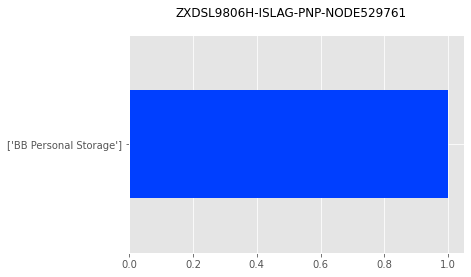

<Figure size 432x288 with 0 Axes>

In [103]:
for loc in location_arr:
    user_loc_df = cluster_0[((cluster_0["Location_Identifier"]==loc) & (cluster_0["BB_VAS_Package"] != "NO_INFO"))]
    plt.figure(figsize=(6,4))
    plt.suptitle(loc)
    if (len(user_loc_df["BB_VAS_Package"].value_counts()) > 0):
        user_loc_df["BB_VAS_Package"].value_counts().plot(kind='barh', label=loc)

## Gender Analysis

<AxesSubplot:ylabel='GENDER'>

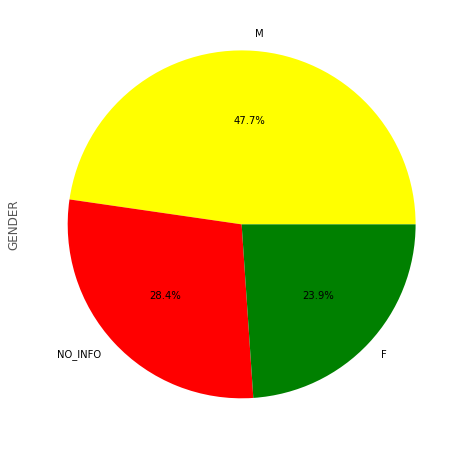

In [104]:
cluster_0["GENDER"].value_counts().plot(kind='pie', figsize=(8,8), autopct='%1.1f%%',colors = ['yellow','red','green'])

#### Subscription Types by Gender

<AxesSubplot:xlabel='Sub_Type'>

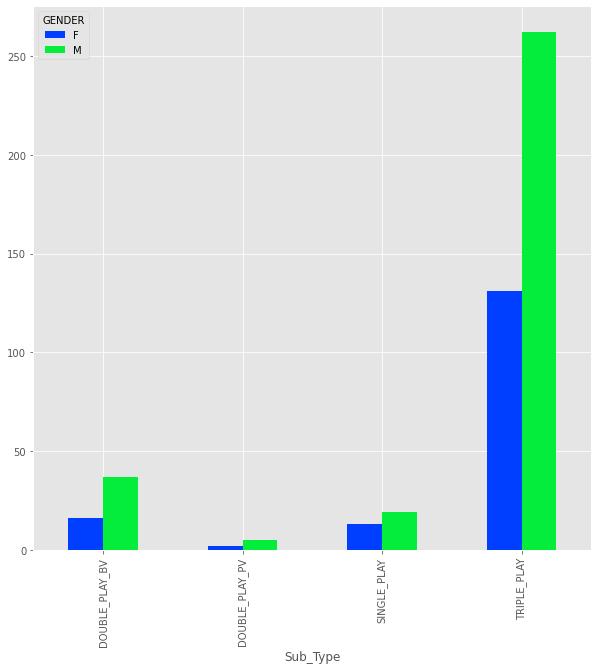

In [166]:
cluster_0[(cluster_0["GENDER"] != "NO_INFO")].groupby(["Sub_Type", "GENDER"]).size().unstack().plot.bar(figsize=(10,10))

### Service Usage on Gender

#### PeoTV Usage by Gender

array([<AxesSubplot:ylabel='PEO_TV_Scaled'>], dtype=object)

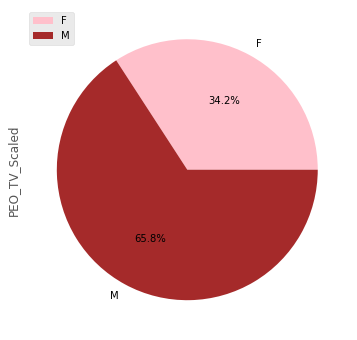

In [127]:
cluster_0[(cluster_0["GENDER"] != "NO_INFO")][["PEO_TV_Scaled", "GENDER"]].groupby("GENDER").sum().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%',colors=("pink","brown"), subplots=True)

#### BB Usage by Gender

array([<AxesSubplot:ylabel='BB_Scaled'>], dtype=object)

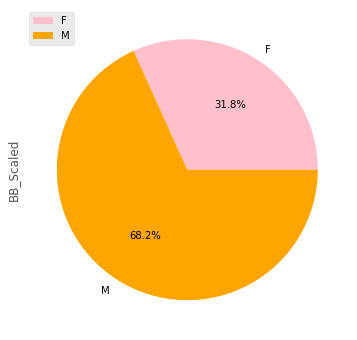

In [123]:
cluster_0[(cluster_0["GENDER"] != "NO_INFO")][["BB_Scaled", "GENDER"]].groupby("GENDER").sum().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%',colors=("pink","orange"), subplots=True)

#### IDD Usage by Gender

array([<AxesSubplot:ylabel='IDD_INCOMING_Scaled'>], dtype=object)

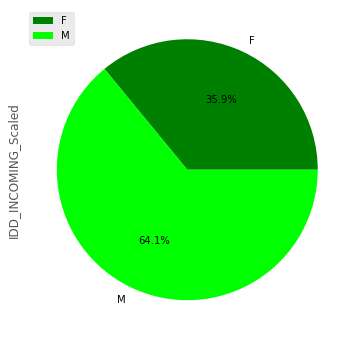

In [125]:
cluster_0[(cluster_0["GENDER"] != "NO_INFO")][["IDD_INCOMING_Scaled", "GENDER"]].groupby("GENDER").sum().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%',colors=("green","lime"), subplots=True)

#### Popular PeoTV Package

<AxesSubplot:xlabel='Peo_TV_Package'>

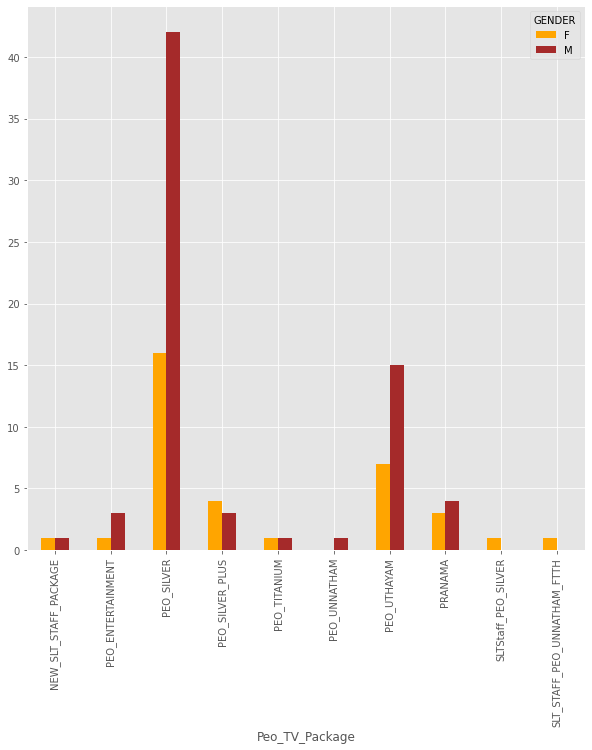

In [169]:
 cluster_0[((cluster_0["GENDER"] != "NO_INFO") &(cluster_0["Peo_TV_Package"] != "NO_INFO"))].groupby(["Peo_TV_Package", "GENDER"]).size().unstack().plot.bar(figsize=(10,10),color=("orange", "brown"))

## AGE Analysis

In [143]:
cluster_0["AGE"].describe()

count    485.000000
mean      61.804124
std       15.565669
min       26.000000
25%       50.000000
50%       63.000000
75%       74.000000
max      110.000000
Name: AGE, dtype: float64

In [144]:
bins = [0, 30,55,65,85,110]
cluster_0['AGE_Groups'] = pd.cut(cluster_0['AGE'], bins)

<ipython-input-144-985f5b1e5f2d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:ylabel='AGE_Groups'>

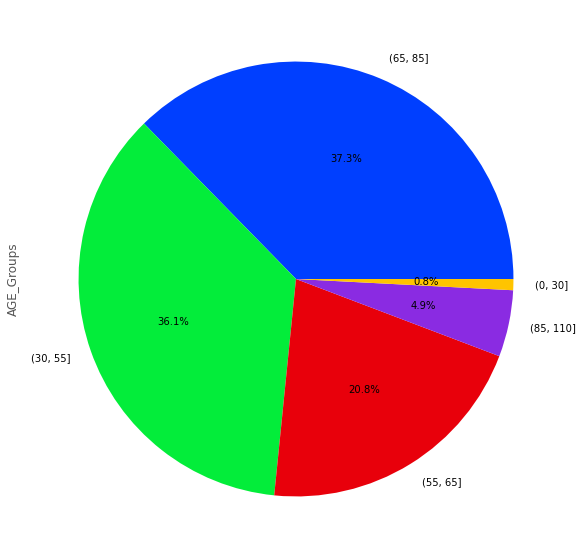

In [151]:
cluster_0["AGE_Groups"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

#### Subscription Types by Age Groups

<AxesSubplot:xlabel='Sub_Type'>

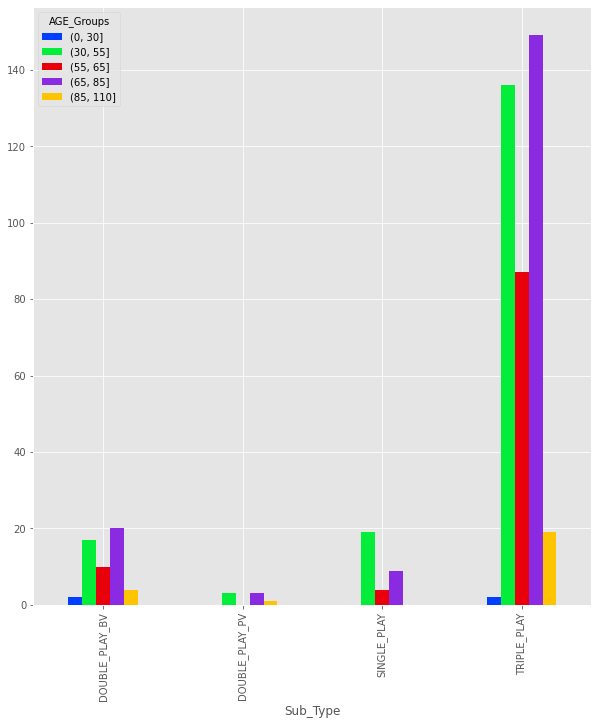

In [171]:
cluster_0.groupby(["Sub_Type", "AGE_Groups"]).size().unstack().plot.bar(figsize=(10,11))

### Service Usage by Age Groups

#### PeoTV Usage by Gender

array([<AxesSubplot:ylabel='PEO_TV_Scaled'>], dtype=object)

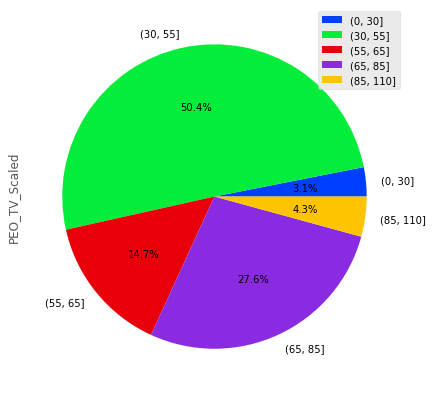

In [173]:
cluster_0[["PEO_TV_Scaled", "AGE_Groups"]].groupby("AGE_Groups").sum().plot(kind='pie', figsize=(7,7), autopct='%1.1f%%', subplots=True)

#### BB Usage by Gender

array([<AxesSubplot:ylabel='BB_Scaled'>], dtype=object)

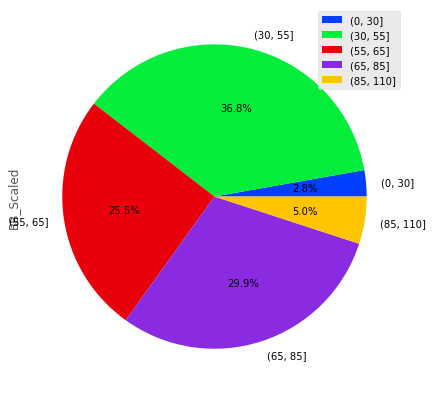

In [175]:
cluster_0[["BB_Scaled", "AGE_Groups"]].groupby("AGE_Groups").sum().plot(kind='pie', figsize=(7,7), autopct='%1.1f%%',subplots=True)

#### IDD Usage by Gender

array([<AxesSubplot:ylabel='IDD_INCOMING_Scaled'>], dtype=object)

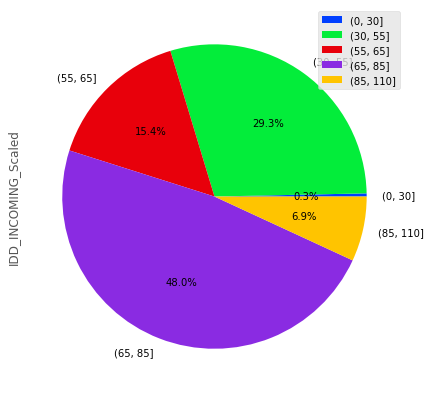

In [177]:
cluster_0[["IDD_INCOMING_Scaled", "AGE_Groups"]].groupby("AGE_Groups").sum().plot(kind='pie', figsize=(7,7), autopct='%1.1f%%', subplots=True)

#### Popular PeoTV Package

<AxesSubplot:xlabel='Peo_TV_Package'>

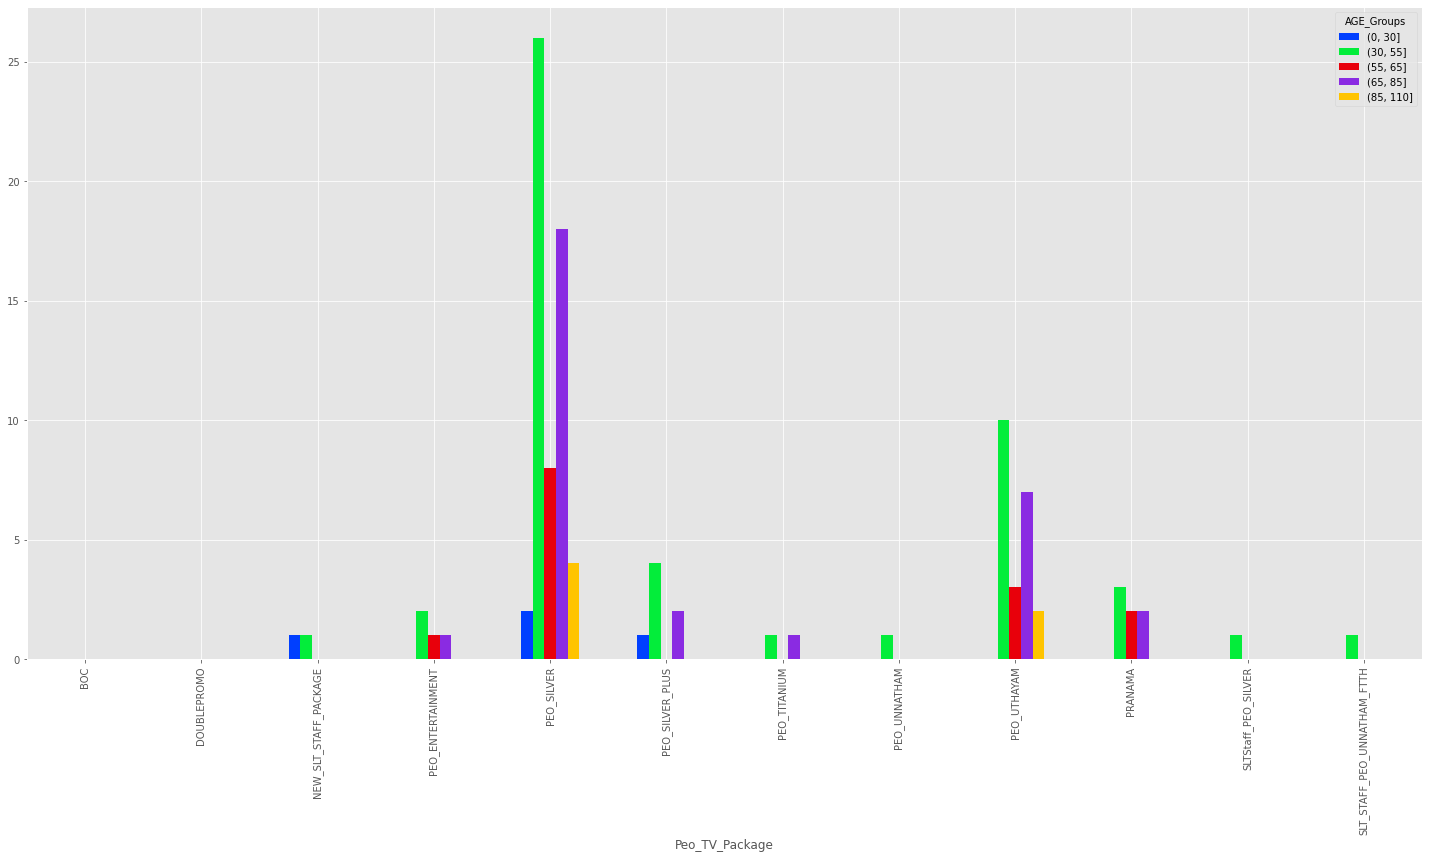

In [180]:
cluster_0[(cluster_0["Peo_TV_Package"] != "NO_INFO")].groupby(["Peo_TV_Package", "AGE_Groups"]).size().unstack().plot.bar(figsize=(25,12))

## ToDo
- Age and Gender wise VAS analysis

### Socio-economic factors

In [115]:
cluster_0["Having_Insurance"].value_counts()

NO_INFO    591
YES         86
Name: Having_Insurance, dtype: int64

<AxesSubplot:xlabel='Having_Insurance'>

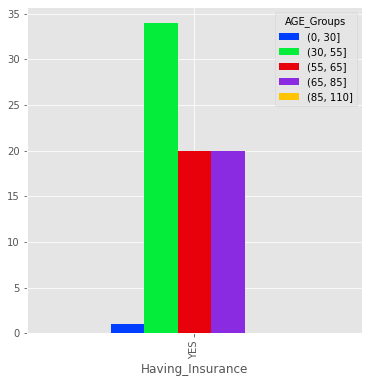

In [232]:
cluster_0[(cluster_0["Having_Insurance"] != "NO_INFO")].groupby(["Having_Insurance", "AGE_Groups"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Insurance'>

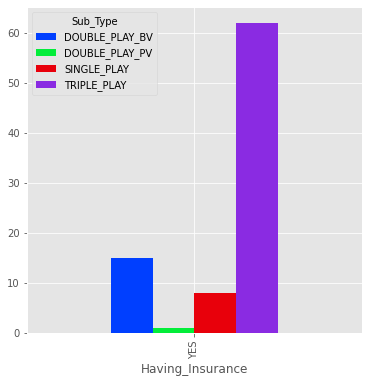

In [231]:
cluster_0[(cluster_0["Having_Insurance"] != "NO_INFO")].groupby(["Having_Insurance", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Insurance'>

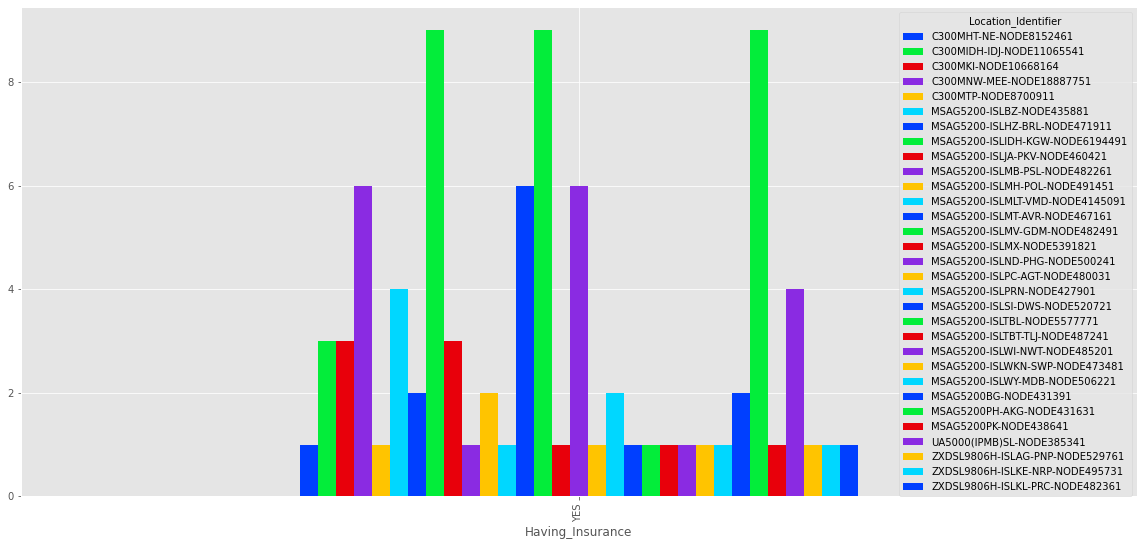

In [235]:
cluster_0[(cluster_0["Having_Insurance"] != "NO_INFO")].groupby(["Having_Insurance", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

#### Having Senior citizens

In [116]:
cluster_0["Having_Senior_Citizen"].value_counts()

NO_INFO    577
YES        100
Name: Having_Senior_Citizen, dtype: int64

<AxesSubplot:xlabel='Having_Senior_Citizen'>

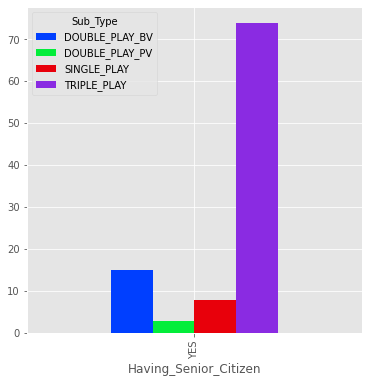

In [237]:
cluster_0[(cluster_0["Having_Senior_Citizen"] != "NO_INFO")].groupby(["Having_Senior_Citizen", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Senior_Citizen'>

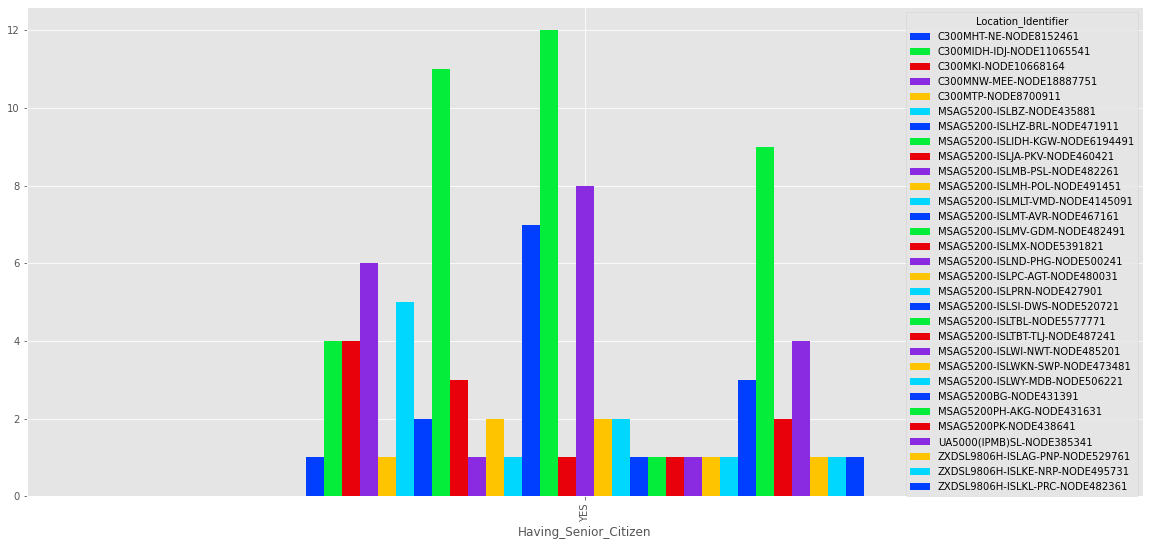

In [238]:
cluster_0[(cluster_0["Having_Senior_Citizen"] != "NO_INFO")].groupby(["Having_Senior_Citizen", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

#### Having a family member abroad

In [117]:
cluster_0["Having_Family_Member_Abroad"].value_counts()

YES        665
NO_INFO     12
Name: Having_Family_Member_Abroad, dtype: int64

<AxesSubplot:xlabel='Having_Family_Member_Abroad'>

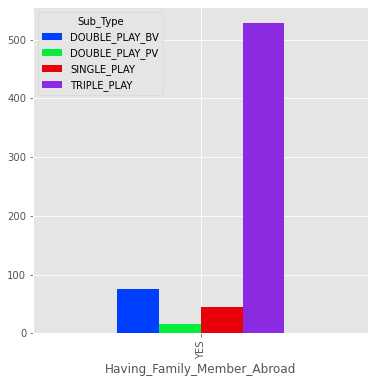

In [239]:
cluster_0[(cluster_0["Having_Family_Member_Abroad"] != "NO_INFO")].groupby(["Having_Family_Member_Abroad", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Family_Member_Abroad'>

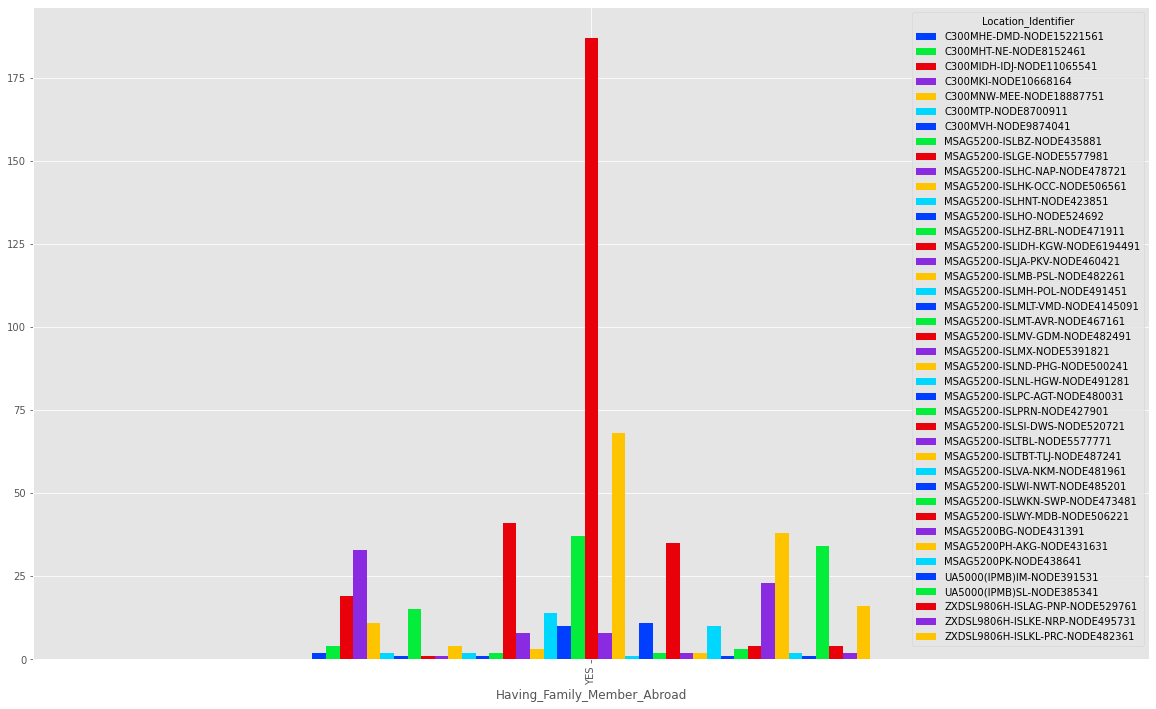

In [241]:
cluster_0[(cluster_0["Having_Family_Member_Abroad"] != "NO_INFO")].groupby(["Having_Family_Member_Abroad", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,12))

#### Having a working professional

In [118]:
cluster_0["Having_Working_Professionals"].value_counts()

NO_INFO    607
YES         70
Name: Having_Working_Professionals, dtype: int64

<AxesSubplot:xlabel='Having_Working_Professionals'>

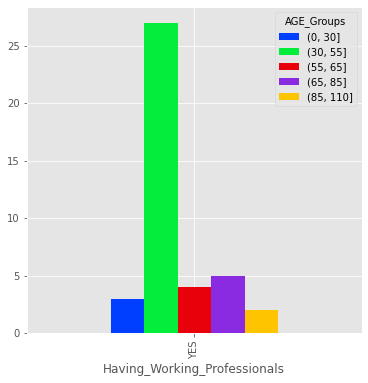

In [242]:
cluster_0[(cluster_0["Having_Working_Professionals"] != "NO_INFO")].groupby(["Having_Working_Professionals", "AGE_Groups"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Working_Professionals'>

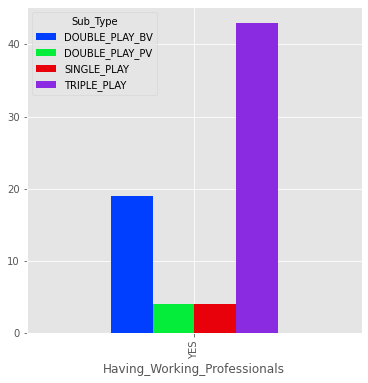

In [243]:
cluster_0[(cluster_0["Having_Working_Professionals"] != "NO_INFO")].groupby(["Having_Working_Professionals", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Working_Professionals'>

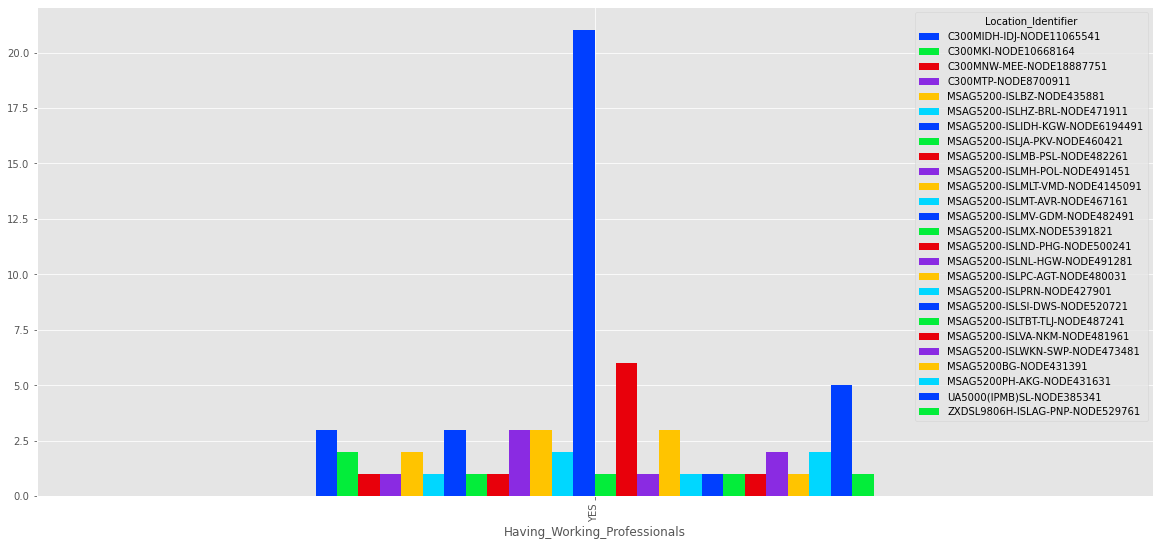

In [244]:
cluster_0[(cluster_0["Having_Working_Professionals"] != "NO_INFO")].groupby(["Having_Working_Professionals", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

#### Having Teenagers Students

In [119]:
cluster_0["Having_Teenagers_Students"].value_counts()

NO_INFO    618
YES         59
Name: Having_Teenagers_Students, dtype: int64

<AxesSubplot:xlabel='Having_Teenagers_Students'>

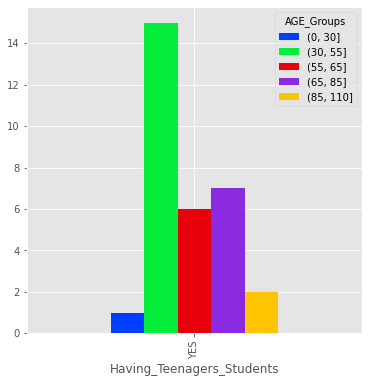

In [245]:
cluster_0[(cluster_0["Having_Teenagers_Students"] != "NO_INFO")].groupby(["Having_Teenagers_Students", "AGE_Groups"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Teenagers_Students'>

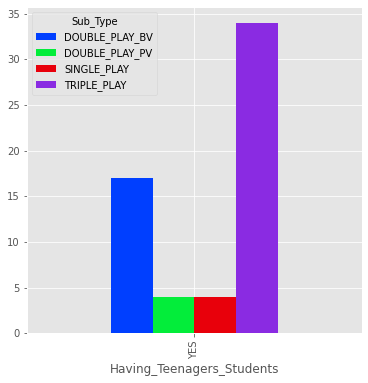

In [246]:
cluster_0[(cluster_0["Having_Teenagers_Students"] != "NO_INFO")].groupby(["Having_Teenagers_Students", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Teenagers_Students'>

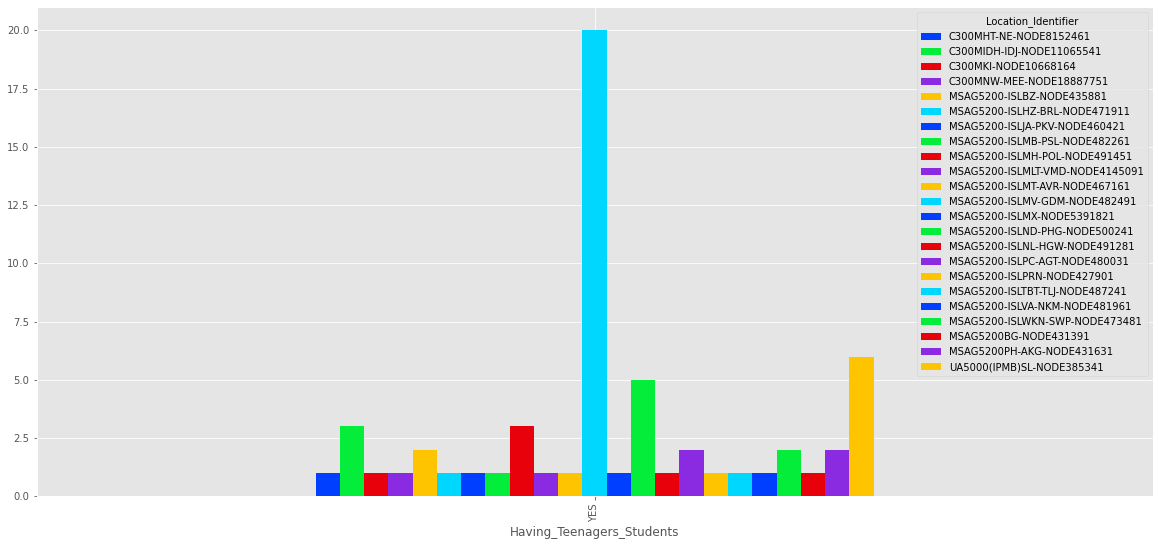

In [247]:
cluster_0[(cluster_0["Having_Teenagers_Students"] != "NO_INFO")].groupby(["Having_Teenagers_Students", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

#### Having a Tamil customer

In [120]:
cluster_0["Tamil_Customer"].value_counts()

NO_INFO    651
YES         26
Name: Tamil_Customer, dtype: int64

<AxesSubplot:xlabel='Tamil_Customer'>

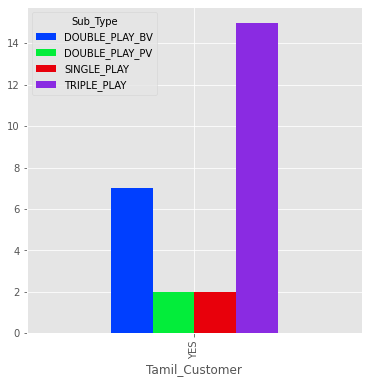

In [248]:
cluster_0[(cluster_0["Tamil_Customer"] != "NO_INFO")].groupby(["Tamil_Customer", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Tamil_Customer'>

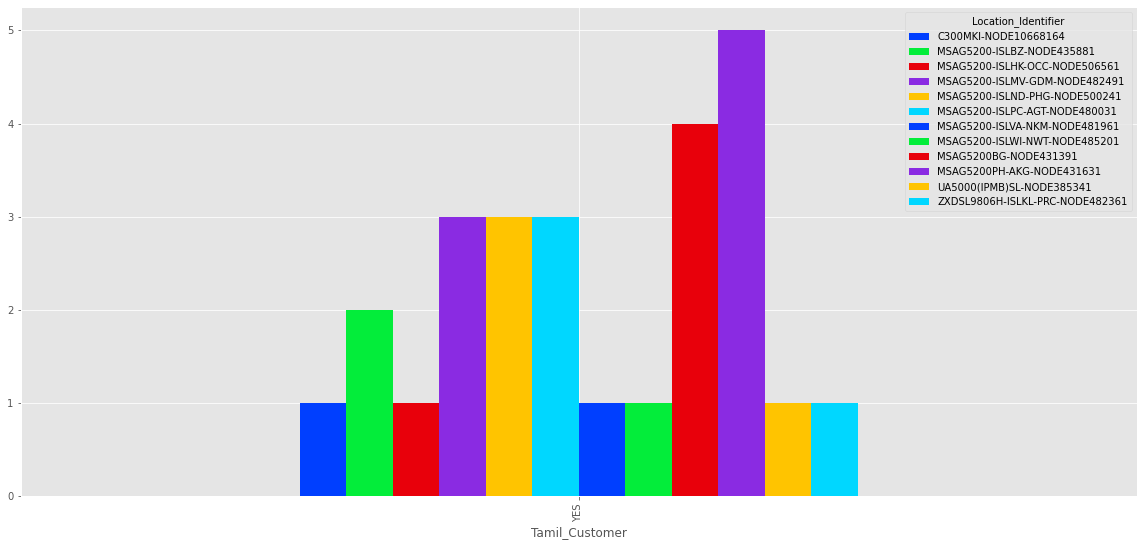

In [249]:
cluster_0[(cluster_0["Tamil_Customer"] != "NO_INFO")].groupby(["Tamil_Customer", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

#### Having Kids at Home

In [121]:
cluster_0["Having_Kids_at_Home"].value_counts()

NO_INFO    643
YES         34
Name: Having_Kids_at_Home, dtype: int64

<AxesSubplot:xlabel='Having_Kids_at_Home'>

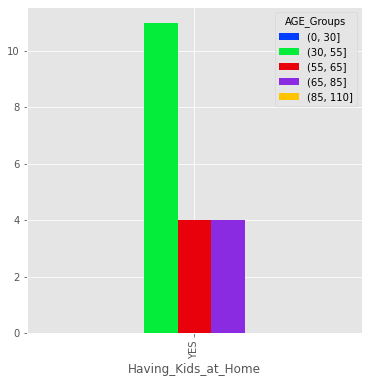

In [250]:
cluster_0[(cluster_0["Having_Kids_at_Home"] != "NO_INFO")].groupby(["Having_Kids_at_Home", "AGE_Groups"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Kids_at_Home'>

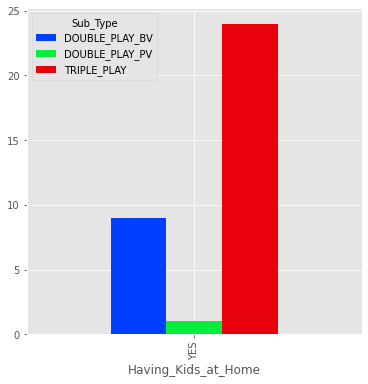

In [251]:
cluster_0[(cluster_0["Having_Kids_at_Home"] != "NO_INFO")].groupby(["Having_Kids_at_Home", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Kids_at_Home'>

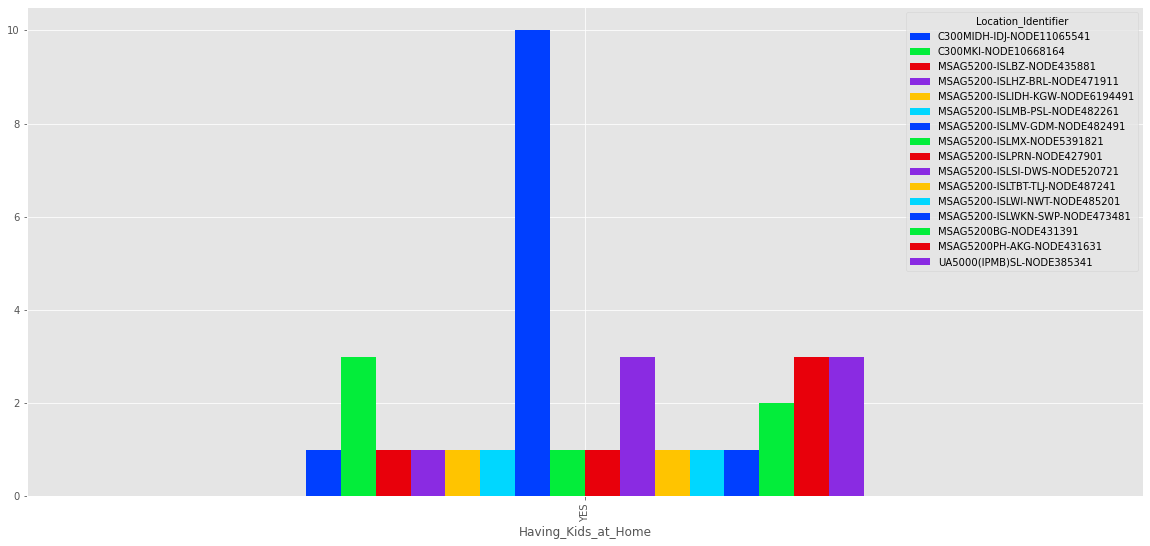

In [252]:
cluster_0[(cluster_0["Having_Kids_at_Home"] != "NO_INFO")].groupby(["Having_Kids_at_Home", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

### Identifying factors for recommending Packages for Cluster 0

#### Feasible locations to offer PeoTV

In [259]:
cluster_0_peo_loc = cluster_0[(cluster_0["Sub_Type"] == "TRIPLE_PLAY") | (cluster_0["Sub_Type"] == "DOUBLE_PLAY_PV")].groupby('Location_Identifier').count()["event_source.hash"]

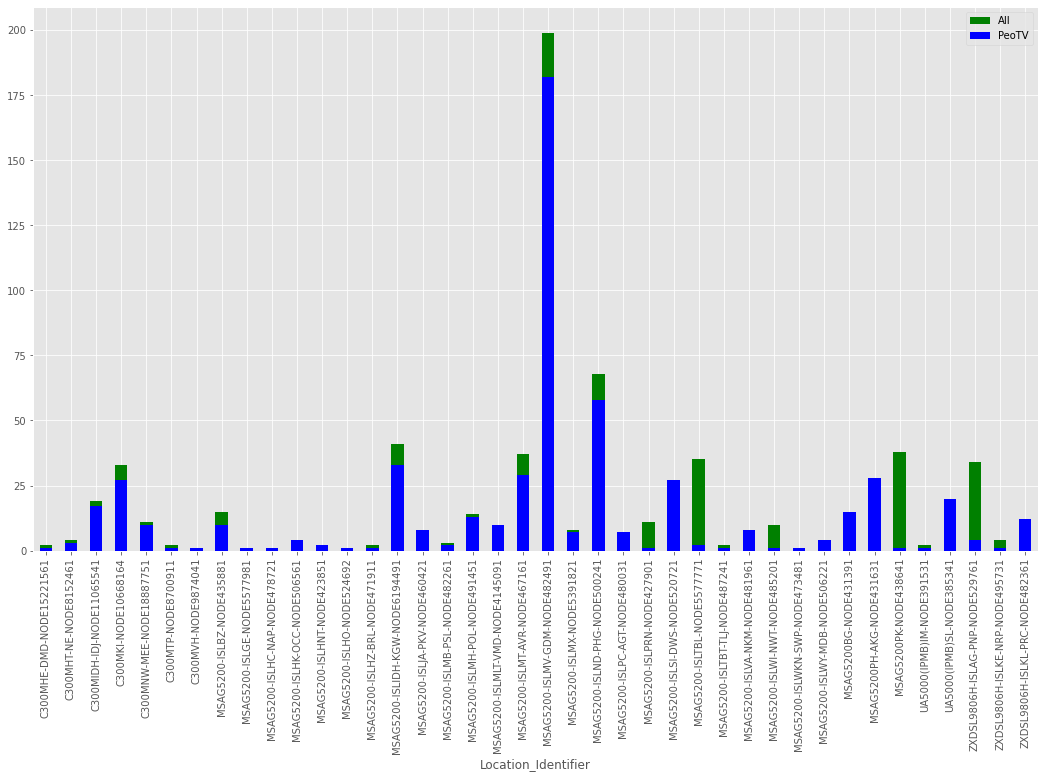

In [263]:
ax = cluster_0_loc.plot(stacked=True, kind="bar", figsize=(18,10), color="green")
cluster_0_peo_loc.plot(stacked=True, kind="bar",ax=ax, figsize=(18,10), color="blue")
plt.legend(["All","PeoTV"])

In [261]:
loc_precentage=(cluster_0_peo_loc/cluster_0_loc)*100

In [262]:
loc_precentage[(loc_precentage > 60)]

Location_Identifier
C300MHT-NE-NODE8152461              75.000000
C300MIDH-IDJ-NODE11065541           89.473684
C300MKI-NODE10668164                81.818182
C300MNW-MEE-NODE18887751            90.909091
C300MVH-NODE9874041                100.000000
MSAG5200-ISLBZ-NODE435881           66.666667
MSAG5200-ISLGE-NODE5577981         100.000000
MSAG5200-ISLHC-NAP-NODE478721      100.000000
MSAG5200-ISLHK-OCC-NODE506561      100.000000
MSAG5200-ISLHNT-NODE423851         100.000000
MSAG5200-ISLHO-NODE524692          100.000000
MSAG5200-ISLIDH-KGW-NODE6194491     80.487805
MSAG5200-ISLJA-PKV-NODE460421      100.000000
MSAG5200-ISLMB-PSL-NODE482261       66.666667
MSAG5200-ISLMH-POL-NODE491451       92.857143
MSAG5200-ISLMLT-VMD-NODE4145091    100.000000
MSAG5200-ISLMT-AVR-NODE467161       78.378378
MSAG5200-ISLMV-GDM-NODE482491       91.457286
MSAG5200-ISLMX-NODE5391821          87.500000
MSAG5200-ISLND-PHG-NODE500241       85.294118
MSAG5200-ISLPC-AGT-NODE480031       63.636364
MSAG5200-ISLSI

#### Feasible locations to offer Broadband

In [264]:
cluster_0_bb_loc = cluster_0[(cluster_0["Sub_Type"] == "TRIPLE_PLAY") | (cluster_0["Sub_Type"] == "DOUBLE_PLAY_BV")].groupby('Location_Identifier').count()["event_source.hash"]

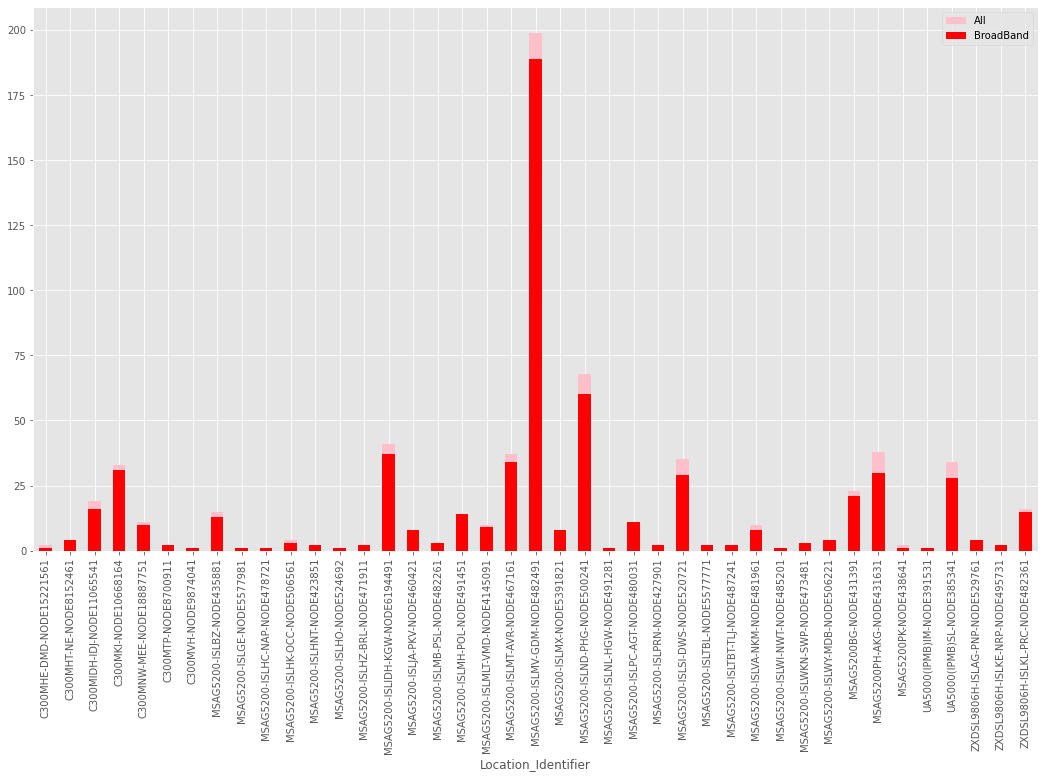

In [265]:
ax = cluster_0_loc.plot(stacked=True, kind="bar", figsize=(18,10), color="pink")
cluster_0_bb_loc.plot(stacked=True, kind="bar",ax=ax, figsize=(18,10), color="red")
plt.legend(["All","BroadBand"])

In [266]:
loc_precentage=(cluster_0_bb_loc/cluster_0_loc)*100

In [267]:
loc_precentage[(loc_precentage > 60)]

Location_Identifier
C300MHT-NE-NODE8152461             100.000000
C300MIDH-IDJ-NODE11065541           84.210526
C300MKI-NODE10668164                93.939394
C300MNW-MEE-NODE18887751            90.909091
C300MTP-NODE8700911                100.000000
C300MVH-NODE9874041                100.000000
MSAG5200-ISLBZ-NODE435881           86.666667
MSAG5200-ISLGE-NODE5577981         100.000000
MSAG5200-ISLHC-NAP-NODE478721      100.000000
MSAG5200-ISLHK-OCC-NODE506561       75.000000
MSAG5200-ISLHNT-NODE423851         100.000000
MSAG5200-ISLHO-NODE524692          100.000000
MSAG5200-ISLHZ-BRL-NODE471911      100.000000
MSAG5200-ISLIDH-KGW-NODE6194491     90.243902
MSAG5200-ISLJA-PKV-NODE460421      100.000000
MSAG5200-ISLMB-PSL-NODE482261      100.000000
MSAG5200-ISLMH-POL-NODE491451      100.000000
MSAG5200-ISLMLT-VMD-NODE4145091     90.000000
MSAG5200-ISLMT-AVR-NODE467161       91.891892
MSAG5200-ISLMV-GDM-NODE482491       94.974874
MSAG5200-ISLMX-NODE5391821         100.000000
MSAG5200-ISLND

## Cluster 0- Findings